In [1]:
from redfin import Redfin
import pandas as pd
import numpy as np
import math
import statistics as stats
from scipy import stats as skimp
import re
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from pandas.api.types import is_numeric_dtype
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import requests
import urllib.parse
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
import tensorflow as tf
import math
import statistics as stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

# Read the Data

In [2]:
data=pd.read_csv('/Users/kb/Ironhack/Labs/Home-Buying/finalData.csv')
data.head()

index  property_id2  listing_id2  \
0    0.0    26719777.0  143915652.0   
1    1.0    25986380.0  140570126.0   
2    2.0    55902012.0  142544601.0   
3    3.0    25936755.0  144176570.0   
4    4.0   176071231.0  137050199.0   

                                    address4  beds2  baths2   latitude  \
0              13040 SW Caddy Pl, Tigard, OR    2.0     2.5  45.425580   
1            4103 SE Olsen St, Milwaukie, OR    4.0     2.5  45.454978   
2              275 15th Ave SE, Lonsdale, MN    4.0     3.0  44.474230   
3  13531 Clairmont Way #175, Oregon City, OR    3.0     2.0  45.330291   
4   21727 S Cahill Creek Ln, Oregon City, OR    NaN     NaN  45.291962   

    longitude  cumulativeDaysOnMarket  propertyType  listingType  \
0 -122.811359                    10.0          13.0          1.0   
1 -122.621015                     0.0           6.0          1.0   
2  -93.410987                     NaN           6.0          1.0   
3 -122.590144                     0.0          10.0          1.0   
4 -122.604443                   139.0           8.0          1.0   

   searchStatus isMappable  numFullBaths  predictedValue  squareFeet  \
0         128.0       True           2.0       419640.19      1934.0   
1           1.0       True           2.0       728341.79      2289.0   
2           1.0       True           2.0       458103.86      2318.0   
3           1.0       True           2.0             NaN      1200.0   
4         128.0       True           NaN       360782.39         NaN   

   viewCount  totalFavoritesCount  totalTourCount  totalAmenities  beds  \
0     1846.0                 84.0             2.0            31.0   2.0   
1     5328.0                114.0             1.0            24.0   2.0   
2       37.0                  0.0             0.0            12.0   NaN   
3      556.0                 30.0             0.0             7.0   NaN   
4     1668.0                 52.0             0.0             0.0   NaN   

   baths           propertyTypeName  numStories  yearBuilt  yearRenovated  \
0    2.0                  Townhouse         NaN     2000.0            NaN   
1    1.0  Single Family Residential         1.0     1935.0            NaN   
2    NaN                      Other         NaN        NaN            NaN   
3    1.0                      Other         NaN     1987.0            NaN   
4    NaN                Vacant Land         NaN        NaN            NaN   

   totalSqFt  lotSqFt  taxesDue eventDescription eventDateString  \
0     1450.0   1307.0   3724.90          Pending             NaN   
1      951.0  10699.0   2886.47           Listed             NaN   
2        NaN  11113.0    558.00    Price Changed             NaN   
3        NaN      NaN    259.43           Listed             NaN   
4        NaN      NaN       NaN          Pending             NaN   

   daysOnMarket     price         countyName  publicStudentTeacherRatio  \
0           NaN  385000.0  Washington County                  17.333333   
1           NaN  735000.0   Clackamas County                  22.000000   
2           NaN  461900.0        Rice County                  17.666667   
3           NaN   79900.0   Clackamas County                  21.333333   
4           NaN  380000.0   Clackamas County                  19.166667   

   publicSchoolRate  publicStudentCnt  privateRate  privateStudentCnt  \
0          9.083333       1080.666667     9.970000         520.388889   
1          8.283333        682.333333     8.911667         292.233333   
2         57.916667        956.666667    17.577778         134.666667   
3          5.683333       1124.000000    10.113889         212.138889   
4         31.333333        824.333333    24.650000         443.916667   

                                         amenityList BASEMENT_SQUARE_FEET  \
0  {'BASEMENT_SQUARE_FEET': '140', 'BASEMENT_TYPE...                  140   
1  {'FULL_BATHS': '1', 'HEATING_TYPE_CODE': 'Base...                  NaN   
2  {'ASSESSED_YEAR': '2020', 'TAX_DIS

# Explore the Data

In [3]:
data.shape

(5127, 139)

In [4]:
#standardize columns
data.columns= data.columns.str.lower()

In [5]:
#set datatypes
data['ismappable']=pd.to_numeric(data['ismappable'],errors='coerce')
data['squarefeet']=pd.to_numeric(data['squarefeet'],errors='coerce')
data['totalsqft']=pd.to_numeric(data['totalsqft'],errors='coerce')
data['building_square_feet']=pd.to_numeric(data['building_square_feet'],errors='coerce')
data['living_square_feet']=pd.to_numeric(data['living_square_feet'],errors='coerce')
data['ground_floor_square_feet']=pd.to_numeric(data['ground_floor_square_feet'],errors='coerce')
data['garage_parking_square_feet']=pd.to_numeric(data['garage_parking_square_feet'],errors='coerce')
data['land_square_footage']=pd.to_numeric(data['land_square_footage'],errors='coerce')
data['basement_square_feet']=pd.to_numeric(data['basement_square_feet'], errors='coerce')

# Clean Null Values

### Remove Fake Address

In [6]:
def address_(x):
    try:
        if x[0].isdigit():
            return 1
        else:
            return 0
    except:
        return 0
data['realaddress']=list(map(address_, data['address4']))
data.drop(['realaddress'],axis=1,inplace=True)

### Beds & Baths

In [7]:
data.beds2.fillna(data.beds, inplace=True)
data.beds2.fillna(data.sa_nbr_bedrms, inplace=True)
data.beds2.fillna(data['beds2'].mean(), inplace=True)
data.drop(['beds', 'sa_nbr_bedrms'], axis=1, inplace=True)
data=data[(data['baths2'].notna()) ]
data.drop(['baths'], axis=1, inplace=True)
data[(data['numfullbaths'].isna()) & (data['full_baths'].notna()) ][['numfullbaths','full_baths']].count()

numfullbaths     0
full_baths      66
dtype: int64

In [8]:
data.numfullbaths.fillna(data.full_baths, inplace=True)
data.numfullbaths.fillna(data['numfullbaths'].mean(), inplace=True)
data.drop(['full_baths'],axis=1,inplace=True)
data.half_baths.fillna(0, inplace=True)
data.three_quarters_baths.fillna(0, inplace=True)
data.shape

(4866, 135)

### Sale Date

In [9]:
data['sale_date']=pd.to_datetime(data['eventdatestring'],errors='coerce')
data['sale_year']=pd.DatetimeIndex(data['sale_date']).year
data.drop(['eventdatestring'],axis=1,inplace=True)
def sold_recently(x):
    if pd.isna(x):
        return 'for sale'
    else:
        return 'Sold'
data['sale_ind']=list(map(sold_recently, data['sale_year']))
data['sale_ind'].value_counts()
data.drop(['sale_date'],axis=1,inplace=True)
data.sale_year.fillna(2022, inplace=True)

### Price

In [10]:
#redkin has a predicted price metric which can be used in place of null price
data.price.fillna(data.predictedvalue, inplace=True)

### Latitude and Longitude

In [11]:
def lat(x,y):
    try:
        address = x
        if pd.isna(y):
            url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'
            response = requests.get(url).json()
            lats=response[0]["lat"]
            return lats
        else:
            return y
    except:
        return 45.5443248
data['latitude']=list(map(lat, data['address4'], data['latitude']))
def lat(x,y):
    try:
        address = x
        if pd.isna(y):
            url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'
            response = requests.get(url).json()
            lons=response[0]["lon"]
            return lons
        else:
            return y
    except:
        return -122.7748713
data['longitude']=list(map(lat, data['address4'], data['longitude']))
data['latitude']=pd.to_numeric(data['latitude'],errors='coerce')
data['longitude']=pd.to_numeric(data['longitude'], errors='coerce')

### Days on the Market

In [12]:
data.daysonmarket.fillna(data.cumulativedaysonmarket, inplace=True)
data.drop(['cumulativedaysonmarket'], axis=1, inplace=True)
data.daysonmarket.fillna(data['daysonmarket'].mean(), inplace=True)

### State

In [13]:
data['state']=[x[-2:] for x in data['address4'] ]
data = data[(data['state'] != ('MN'))]
data.drop(['state'],axis=1,inplace=True)

### Property Type

In [14]:
#Removed properties without homes
data = data[(data['propertytypename'] != ('Vacant Land'))].reset_index()
data.drop(['building_code'],axis=1,inplace=True)
data.shape

(4644, 135)

### Pool

In [15]:
data['pool_indicator'].value_counts()
data.pool_indicator.fillna(0, inplace=True)

### Square Feet

In [16]:
data.head(100)[['address4','totalsqft','lotsqft','squarefeet','basement_square_feet','living_square_feet','ground_floor_square_feet','building_square_feet','garage_parking_square_feet','land_square_footage','depth_footage','front_footage']]

address4  totalsqft   lotsqft  \
0                  13040 SW Caddy Pl, Tigard, OR     1450.0    1307.0   
1                4103 SE Olsen St, Milwaukie, OR      951.0   10699.0   
2      13531 Clairmont Way #175, Oregon City, OR        NaN       NaN   
3                3228 Journeay Ct, West Linn, OR     1733.0    3257.0   
4                18998 Pease Rd, Oregon City, OR     1768.0   20909.0   
5             10260 SW Greenleaf Ter, Tigard, OR     1296.0    3049.0   
6             11341 SW Ironwood Loop, Tigard, OR     1568.0    8276.0   
7          20442 S Driftwood Dr, Oregon City, OR     6946.0  110228.0   
8              8069 NE Rockne Way, Hillsboro, OR     1227.0       NaN   
9      7522 SW Barnes Rd Unit 420G, Portland, OR        NaN       NaN   
10            8642 SW Muledeer Dr, Beaverton, OR     4718.0   10019.0   
11   19522 Reddaway Ave Unit L3, Oregon City, OR        NaN       NaN   
12                445 Rosemont Rd, West Linn, OR        NaN       NaN   
13                 20573 Noble Ln, West Linn, OR     2267.0    2000.0   
14             10720 SW Walker Rd, Beaverton, OR     2162.0   16117.0   
15  17147 SW Woodpecker Ln Lot 32, Beaverton, OR        NaN       NaN   
16            13697 Sandra Loop, Oregon City, OR     1571.0    5670.0   
17               402 SW 198th Ave, Beaverton, OR     1942.0    5227.0   
18              7078 SW Lorna Ter, Beaverton, OR     1433.0    1742.0   
19                2625 Lorinda Ln, West Linn, OR     7815.0   20022.0   
20               4097 SE 68th Ave, Hillsboro, OR        NaN    2178.0   
21            7320 SW Kimberly Ct, Beaverton, OR     1752.0       NaN   
22                4778 SE King Rd, Milwaukie, OR     1454.0   10000.0   
23               18008 NW Faye Ct, Beaverton, OR     1184.0    3920.0   
24           363 SW Tualatin Loop, West Linn, OR     2529.0  111889.0   
25         17054 SW Lemongrass Ln, Beaverton, OR        NaN       NaN   
26              10711 SE Home Ave, Milwaukie, OR      810.0   10013.0   
27              10613 SE 36th Ave, Milwaukie, OR     2912.0    6098.0   
28     6056 SW Fountain Grove Ter, Beaverton, OR     1717.0    3485.0   
29                 12958 SW 113th Pl, Tigard, OR     2268.0    6534.0   
30           10771 SW Lady Marion Dr, Tigard, OR        NaN       NaN   
31             11293 SW Hallmark Ter, Tigard, OR     1432.0    1307.0   
32                445 Harris Ln, Oregon City, OR     1428.0       NaN   
33  19559 Reddaway Ave Unit L11, Oregon City, OR        NaN       NaN   
34              16252 SW Dewberry Ln, Tigard, OR     2174.0    7405.0   
35           10894 SW Lady Marion Dr, Tigard, OR        NaN       NaN   
36                   9287 SW Hill St, Tigard, OR        NaN       NaN   
37                462 Miller St, Oregon City, OR      936.0   10000.0   
38                116 Barker Rd, Oregon City, OR     1696.0   17873.0   
39         7915 SW Fanno Creek Dr #2, Tigard, OR     1160.0       NaN   
40          16085 SW Copper Creek Dr, Tigard, OR     1498.0    7841.0   
41  6748 SE Ladybug Ln Unit HS590, Hillsboro, OR        NaN       NaN   
42       2110 Deerhill Ln Unit L2, West Linn, OR        NaN       NaN   
43               8440 SW Canyon Ln, Portland, OR     2835.0   10019.0   
44          14134 SW 165th Ave #2165, Tigard, OR        NaN       NaN   
45           11841 SW Penny Ln Lot 5, Tigard, OR        NaN       NaN   
46       15898 S Springwater Rd, Oregon City, OR        NaN       NaN   
47                 3120 E Main St, Hillsboro, OR     1852.0   15246.0   
48    17632 NW Shady Fir Loop #30, Beaverton, OR        NaN       NaN   
49        9843 SW Dapplegrey Loop, Beaverton, OR     2092.0    8712.0   
50              11501 SE 44th Ave, Milwaukie, OR        NaN    5353.0   
51               4615 SE Adams St, Milwaukie, OR     2071.0    6691.0   
52             17626 S Holly Ln, Oregon City, OR     1741.0   47045.0   
53             16784 S Manor Dr, Oregon City, OR     2274.0   43560.0   
54        2656 Satter St 

In [17]:
data.totalsqft.fillna(data.living_square_feet, inplace=True)
data.totalsqft.fillna(data.building_square_feet, inplace=True)
data.squarefeet.fillna(data.totalsqft, inplace=True)
data.squarefeet.fillna(data.squarefeet.mean(), inplace=True)
data.drop(['living_square_feet','building_square_feet','totalsqft'], axis=1, inplace=True)
data.land_square_footage.fillna(data.lotsqft, inplace=True)
data.drop(['lotsqft','depth_footage','front_footage'], axis=1, inplace=True)
data.basement_square_feet.fillna(data['basement_square_feet'].mean(), inplace=True)
data=data.reset_index(drop=True)

In [18]:
#Basement Square Feet
data.head(100)[['address4','basement_square_feet','basement_type_code','basement_finish_code']]

address4  basement_square_feet  \
0                  13040 SW Caddy Pl, Tigard, OR            140.000000   
1                4103 SE Olsen St, Milwaukie, OR            482.948586   
2      13531 Clairmont Way #175, Oregon City, OR            482.948586   
3                3228 Journeay Ct, West Linn, OR            482.948586   
4                18998 Pease Rd, Oregon City, OR            482.948586   
5             10260 SW Greenleaf Ter, Tigard, OR            482.948586   
6             11341 SW Ironwood Loop, Tigard, OR            482.948586   
7          20442 S Driftwood Dr, Oregon City, OR            482.948586   
8              8069 NE Rockne Way, Hillsboro, OR            482.948586   
9      7522 SW Barnes Rd Unit 420G, Portland, OR            482.948586   
10            8642 SW Muledeer Dr, Beaverton, OR            482.948586   
11   19522 Reddaway Ave Unit L3, Oregon City, OR            482.948586   
12                445 Rosemont Rd, West Linn, OR            482.948586   
13                 20573 Noble Ln, West Linn, OR            482.948586   
14             10720 SW Walker Rd, Beaverton, OR            482.948586   
15  17147 SW Woodpecker Ln Lot 32, Beaverton, OR            482.948586   
16            13697 Sandra Loop, Oregon City, OR            482.948586   
17               402 SW 198th Ave, Beaverton, OR            482.948586   
18              7078 SW Lorna Ter, Beaverton, OR            482.948586   
19                2625 Lorinda Ln, West Linn, OR            482.948586   
20               4097 SE 68th Ave, Hillsboro, OR            482.948586   
21            7320 SW Kimberly Ct, Beaverton, OR            482.948586   
22                4778 SE King Rd, Milwaukie, OR            482.948586   
23               18008 NW Faye Ct, Beaverton, OR            482.948586   
24           363 SW Tualatin Loop, West Linn, OR            482.948586   
25         17054 SW Lemongrass Ln, Beaverton, OR            482.948586   
26              10711 SE Home Ave, Milwaukie, OR            482.948586   
27              10613 SE 36th Ave, Milwaukie, OR            482.948586   
28     6056 SW Fountain Grove Ter, Beaverton, OR            482.948586   
29                 12958 SW 113th Pl, Tigard, OR            482.948586   
30           10771 SW Lady Marion Dr, Tigard, OR            482.948586   
31             11293 SW Hallmark Ter, Tigard, OR             64.000000   
32                445 Harris Ln, Oregon City, OR            482.948586   
33  19559 Reddaway Ave Unit L11, Oregon City, OR            482.948586   
34              16252 SW Dewberry Ln, Tigard, OR            482.948586   
35           10894 SW Lady Marion Dr, Tigard, OR            482.948586   
36                   9287 SW Hill St, Tigard, OR            482.948586   
37                462 Miller St, Oregon City, OR            482.948586   
38                116 Barker Rd, Oregon City, OR            482.948586   
39         7915 SW Fanno Creek Dr #2, Tigard, OR            482.948586   
40          16085 SW Copper Creek Dr, Tigard, OR            482.948586   
41  6748 SE Ladybug Ln Unit HS590, Hillsboro, OR            482.948586   
42       2110 Deerhill Ln Unit L2, West Linn, OR            482.948586   
43               8440 SW Canyon Ln, Portland, OR            482.948586   
44          14134 SW 165th Ave #2165, Tigard, OR            482.948586   
45           11841 SW Penny Ln Lot 5, Tigard, OR            482.948586   
46       15898 S Springwater Rd, Oregon City, OR            482.948586   
47                 3120 E Main St, Hillsboro, OR            482.948586   
48    17632 NW Shady Fir Loop #30, Beaverton, OR            482.948586   
49        9843 SW Dapplegrey Loop, Beaverton, OR            482.948586   
50              11501 SE 44th Ave, Milwaukie, OR            482.948586   
51               4615 SE Adams St, Milwaukie, OR            482.948586   
52             17626 S Holly Ln, Oregon City, OR            482.948586   
53             16784 S Manor Dr, Oregon City

In [19]:
data['basement_square_feet']=[data['basement_square_feet'][x] if (pd.notna(data['basement_type_code'][x])) or (pd.notna(data['basement_finish_code'][x])) else 0 for x in range(0,len(data['basement_type_code']))]
data.drop(['basement_type_code','basement_finish_code'], axis=1, inplace=True)                                                                            

### Fireplaces

In [20]:
df=pd.DataFrame(data['fireplace_type_code'].value_counts().reset_index())
data.head(100)[['address4','number_of_fireplaces','fireplace_type_code','fireplace_indicator']]

address4  number_of_fireplaces  \
0                  13040 SW Caddy Pl, Tigard, OR                   1.0   
1                4103 SE Olsen St, Milwaukie, OR                   1.0   
2      13531 Clairmont Way #175, Oregon City, OR                   NaN   
3                3228 Journeay Ct, West Linn, OR                   NaN   
4                18998 Pease Rd, Oregon City, OR                   1.0   
5             10260 SW Greenleaf Ter, Tigard, OR                   1.0   
6             11341 SW Ironwood Loop, Tigard, OR                   1.0   
7          20442 S Driftwood Dr, Oregon City, OR                   NaN   
8              8069 NE Rockne Way, Hillsboro, OR                   NaN   
9      7522 SW Barnes Rd Unit 420G, Portland, OR                   NaN   
10            8642 SW Muledeer Dr, Beaverton, OR                   1.0   
11   19522 Reddaway Ave Unit L3, Oregon City, OR                   NaN   
12                445 Rosemont Rd, West Linn, OR                   NaN   
13                 20573 Noble Ln, West Linn, OR                   NaN   
14             10720 SW Walker Rd, Beaverton, OR                   1.0   
15  17147 SW Woodpecker Ln Lot 32, Beaverton, OR                   NaN   
16            13697 Sandra Loop, Oregon City, OR                   NaN   
17               402 SW 198th Ave, Beaverton, OR                   NaN   
18              7078 SW Lorna Ter, Beaverton, OR                   NaN   
19                2625 Lorinda Ln, West Linn, OR                   NaN   
20               4097 SE 68th Ave, Hillsboro, OR                   NaN   
21            7320 SW Kimberly Ct, Beaverton, OR                   1.0   
22                4778 SE King Rd, Milwaukie, OR                   1.0   
23               18008 NW Faye Ct, Beaverton, OR                   1.0   
24           363 SW Tualatin Loop, West Linn, OR                   1.0   
25         17054 SW Lemongrass Ln, Beaverton, OR                   NaN   
26              10711 SE Home Ave, Milwaukie, OR                   NaN   
27              10613 SE 36th Ave, Milwaukie, OR                   NaN   
28     6056 SW Fountain Grove Ter, Beaverton, OR                   NaN   
29                 12958 SW 113th Pl, Tigard, OR                   1.0   
30           10771 SW Lady Marion Dr, Tigard, OR                   NaN   
31             11293 SW Hallmark Ter, Tigard, OR                   NaN   
32                445 Harris Ln, Oregon City, OR                   NaN   
33  19559 Reddaway Ave Unit L11, Oregon City, OR                   NaN   
34              16252 SW Dewberry Ln, Tigard, OR                   1.0   
35           10894 SW Lady Marion Dr, Tigard, OR                   NaN   
36                   9287 SW Hill St, Tigard, OR                   NaN   
37                462 Miller St, Oregon City, OR                   NaN   
38                116 Barker Rd, Oregon City, OR                   1.0   
39         7915 SW Fanno Creek Dr #2, Tigard, OR                   1.0   
40          16085 SW Copper Creek Dr, Tigard, OR                   1.0   
41  6748 SE Ladybug Ln Unit HS590, Hillsboro, OR                   NaN   
42       2110 Deerhill Ln Unit L2, West Linn, OR                   NaN   
43               8440 SW Canyon Ln, Portland, OR                   NaN   
44          14134 SW 165th Ave #2165, Tigard, OR                   NaN   
45           11841 SW Penny Ln Lot 5, Tigard, OR                   NaN   
46       15898 S Springwater Rd, Oregon City, OR                   NaN   
47                 3120 E Main St, Hillsboro, OR                   1.0   
48    17632 NW Shady Fir Loop #30, Beaverton, OR                   NaN   
49        9843 SW Dapplegrey Loop, Beaverton, OR                   1.0   
50              11501 SE 44th Ave, Milwaukie, OR                   NaN   
51               4615 SE Adams St, Milwaukie, OR                   NaN   
52             17626 S Holly Ln, Oregon City, OR                   NaN   
53             16784 S Manor Dr, Oregon City

In [21]:
data.number_of_fireplaces.fillna(1, inplace=True)
data['number_of_fireplaces']=[data['number_of_fireplaces'][x] if (pd.notna(data['fireplace_type_code'][x])) or (pd.notna(data['fireplace_indicator'][x])) else 0 for x in range(0,len(data['number_of_fireplaces']))]
data.fireplace_type_code.fillna("Other", inplace=True) 
group = list(df[df['fireplace_type_code']<50]['index'].values)
def clean_fireplace_type_code(x):
    if x in group:
        return "other"
    else:
        return x
data['fireplace_type_code']=list(map(clean_fireplace_type_code, data['fireplace_type_code']))
data.drop(['fireplace_indicator'], axis=1, inplace=True)


### Number of Stories

In [22]:
data[(data['numstories'].isna())][['address4','numstories','stories_number']]

address4  numstories  \
0                         13040 SW Caddy Pl, Tigard, OR         NaN   
2             13531 Clairmont Way #175, Oregon City, OR         NaN   
3                       3228 Journeay Ct, West Linn, OR         NaN   
5                    10260 SW Greenleaf Ter, Tigard, OR         NaN   
6                    11341 SW Ironwood Loop, Tigard, OR         NaN   
7                 20442 S Driftwood Dr, Oregon City, OR         NaN   
8                     8069 NE Rockne Way, Hillsboro, OR         NaN   
9             7522 SW Barnes Rd Unit 420G, Portland, OR         NaN   
10                   8642 SW Muledeer Dr, Beaverton, OR         NaN   
11          19522 Reddaway Ave Unit L3, Oregon City, OR         NaN   
12                       445 Rosemont Rd, West Linn, OR         NaN   
13                        20573 Noble Ln, West Linn, OR         NaN   
14                    10720 SW Walker Rd, Beaverton, OR         NaN   
15         17147 SW Woodpecker Ln Lot 32, Beaverton, OR         NaN   
16                   13697 Sandra Loop, Oregon City, OR         NaN   
17                      402 SW 198th Ave, Beaverton, OR         NaN   
18                     7078 SW Lorna Ter, Beaverton, OR         NaN   
19                       2625 Lorinda Ln, West Linn, OR         NaN   
20                      4097 SE 68th Ave, Hillsboro, OR         NaN   
21                   7320 SW Kimberly Ct, Beaverton, OR         NaN   
23                      18008 NW Faye Ct, Beaverton, OR         NaN   
25                17054 SW Lemongrass Ln, Beaverton, OR         NaN   
27                     10613 SE 36th Ave, Milwaukie, OR         NaN   
28            6056 SW Fountain Grove Ter, Beaverton, OR         NaN   
29                        12958 SW 113th Pl, Tigard, OR         NaN   
30                  10771 SW Lady Marion Dr, Tigard, OR         NaN   
31                    11293 SW Hallmark Ter, Tigard, OR         NaN   
32                       445 Harris Ln, Oregon City, OR         NaN   
33         19559 Reddaway Ave Unit L11, Oregon City, OR         NaN   
34                     16252 SW Dewberry Ln, Tigard, OR         NaN   
35                  10894 SW Lady Marion Dr, Tigard, OR         NaN   
36                          9287 SW Hill St, Tigard, OR         NaN   
37                       462 Miller St, Oregon City, OR         NaN   
39                7915 SW Fanno Creek Dr #2, Tigard, OR         NaN   
40                 16085 SW Copper Creek Dr, Tigard, OR         NaN   
41         6748 SE Ladybug Ln Unit HS590, Hillsboro, OR         NaN   
42              2110 Deerhill Ln Unit L2, West Linn, OR         NaN   
43                      8440 SW Canyon Ln, Portland, OR         NaN   
44                 14134 SW 165th Ave #2165, Tigard, OR         NaN   
45                  11841 SW Penny Ln Lot 5, Tigard, OR         NaN   
46              15898 S Springwater Rd, Oregon City, OR         NaN   
47                        3120 E Main St, Hillsboro, OR         NaN   
48           17632 NW Shady Fir Loop #30, Beaverton, OR         NaN   
49               9843 SW Dapplegrey Loop, Beaverton, OR         NaN   
50                     11501 SE 44th Ave, Milwaukie, OR         NaN   
54               2656 Satter St Unit L01, West Linn, OR         NaN   
55                  16615 SW Red Rock Ct, Beaverton, OR         NaN   
56                         1389 SW 213th Ave, Aloha, OR         NaN   
58             14438 Blue Mountain Way, Oregon City, OR         NaN   
61                     7260 SW Wilson Ct, Beaverton, OR         NaN   
62                 14158 SW 165th Ave #2166, Tigard, OR         NaN   
63                      9270 SW Edgewood St, Tigard, OR         NaN   
64              15167 SW Canyon Wren Way, Beaverton, OR         NaN   
65               16656 SW Sunshine Coast St, Tigard, OR         NaN   
66                     7147 SW Lorna Ter, Beaverton, OR         NaN   
67                  16665 S Bradley Rd, Oregon City, OR         NaN   


In [23]:
data.numstories.fillna(data['stories_number'], inplace=True)
data.numstories.fillna(data['numstories'].mean(), inplace=True)
data.drop(['stories_number'], axis=1, inplace=True)

### Years Built and Renovated

In [24]:
data['yearbuilt']=data['yearbuilt'].interpolate(method='polynomial', order=3)
data.head(100)[['address4','yearbuilt','yearrenovated']]

address4    yearbuilt  yearrenovated
0                  13040 SW Caddy Pl, Tigard, OR  2000.000000            NaN
1                4103 SE Olsen St, Milwaukie, OR  1935.000000            NaN
2      13531 Clairmont Way #175, Oregon City, OR  1987.000000            NaN
3                3228 Journeay Ct, West Linn, OR  2002.000000            NaN
4                18998 Pease Rd, Oregon City, OR  1960.000000            NaN
5             10260 SW Greenleaf Ter, Tigard, OR  1977.000000            NaN
6             11341 SW Ironwood Loop, Tigard, OR  1975.000000         1976.0
7          20442 S Driftwood Dr, Oregon City, OR  2007.000000            NaN
8              8069 NE Rockne Way, Hillsboro, OR  2013.000000            NaN
9      7522 SW Barnes Rd Unit 420G, Portland, OR  2002.461638            NaN
10            8642 SW Muledeer Dr, Beaverton, OR  1998.000000         2003.0
11   19522 Reddaway Ave Unit L3, Oregon City, OR  2010.203432            NaN
12                445 Rosemont Rd, West Linn, OR  2020.022893            NaN
13                 20573 Noble Ln, West Linn, OR  2001.000000            NaN
14             10720 SW Walker Rd, Beaverton, OR  1955.000000            NaN
15  17147 SW Woodpecker Ln Lot 32, Beaverton, OR  1963.303745            NaN
16            13697 Sandra Loop, Oregon City, OR  2000.000000            NaN
17               402 SW 198th Ave, Beaverton, OR  2014.000000            NaN
18              7078 SW Lorna Ter, Beaverton, OR  2003.000000            NaN
19                2625 Lorinda Ln, West Linn, OR  2007.000000            NaN
20               4097 SE 68th Ave, Hillsboro, OR  2000.273527            NaN
21            7320 SW Kimberly Ct, Beaverton, OR  1973.000000            NaN
22                4778 SE King Rd, Milwaukie, OR  1947.000000            NaN
23               18008 NW Faye Ct, Beaverton, OR  1974.000000         1984.0
24           363 SW Tualatin Loop, West Linn, OR  1952.000000            NaN
25         17054 SW Lemongrass Ln, Beaverton, OR  1934.414905            NaN
26              10711 SE Home Ave, Milwaukie, OR  1961.000000            NaN
27              10613 SE 36th Ave, Milwaukie, OR  2017.000000            NaN
28     6056 SW Fountain Grove Ter, Beaverton, OR  2004.000000            NaN
29                 12958 SW 113th Pl, Tigard, OR  2001.000000         2002.0
30           10771 SW Lady Marion Dr, Tigard, OR  2007.553507            NaN
31             11293 SW Hallmark Ter, Tigard, OR  2011.000000            NaN
32                445 Harris Ln, Oregon City, OR  2006.000000            NaN
33  19559 Reddaway Ave Unit L11, Oregon City, OR  1995.106231            NaN
34              16252 SW Dewberry Ln, Tigard, OR  1996.000000            NaN
35           10894 SW Lady Marion Dr, Tigard, OR  2020.155904            NaN
36                   9287 SW Hill St, Tigard, OR  2040.189126            NaN
37                462 Miller St, Oregon City, OR  2019.000000            NaN
38                116 Barker Rd, Oregon City, OR  1963.000000            NaN
39         7915 SW Fanno Creek Dr #2, Tigard, OR  1982.000000            NaN
40          16085 SW Copper Creek Dr, Tigard, OR  1987.000000         1992.0
41  6748 SE Ladybug Ln Unit HS590, Hillsboro, OR  1973.910654            NaN
42       2110 Deerhill Ln Unit L2, West Linn, OR  1956.985706            NaN
43               8440 SW Canyon Ln, Portland, OR  1945.000000         1965.0
44          14134 SW 165th Ave #2165, Tigard, OR  1944.463593            NaN
45           11841 SW Penny Ln Lot 5, Tigard, OR  1952.827384            NaN
46       15898 S Springwater Rd, Oregon City, OR  1965.277483            NaN
47                 3120 E Main St, Hillsboro, OR  1977.000000            NaN
48    17632 NW Shady Fir Loop #30, Beaverton, OR  1984.430204            NaN
49        9843 SW Dapplegrey Loop, Beaverton, OR  1989.000000            NaN
50              11501 SE 44th Ave, Milwaukie, OR  1988.480125            NaN
51               4615 SE Adams St, M

In [25]:
data.yearrenovated.fillna(data['yearbuilt'], inplace=True)

### Taxes

In [26]:
#Tax rates
df=data[(data['taxesdue'].notna())]
data['taxrate']=[data['taxesdue'][x]/data['price'][x] for x in range(0,len(data['taxesdue']))]
avgtaxes=data['taxrate'].mean()
data.head(100)[['address4','taxesdue','price','taxrate']]

address4  taxesdue       price  \
0                  13040 SW Caddy Pl, Tigard, OR   3724.90    385000.0   
1                4103 SE Olsen St, Milwaukie, OR   2886.47    735000.0   
2      13531 Clairmont Way #175, Oregon City, OR    259.43     79900.0   
3                3228 Journeay Ct, West Linn, OR   5063.14    550000.0   
4                18998 Pease Rd, Oregon City, OR   3819.82    569000.0   
5             10260 SW Greenleaf Ter, Tigard, OR   3970.47    414900.0   
6             11341 SW Ironwood Loop, Tigard, OR   4104.90    544000.0   
7          20442 S Driftwood Dr, Oregon City, OR  18458.21   1898000.0   
8              8069 NE Rockne Way, Hillsboro, OR   2917.32    325000.0   
9      7522 SW Barnes Rd Unit 420G, Portland, OR       NaN    192999.0   
10            8642 SW Muledeer Dr, Beaverton, OR  11608.81   1270000.0   
11   19522 Reddaway Ave Unit L3, Oregon City, OR       NaN    689900.0   
12                445 Rosemont Rd, West Linn, OR       NaN   4599500.0   
13                 20573 Noble Ln, West Linn, OR   5205.47    495000.0   
14             10720 SW Walker Rd, Beaverton, OR   4578.26    435000.0   
15  17147 SW Woodpecker Ln Lot 32, Beaverton, OR       NaN    519950.0   
16            13697 Sandra Loop, Oregon City, OR   3699.51    499900.0   
17               402 SW 198th Ave, Beaverton, OR   4374.37    659000.0   
18              7078 SW Lorna Ter, Beaverton, OR   3205.10    375000.0   
19                2625 Lorinda Ln, West Linn, OR  26314.55   2250000.0   
20               4097 SE 68th Ave, Hillsboro, OR    480.84    594990.0   
21            7320 SW Kimberly Ct, Beaverton, OR   4355.92    435000.0   
22                4778 SE King Rd, Milwaukie, OR   4192.06    495000.0   
23               18008 NW Faye Ct, Beaverton, OR   2830.03    439300.0   
24           363 SW Tualatin Loop, West Linn, OR   8669.06   1875000.0   
25         17054 SW Lemongrass Ln, Beaverton, OR       NaN    468243.0   
26              10711 SE Home Ave, Milwaukie, OR   3052.25    399000.0   
27              10613 SE 36th Ave, Milwaukie, OR  10331.42   1000000.0   
28     6056 SW Fountain Grove Ter, Beaverton, OR   4525.91    475000.0   
29                 12958 SW 113th Pl, Tigard, OR   6687.75    672200.0   
30           10771 SW Lady Marion Dr, Tigard, OR       NaN    857028.0   
31             11293 SW Hallmark Ter, Tigard, OR   3645.36    399000.0   
32                445 Harris Ln, Oregon City, OR   3662.73    385780.0   
33  19559 Reddaway Ave Unit L11, Oregon City, OR       NaN    781700.0   
34              16252 SW Dewberry Ln, Tigard, OR   5289.34    639000.0   
35           10894 SW Lady Marion Dr, Tigard, OR       NaN    785972.0   
36                   9287 SW Hill St, Tigard, OR       NaN    675000.0   
37                462 Miller St, Oregon City, OR   4669.49    516465.0   
38                116 Barker Rd, Oregon City, OR   4512.83    499900.0   
39         7915 SW Fanno Creek Dr #2, Tigard, OR   2491.87    300000.0   
40          16085 SW Copper Creek Dr, Tigard, OR   5031.78    530000.0   
41  6748 SE Ladybug Ln Unit HS590, Hillsboro, OR       NaN    502596.0   
42       2110 Deerhill Ln Unit L2, West Linn, OR       NaN    989900.0   
43               8440 SW Canyon Ln, Portland, OR   5846.21    899950.0   
44          14134 SW 165th Ave #2165, Tigard, OR       NaN    534990.0   
45           11841 SW Penny Ln Lot 5, Tigard, OR       NaN    754950.0   
46       15898 S Springwater Rd, Oregon City, OR       NaN   1995000.0   
47                 3120 E Main St, Hillsboro, OR   3611.23    550000.0   
48    17632 NW Shady Fir Loop #30, Beaverton, OR       NaN    225000.0   
49        9843 SW Dapplegrey Loop, Beaverton, OR   6578.43    570000.0   
50              11501 SE 44th Ave, Milwaukie, OR   2019.72    699900.0   
51               4615 SE Adams St, Milwaukie, OR   4827.40    595000.0   
52             17626 S Holly Ln, Oregon City, OR   3883.08    650000.0   
53             16784 S Manor Dr, Oregon City

In [27]:
#average tax amount
data.taxrate.fillna(avgtaxes, inplace=True)
data['taxesdue']=[data['price'][x]*data['taxrate'][x] if pd.isna(data['taxesdue'][x]) else data['taxesdue'][x] for x in range(0,len(data['taxesdue']))]


### School Systems

In [28]:
#Private school ratings
data[data['privaterate'].isna()][['privaterate','privatestudentcnt','publicstudentteacherratio','publicschoolrate','publicstudentcnt','school_district']]

privaterate  privatestudentcnt  publicstudentteacherratio  \
91            NaN                NaN                  22.333333   
132           NaN                NaN                  13.000000   
319           NaN                NaN                  15.000000   
527           NaN                NaN                  20.000000   
720           NaN                NaN                  19.333333   
927           NaN                NaN                  16.666667   
1053          NaN                NaN                  13.333333   
1147          NaN                NaN                  18.000000   
1183          NaN                NaN                  18.000000   
1210          NaN                NaN                  18.666667   
1646          NaN                NaN                  19.333333   
1840          NaN                NaN                  21.333333   
1842          NaN                NaN                  14.333333   
2003          NaN                NaN                  21.000000   
2469          NaN                NaN                  13.666667   
2879          NaN                NaN                  22.333333   
2900          NaN                NaN                  22.000000   
2976          NaN                NaN                  17.666667   
2981          NaN                NaN                  19.000000   
3048          NaN                NaN                  18.666667   
3361          NaN                NaN                  24.666667   
3482          NaN                NaN                  17.333333   
3764          NaN                NaN                  18.666667   
3779          NaN                NaN                  19.833333   
3822          NaN                NaN                  24.333333   
3972          NaN                NaN                  18.666667   
4234          NaN                NaN                  16.000000   
4300          NaN                NaN                  16.333333   
4302          NaN                NaN                  16.000000   
4308          NaN                NaN                  15.666667   
4523          NaN                NaN                  22.333333   
4586          NaN                NaN                  19.333333   

      publicschoolrate  publicstudentcnt   school_district  
91           11.500000       1156.000000      SCH ORE CITY  
132           7.916667        456.666667         BEAVERTON  
319           3.950000        869.000000            TIGARD  
527           4.300000        853.666667               NaN  
720          14.983333       1204.666667            TIGARD  
927           9.966667        917.666667      SCH NO CLACK  
1053          3.850000        477.000000    SCH WLINN/WILS  
1147          3.333333        831.000000    SCH WLINN/WILS  
1183          6.250000       1050.000000               NaN  
1210          6.083333        817.000000               NaN  
1646          8.116667       1109.333333         BEAVERTON  
1840          3.100000        984.000000    SCH WLINN/WILS  
1842          1.150000        736.333333    SCH WLINN/WILS  
2003         23.250000       1012.000000    SCH WLINN/WILS  
2469          5.633333        543.000000            TIGARD  
2879         10.466667       1156.000000         BEAVERTON  
2900          7.933333        897.000000         BEAVERTON  
2976          8.416667        934.000000         HILLSBORO  
2981          8.283333        784.333333         REEDVILLE  
3048          6.366667        903.000000    SCH WLINN/WILS  
3361          8.883333        850.000000            TIGARD  
3482          5.633333        842.666667     SCH LK OWSEGO  
3764          2.516667        919.000000               NaN  
3779          5.316667        915.666667               NaN  
3822         20.316667        860.666667    SCH GRSHM/BRLW  
3972          7.533333       1152.000000            TIGARD  
4234          6.683333        861.666667         SCH CANBY  
4300          5.733333        943.666667               NaN  
4302          4.000000   

In [29]:
df=pd.DataFrame(data.groupby(['school_district'])['privaterate'].mean()).reset_index()
def cleaned_privaterate(x,y):
    if pd.notna(x):
        return x
    else:
        for s in range(0,len(df['school_district'])):
            if pd.isna(y):
                return None
            elif y==df['school_district'][s]:
                return df['privaterate'][s]
data['privaterate']=list(map(cleaned_privaterate,data['privaterate'],data['school_district']))
data.privaterate.fillna(data['privaterate'].mean(), inplace=True)

In [30]:
#Private school student counts
df=pd.DataFrame(data.groupby(['school_district'])['privatestudentcnt'].mean()).reset_index()
def cleaned_privatesc(x,y):
    if pd.notna(x):
        return x
    else:
        for s in range(0,len(df['school_district'])):
            if pd.isna(y):
                return None
            elif y==df['school_district'][s]:
                return df['privatestudentcnt'][s]
data['privatestudentcnt']=list(map(cleaned_privatesc,data['privatestudentcnt'],data['school_district']))
data.privatestudentcnt.fillna(data['privatestudentcnt'].mean(), inplace=True)

In [31]:
#Public school student to teacher ratios
df=pd.DataFrame(data.groupby(['school_district'])['publicstudentteacherratio'].mean()).reset_index()
def cleaned_pubratio(x,y):
    if pd.notna(x):
        return x
    else:
        for s in range(0,len(df['school_district'])):
            if pd.isna(y):
                return None
            elif y==df['school_district'][s]:
                return df['publicstudentteacherratio'][s]
data['publicstudentteacherratio']=list(map(cleaned_pubratio,data['publicstudentteacherratio'],data['school_district']))
data.publicstudentteacherratio.fillna(data['publicstudentteacherratio'].mean(), inplace=True)


In [32]:
#Public school rating
df=pd.DataFrame(data.groupby(['school_district'])['publicschoolrate'].mean()).reset_index()
def cleaned_pubrte(x,y):
    if pd.notna(x):
        return x
    else:
        for s in range(0,len(df['school_district'])):
            if pd.isna(y):
                return None
            elif y==df['school_district'][s]:
                return df['publicschoolrate'][s]
data['publicschoolrate']=list(map(cleaned_pubrte,data['publicschoolrate'],data['school_district']))
data.publicschoolrate.fillna(data['publicschoolrate'].mean(), inplace=True)

In [33]:
#Public school student count
df=pd.DataFrame(data.groupby(['school_district'])['publicstudentcnt'].mean()).reset_index()
def cleaned_pubsc(x,y):
    if pd.notna(x):
        return x
    else:
        for s in range(0,len(df['school_district'])):
            if pd.isna(y):
                return None
            elif y==df['school_district'][s]:
                return df['publicstudentcnt'][s]
data['publicstudentcnt']=list(map(cleaned_pubsc,data['publicstudentcnt'],data['school_district']))
data.publicstudentcnt.fillna(data['publicstudentcnt'].mean(), inplace=True)

### Drop columns with over 75% nulls

In [34]:
nulls=pd.DataFrame(data.isna().sum()/len(data)*100).reset_index()
null_columns=list(nulls[(nulls[0]>75)]['index'])
nondrop_null_columns=list(nulls[(nulls[0]<=75)]['index'])
data.drop(null_columns, axis=1, inplace=True)
print(data.shape)
null_columns

(4644, 67)


['ground_floor_square_feet',
 'electricity_wiring_code',
 'legal_block_number',
 'tax_district_county',
 'roof_cover_code',
 'total_rooms',
 'condition_code',
 'style_code',
 'fuel_code',
 'parking_spaces',
 'sewer_code',
 'floor_code',
 'mobile_home_indicator',
 'sa_lgl_dscrptn',
 'sa_exterior_1_code',
 'sa_roof_code',
 'sa_heating_cooling',
 'sa_heating_detail',
 'air_conditioning_code',
 'pool_code',
 'stories_code',
 'sa_construction_code',
 'water_district',
 'location_influence_code',
 'adjusted_gross_square_feet',
 'sa_fireplace_code',
 'sa_cool_code',
 'sa_heat_src_fuel_code',
 'sa_heat_code',
 'sa_bsmt_unfin_sqft',
 'sa_bsmt_fin_sqft',
 'sa_bsmt_2_code',
 'sa_nbr_bath',
 'sa_grg_1_code',
 'sa_grg_sqft_1',
 'sa_garage_carport_1',
 'sa_garage_carport_2',
 'sa_yr_land_appraise',
 'sa_foundation_code',
 'sa_bldg_code',
 'sa_imprv_pct_mrkt',
 'sa_lot_nbr_1',
 'sa_lotsize',
 'sa_bldg_sqft',
 'sa_nbr_stories',
 'sa_sqft',
 'sa_sqft_dq',
 'sa_fin_sqft_2',
 'sa_fin_sqft_tot',
 'sa_sqft

### Foundation 

In [35]:
df=data['foundation_code'].value_counts().reset_index()
df

index  foundation_code
0  Continuous Footing             1912
1            Concrete             1413
2                Pier               56
3      Concrete Block               39
4             Masonry                5
5               Brick                3
6                Wood                3
7            Mud Sill                2

In [36]:
group = list(df[df['foundation_code']<100]['index'].values)
data['foundation_code']=list(map(clean_fireplace_type_code, data['foundation_code']))
data.foundation_code.fillna('unknown', inplace=True)

### Drop categoricals with too little variance or too many distinct values

In [37]:
no_variance=[]
for i in nondrop_null_columns:
    
    if data[i].dtype == np.object:
        df=pd.DataFrame(data[i].value_counts()).reset_index()
        if len(df['index']) >25:
            no_variance.append(i)
        elif len(df['index']) == 1:
            no_variance.append(i)
        elif len(df['index']) > 2:
            common=int(df.loc[[0]][i])
            total = df[i].sum()
            frequency = common/total
            if (frequency>.95) or (frequency<.1):
                no_variance.append(i)
data.drop(no_variance[1:],axis=1,inplace=True)
print(data.shape)
no_variance

(4644, 57)


['address4',
 'amenitylist',
 'construction_type_code',
 'subdivision_name',
 'legal_description',
 'legal_lot_number',
 'school_district',
 'municipality_name',
 'zoning_code',
 'county_use_description',
 'state_use_description']

### Exterior wall code

In [38]:
data['exterior_wall_code'].value_counts()

Wood Sheathing               1832
Wood                          607
Clapboard                     501
Wood Shake/Shingle             95
Tongue and Groove/Channel      53
Log                            52
Stucco                         42
Metal                          37
Brick                          27
Vinyl                          26
Aluminum                       25
Board and Batten               22
Concrete Block                 16
Brick Veneer                    9
Masonite                        8
Composition                     6
Plywood                         5
Block                           4
Asbestos                        4
Wood Siding                     1
Lap Siding                      1
Siding Sheathing                1
Hardboard                       1
Name: exterior_wall_code, dtype: int64

In [39]:
df=pd.DataFrame(data.groupby(['exterior_wall_code'])['price'].mean()).reset_index()
df['quantiles']=pd.qcut(df['price'], 5, labels=False)
df.sort_values('quantiles')

exterior_wall_code          price  quantiles
1                    Asbestos  392500.000000          0
18                      Vinyl  470883.153846          0
13                      Metal  492276.187027          0
10                 Lap Siding  419900.000000          0
9                   Hardboard  430000.000000          0
0                    Aluminum  589257.200000          1
12                   Masonite  564731.955000          1
8              Concrete Block  527129.375000          1
11                        Log  586736.634615          1
21             Wood Sheathing  612985.188231          2
3            Board and Batten  594949.909091          2
2                       Block  640000.000000          2
19                       Wood  589457.965404          2
22                Wood Siding  590000.000000          2
6                   Clapboard  652441.241517          3
4                       Brick  681775.925926          3
15           Siding Sheathing  650000.000000          3
20         Wood Shake/Shingle  665661.884211          3
5                Brick Veneer  804447.555556          4
14                    Plywood  846660.000000          4
16                     Stucco  787223.047619          4
17  Tongue and Groove/Channel  791260.754717          4
7                 Composition  947725.000000          4

In [40]:
group0=list(df[df['quantiles']==0]['exterior_wall_code'].values)
group1=list(df[df['quantiles']==1]['exterior_wall_code'].values)
group2=list(df[df['quantiles']==2]['exterior_wall_code'].values)
group3=list(df[df['quantiles']==3]['exterior_wall_code'].values)
group4=list(df[df['quantiles']==4]['exterior_wall_code'].values)
def exterior_wall_code_clean(x,y):
    if x in group0:
        return 0
    elif x in group1:
        return 1
    elif x in group2:
        return 2
    elif x in group3:
        return 3
    elif x in group4:
        return 4
    elif (pd.isna(x)) and (y < 527129.375):
        return 0
    elif (pd.isna(x)) and (y < 589817.075):
        return 1
    elif (pd.isna(x)) and (y < 650000):
        return 2
    elif (pd.isna(x)) and (y < 787223.0476):
        return 3
    else:
        return 4
data['exterior_wall_code_cleaned']=list(map(exterior_wall_code_clean, data['exterior_wall_code'], data['price']))
data[['exterior_wall_code_cleaned','exterior_wall_code','price']]

exterior_wall_code_cleaned         exterior_wall_code        price
0                              2             Wood Sheathing    385000.00
1                              3                  Clapboard    735000.00
2                              0                        NaN     79900.00
3                              1                        NaN    550000.00
4                              3                  Clapboard    569000.00
5                              2             Wood Sheathing    414900.00
6                              2             Wood Sheathing    544000.00
7                              4                        NaN   1898000.00
8                              2             Wood Sheathing    325000.00
9                              0                        NaN    192999.00
10                             2             Wood Sheathing   1270000.00
11                             3                        NaN    689900.00
12                             4                        NaN   4599500.00
13                             0                        NaN    495000.00
14                             2             Wood Sheathing    435000.00
15                             0                        NaN    519950.00
16                             0                        NaN    499900.00
17                             2             Wood Sheathing    659000.00
18                             2             Wood Sheathing    375000.00
19                             4                        NaN   2250000.00
20                             2                        NaN    594990.00
21                             2             Wood Sheathing    435000.00
22                             3         Wood Shake/Shingle    495000.00
23                             2                       Wood    439300.00
24                             3         Wood Shake/Shingle   1875000.00
25                             0                        NaN    468243.00
26                             1                   Aluminum    399000.00
27                             4                        NaN   1000000.00
28                             2             Wood Sheathing    475000.00
29                             2             Wood Sheathing    672200.00
30                             4                        NaN    857028.00
31                             2             Wood Sheathing    399000.00
32                             0                        NaN    385780.00
33                             3                        NaN    781700.00
34                             2             Wood Sheathing    639000.00
35                             3                        NaN    785972.00
36                             3                        NaN    675000.00
37                             0                        NaN    516465.00
38                             3                  Clapboard    499900.00
39                             2             Wood Sheathing    300000.00
40                             2             Wood Sheathing    530000.00
41                             0                        NaN    502596.00
42                             4                        NaN    989900.00
43                             2             Wood Sheathing    899950.00
44                             1                        NaN    534990.00
45                             3                        NaN    754950.00
46                             4                        NaN   1995000.00
47                             2             Wood Sheathing    550000.00
48                             0                        NaN    225000.00
49                             2             Wood Sheathing    570000.00
50                             3                        NaN    699900.00
51                             3                  Clapboard    595000.00
52                             3                  Clapboard    650000.00
53                             2                       Wood    8

In [41]:
data.drop(['exterior_wall_code'], axis=1, inplace=True)

### Bathroom fixtures

<BarContainer object of 21 artists>

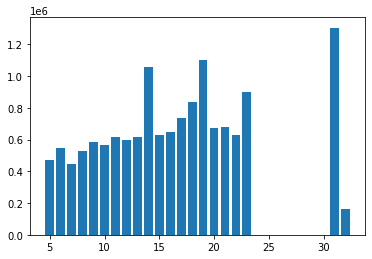

In [42]:
df=pd.DataFrame(data.groupby(['bath_fixtures'])['price'].mean()).reset_index()
plt.bar(df['bath_fixtures'], df['price'])

In [43]:
df['quantiles']=pd.qcut(df['price'], 3, labels=False)
df.sort_values(by=['price'])
group0=list(df[df['quantiles']==0]['bath_fixtures'].values)
group1=list(df[df['quantiles']==1]['bath_fixtures'].values)
group2=list(df[df['quantiles']==2]['bath_fixtures'].values)
def bath_fixtures_cleaned(x,y):
    if x in group0:
        return 0
    elif x in group1:
        return 1
    elif x in group2:
        return 2
    elif (pd.isna(x)) and (y <  5.954655e+05):
        return 0
    elif (pd.isna(x)) and (y <  6.776700e+05):
        return 1
    else:
        return 2
data['bath_fixtures_clean']=list(map(bath_fixtures_cleaned, data['bath_fixtures'],data['price']))
data.drop(['bath_fixtures'], axis=1, inplace=True)
df

bath_fixtures         price  quantiles
0             5.0  4.682704e+05          0
1             6.0  5.468076e+05          0
2             7.0  4.448582e+05          0
3             8.0  5.273202e+05          0
4             9.0  5.839110e+05          0
5            10.0  5.663333e+05          0
6            11.0  6.170198e+05          1
7            12.0  5.954655e+05          1
8            13.0  6.137284e+05          1
9            14.0  1.057350e+06          2
10           15.0  6.318065e+05          1
11           16.0  6.481174e+05          1
12           17.0  7.370351e+05          2
13           18.0  8.338250e+05          2
14           19.0  1.102300e+06          2
15           20.0  6.709167e+05          1
16           21.0  6.776700e+05          2
17           22.0  6.280000e+05          1
18           23.0  8.999000e+05          2
19           31.0  1.305000e+06          2
20           32.0  1.650000e+05          0

### Roof type code

In [44]:
df=pd.DataFrame(data.groupby(['roof_type_code'])['price'].mean()).reset_index()
df['quantiles']=pd.qcut(df['price'], 4, labels=False)
group0=list(df[df['quantiles']==0]['roof_type_code'].values)
group1=list(df[df['quantiles']==1]['roof_type_code'].values)
group2=list(df[df['quantiles']==2]['roof_type_code'].values)
group3=list(df[df['quantiles']==3]['roof_type_code'].values)
df.sort_values('price')
def roof_type_code_cleaned(x,y):
    if x in group0:
        return 0
    elif x in group1:
        return 1
    elif x in group2:
        return 2
    elif x in group3:
        return 3
    elif (pd.isna(x)) and (y <  434346.153846):
        return 0
    elif (pd.isna(x)) and (y < 586951.613465):
        return 1
    elif (pd.isna(x)) and (y < 665910.272727):
        return 2
    else:
        return 3
data['roof_type_clean']=list(map(roof_type_code_cleaned, data['roof_type_code'], data['price']))
data.drop(['roof_type_code'], axis=1, inplace=True)
df

roof_type_code          price  quantiles
0      Aluminum/Shingle  336750.000000          0
1                Arched  346666.666667          0
2               Asphalt  582897.736842          1
3             Clay Tile  819321.428571          3
4        Complex/Custom  665910.272727          3
5   Composition Shingle  112500.000000          0
6         Concrete Tile  471130.541667          1
7      Corrugated Metal  897681.818182          3
8        Enameled Metal  440000.000000          1
9                  Flat  434346.153846          1
10                Gable  598596.571868          2
11            Gable/Hip  586951.613465          2
12                  Hip  663859.054187          2
13              Mansard  596000.000000          2
14                Metal  429000.000000          0
15                 Shed  910666.666667          3

### Heating type code

In [45]:
v='heating_type_code'
df=pd.DataFrame(data.groupby([v])['price'].mean()).reset_index()
df['quantiles']=pd.qcut(df['price'], 4, labels=False)
group0=list(df[df['quantiles']==0][v].values)
group1=list(df[df['quantiles']==1][v].values)
group2=list(df[df['quantiles']==2][v].values)
group3=list(df[df['quantiles']==3][v].values)
df.sort_values('price')
def heat_type_code_cleaned(x,y):
    if x in group0:
        return 0
    elif x in group1:
        return 1
    elif x in group2:
        return 2
    elif x in group3:
        return 3
    elif (pd.isna(x)) and (y <  5.793386e+05):
        return 0
    elif (pd.isna(x)) and (y <  6.297870e+05):
        return 1
    elif (pd.isna(x)) and (y <  6.544368e+05):
        return 2
    else:
        return 3
data['heating_type_code']=list(map(heat_type_code_cleaned, data[v], data['price']))

### Garage Square Feet

In [46]:
data[data['garage_parking_square_feet'].notna()][['parking_type','garage_parking_square_feet','garage_code']].head(100)
data.parking_type.fillna(data['garage_code'], inplace=True)
def garage_clean2(x,y,z):
    if (pd.isna(x)) and ((pd.notna(y)) or (pd.notna(z))):
        return 'has garage'
    elif (pd.isna(x)):
        return 'other'
    else:
        return x
data['parking_type']=list(map(garage_clean2, data['parking_type'],data['garage_parking_square_feet'],data['garage_code']))
pd.DataFrame(data.groupby(['parking_type'])['garage_parking_square_feet'].mean()).reset_index()


parking_type  garage_parking_square_feet
0     Attached Finished Garage                  483.000000
1        Attached Frame Garage                  654.000000
2              Attached Garage                  418.529032
3              Basement Garage                  320.000000
4              Built-In Garage                  475.851852
5                      Carport                  300.887097
6     Detached Finished Garage                  585.600000
7        Detached Frame Garage                  576.000000
8              Detached Garage                  372.500000
9              Finished Garage                  478.406710
10  Unfinished Attached Garage                  492.400000
11  Unfinished Detached Garage                  454.652174
12           Unfinished Garage                  469.917647
13                  has garage                  513.979253
14                       other                         NaN

In [47]:
def clean_garage_parking_square_feet(x,y):
    if (y=='Attached Finished Garage') and (pd.isna(x)):
        return 483.000000
    elif (y=='Attached Frame Garage') and (pd.isna(x)):
        return 654.000000
    elif (y=='Attached Garage') and (pd.isna(x)):
        return 417.365385
    elif (y=='Basement Garage') and (pd.isna(x)):
        return 320.000000
    elif (y=='Built-In Garage') and (pd.isna(x)):
        return 485.127273
    elif (y=='Carport') and (pd.isna(x)):
        return 300.887097
    elif (y=='Detached Finished Garage') and (pd.isna(x)):
        return 585.600000
    elif (y=='Detached Frame Garage') and (pd.isna(x)):
        return 576.000000
    elif (y=='Detached Garage') and (pd.isna(x)):
        return 367.638298
    elif (y=='Finished Garage') and (pd.isna(x)):
        return 478.944715
    elif (y=='Unfinished Attached Garage') and (pd.isna(x)):
        return 492.400000
    elif (y=='Unfinished Detached Garage') and (pd.isna(x)):
        return 451.106383
    elif (y=='Unfinished Garage') and (pd.isna(x)):
        return 469.527344
    elif (y=='has garage') and (pd.isna(x)):
        return 511.885714
    elif (y=='other') and (pd.isna(x)):
        return 0
    else:
        return x
data['garage_parking_square_feet']=list(map(clean_garage_parking_square_feet, data['garage_parking_square_feet'], data['parking_type']))
data.drop(['garage_code'], axis=1, inplace=True)


### Building Quality

In [48]:
v='building_quality_code'
df=pd.DataFrame(data.groupby([v])['price'].mean()).reset_index()
df['quantiles']=pd.qcut(df['price'], 3, labels=False)
group0=list(df[df['quantiles']==0][v].values)
group1=list(df[df['quantiles']==1][v].values)
group2=list(df[df['quantiles']==2][v].values)
def building_quality_code_cleaned(x,y):
    if x in group0:
        return 0
    elif x in group1:
        return 1
    elif x in group2:
        return 2
    elif (pd.isna(x)) and (y <  6.162582e+05):
        return 0
    elif (pd.isna(x)) and (y <  9.663019e+05):
        return 1
    else:
        return 2
data['building_quality_code']=list(map(heat_type_code_cleaned, data[v], data['price']))

### Additional Columns to Drop

In [49]:
data.drop(['tax_area'],axis=1,inplace=True)
data.drop(['three_quarters_baths'],axis=1,inplace=True)
data.drop(['ismappable'],axis=1,inplace=True)
data.drop(['countyname'], axis = 1, inplace=True)
data.drop(['level_0'], axis = 1, inplace=True)
data.drop(['index'], axis = 1, inplace=True)
data.drop(['listingtype'],axis=1,inplace=True)
data.shape

(4644, 49)

### Fill Remaining Categorical Column Nulls with Mode

In [50]:
data.eventdescription.fillna(stats.mode(data['eventdescription']), inplace=True)
data.number_of_buildings.fillna(stats.mode(data['number_of_buildings']), inplace=True)
data.assessed_year.fillna(2021, inplace=True)
data['propertytype'].fillna(stats.mode(data['propertytype']), inplace=True)
data['searchstatus'].fillna(stats.mode(data['searchstatus']), inplace=True)

### Fill Remaining Continuous Column Nulls with Mean

In [51]:
data.acres.fillna(data['acres'].mean(), inplace=True)
data.land_square_footage.fillna(data['land_square_footage'].mean(), inplace=True)
data.viewcount.fillna(data['viewcount'].mean(), inplace=True)
data.totalfavoritescount.fillna(data['totalfavoritescount'].mean(), inplace=True)
data.totaltourcount.fillna(data['totaltourcount'].mean(), inplace=True)

### Reset data types

In [52]:
data['property_id2']=data['property_id2'].astype(str)
data['listing_id2']=data['listing_id2'].astype(str)
data['beds2']=data['beds2'].astype(str)
data['baths2']=data['baths2'].astype(str)
data['propertytype']=data['propertytype'].astype(str)
data['searchstatus']=data['searchstatus'].astype(str)
data['numfullbaths']=data['numfullbaths'].astype(str)
data['numstories']=data['numstories'].astype(str)
data['heating_type_code']=data['heating_type_code'].astype(str)
data['fireplace_type_code']=data['fireplace_type_code'].astype(str)
data['foundation_code']=data['foundation_code'].astype(str)
data['number_of_buildings']=data['number_of_buildings'].astype(str)
data['building_quality_code']=data['building_quality_code'].astype(str)
data['half_baths']=data['half_baths'].astype(str)
data['sale_year']=data['sale_year'].astype(str)
data['exterior_wall_code_cleaned']=data['exterior_wall_code_cleaned'].astype(str)
data['roof_type_clean']=data['roof_type_clean'].astype(str)
data['bath_fixtures_clean']=data['bath_fixtures_clean'].astype(str)

In [53]:
data.to_csv("/Users/kb/Ironhack/Labs/Home-Buying/DataNoNulls.csv", index = False)
data.head()

property_id2  listing_id2                                   address4 beds2  \
0   26719777.0  143915652.0              13040 SW Caddy Pl, Tigard, OR   2.0   
1   25986380.0  140570126.0            4103 SE Olsen St, Milwaukie, OR   4.0   
2   25936755.0  144176570.0  13531 Clairmont Way #175, Oregon City, OR   3.0   
3   25908665.0  144176917.0            3228 Journeay Ct, West Linn, OR   3.0   
4   25941484.0  133148956.0            18998 Pease Rd, Oregon City, OR   4.0   

  baths2   latitude   longitude propertytype searchstatus numfullbaths  \
0    2.5  45.425580 -122.811359         13.0        128.0          2.0   
1    2.5  45.454978 -122.621015          6.0          1.0          2.0   
2    2.0  45.330291 -122.590144         10.0          1.0          2.0   
3    2.5  45.362800 -122.642409          6.0        128.0          2.0   
4    2.5  45.331393 -122.604737          6.0          1.0          2.0   

   predictedvalue  squarefeet  viewcount  totalfavoritescount  totaltourcount  \
0       419640.19      1934.0     1846.0                 84.0             2.0   
1       728341.79      2289.0     5328.0                114.0             1.0   
2             NaN      1200.0      556.0                 30.0             0.0   
3       600851.22      1740.0     2519.0                174.0             3.0   
4       553536.42      2300.0    19585.0                720.0            26.0   

   totalamenities           propertytypename          numstories  yearbuilt  \
0            31.0                  Townhouse  1.2443099273607747     2000.0   
1            24.0  Single Family Residential                 1.0     1935.0   
2             7.0                      Other  1.2443099273607747     1987.0   
3            17.0  Single Family Residential  1.2443099273607747     2002.0   
4            25.0  Single Family Residential                 1.0     1960.0   

   yearrenovated  taxesdue eventdescription  daysonmarket     price  \
0         2000.0   3724.90          Pending          10.0  385000.0   
1         1935.0   2886.47           Listed           0.0  735000.0   
2         1987.0    259.43           Listed           0.0   79900.0   
3         2002.0   5063.14          Pending          10.0  550000.0   
4         1960.0   3819.82         Relisted           0.0  569000.0   

   publicstudentteacherratio  publicschoolrate  publicstudentcnt  privaterate  \
0                  17.333333          9.083333       1080.666667     9.970000   
1                  22.000000          8.283333        682.333333     8.911667   
2                  21.333333          5.683333       1124.000000    10.113889   
3                  21.333333          4.000000        984.000000    10.258333   
4                  21.333333          7.900000       1124.000000    10.500000   

   privatestudentcnt  basement_square_feet heating_type_code  \
0         520.388889                 140.0                 1   
1         292.233333                   0.0                 3   
2         212.138889                   0.0                 0   
3         199.944444                   0.0                 0   
4         204.833333                   0.0                 3   

   number_of_fireplaces fireplace_type_code     foundation_code  \
0                   1.0             Gas/Log  Continuous Footing   
1                   1.0           1 Opening            Concrete   
2                   0.0               Other             unknown   
3                   0.0               Other             unknown   
4                   1.0           1 Opening               other   

   assessed_year     parking_type  garage_parking_square_feet  \
0         2020.0  Finished Garage                       559.0   
1         2021.0            other                         0.0   
2         2021.0            other                         0.0   
3         2021.0            other                         0.0   
4         2021.0            other                         0.0   

  number_of_buildings

# Cleaning Categoricals

In [54]:
num = data.select_dtypes(np.number)
cont=[]
disc=[]
for i in num.columns:
    if data[i].nunique()/len(data)<.002:
        disc.append(i)
    else:
        cont.append(i)
print(cont)
print(disc)
continuous=data[cont]
discrete=data[disc]
cat=data.select_dtypes(np.object).drop(['property_id2','listing_id2'], axis=1)
obs=pd.DataFrame(np.concatenate((cat, discrete), axis=1))
obcol=cat.columns.append(discrete.columns)
obs.columns=obcol
obs.drop(['address4'], axis=1,inplace=True)
continuous.drop(['latitude'], axis=1,inplace=True)
continuous.drop(['longitude'], axis=1,inplace=True)
continuous.drop(['predictedvalue'], axis=1,inplace=True)
obs.head()

['latitude', 'longitude', 'predictedvalue', 'squarefeet', 'viewcount', 'totalfavoritescount', 'totaltourcount', 'totalamenities', 'yearbuilt', 'yearrenovated', 'taxesdue', 'daysonmarket', 'price', 'publicstudentteacherratio', 'publicschoolrate', 'publicstudentcnt', 'privaterate', 'privatestudentcnt', 'basement_square_feet', 'garage_parking_square_feet', 'land_square_footage', 'acres', 'taxrate']
['number_of_fireplaces', 'assessed_year']


beds2 baths2 propertytype searchstatus numfullbaths  \
0   2.0    2.5         13.0        128.0          2.0   
1   4.0    2.5          6.0          1.0          2.0   
2   3.0    2.0         10.0          1.0          2.0   
3   3.0    2.5          6.0        128.0          2.0   
4   4.0    2.5          6.0          1.0          2.0   

            propertytypename          numstories eventdescription  \
0                  Townhouse  1.2443099273607747          Pending   
1  Single Family Residential                 1.0           Listed   
2                      Other  1.2443099273607747           Listed   
3  Single Family Residential  1.2443099273607747          Pending   
4  Single Family Residential                 1.0         Relisted   

  heating_type_code fireplace_type_code     foundation_code     parking_type  \
0                 1             Gas/Log  Continuous Footing  Finished Garage   
1                 3           1 Opening            Concrete            other   
2                 0               Other             unknown            other   
3                 0               Other             unknown            other   
4                 3           1 Opening               other            other   

  number_of_buildings building_quality_code half_baths pool_indicator  \
0                 1.0                     0        0.0              0   
1                 1.0                     0        0.0              0   
2                 1.0                     0        0.0              0   
3                 1.0                     0        1.0              0   
4                 1.0                     0        0.0              0   

  sale_year  sale_ind exterior_wall_code_cleaned bath_fixtures_clean  \
0    2022.0  for sale                          2                   0   
1    2022.0  for sale                          3                   2   
2    2022.0  for sale                          0                   0   
3    2022.0  for sale                          1                   0   
4    2022.0  for sale                          3                   0   

  roof_type_clean number_of_fireplaces assessed_year  
0               2                  1.0        2020.0  
1               3                  1.0        2021.0  
2               0                  0.0        2021.0  
3               1                  0.0        2021.0  
4               3                  1.0        2021.0

beds2


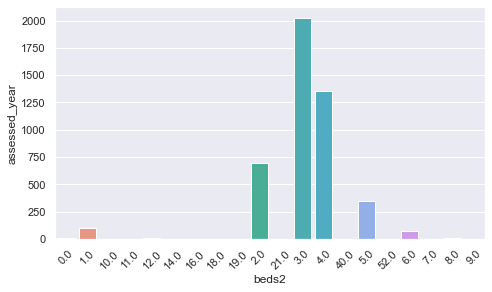

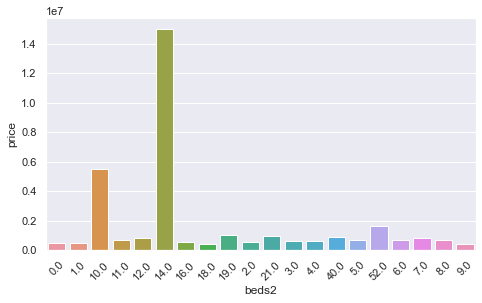

baths2


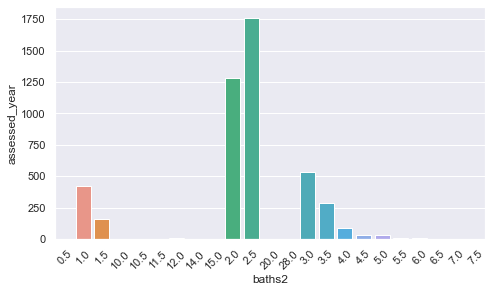

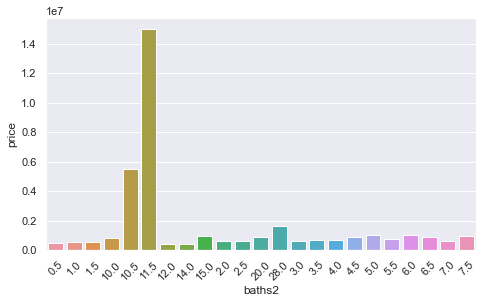

propertytype


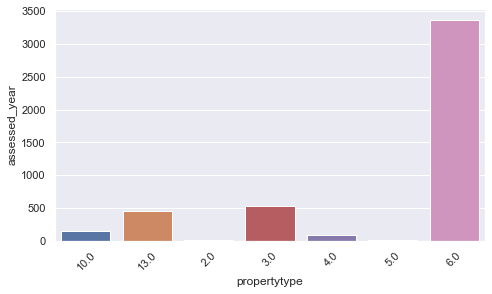

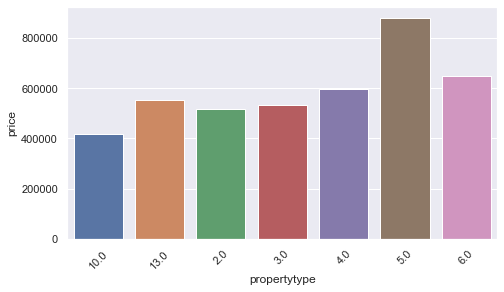

searchstatus


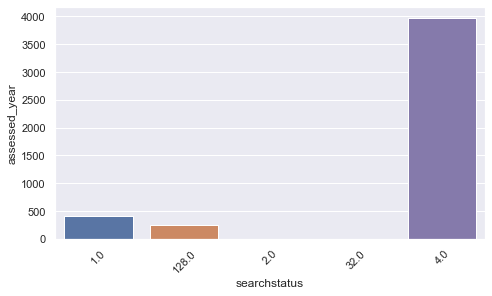

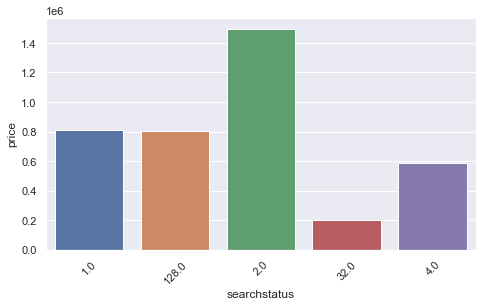

numfullbaths


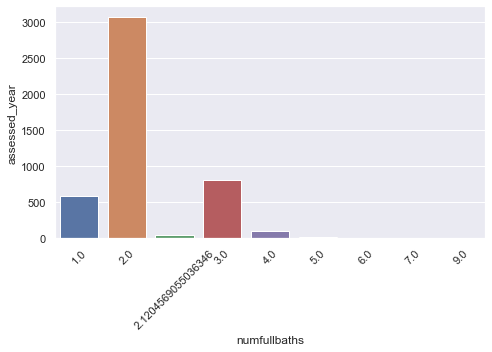

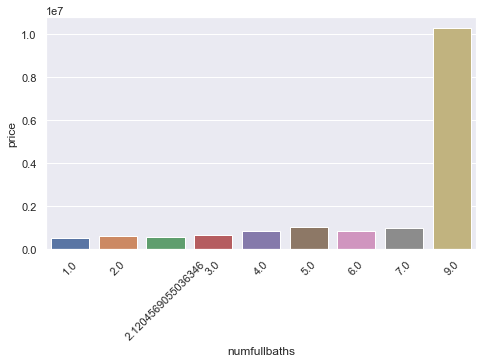

propertytypename


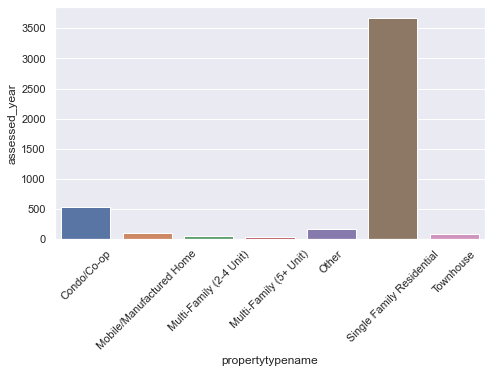

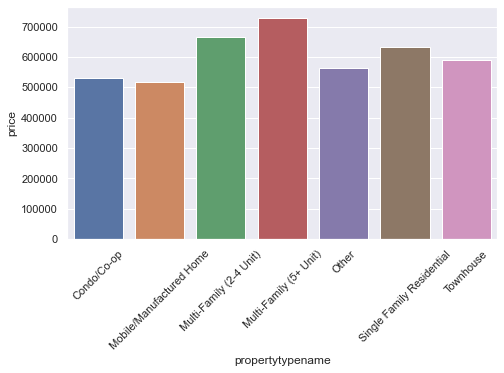

numstories


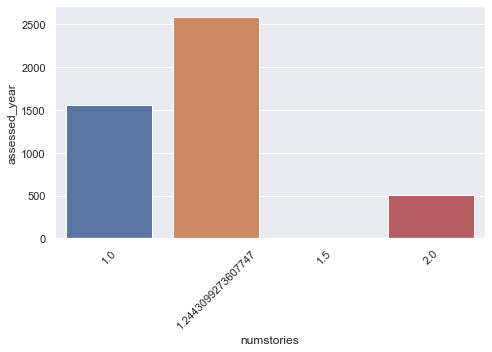

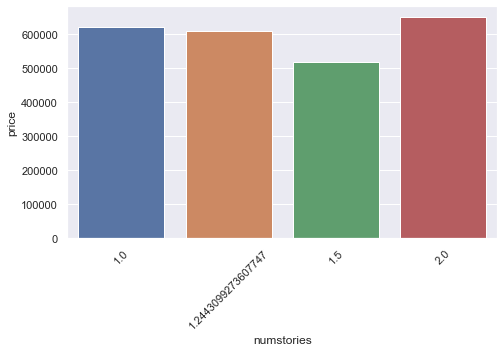

eventdescription


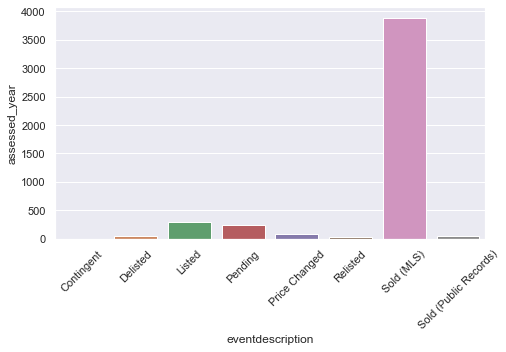

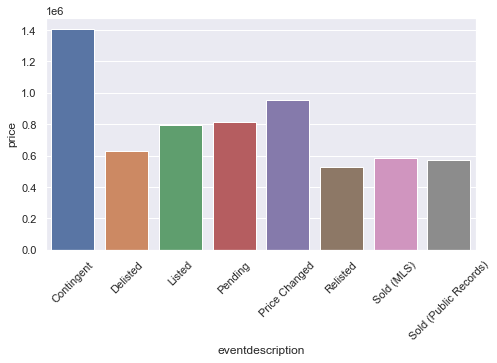

heating_type_code


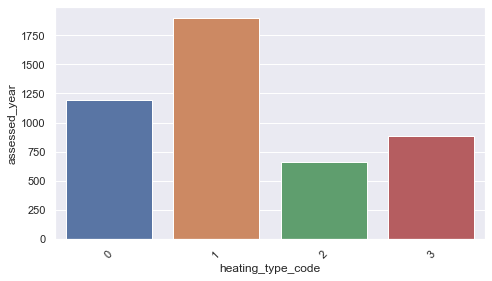

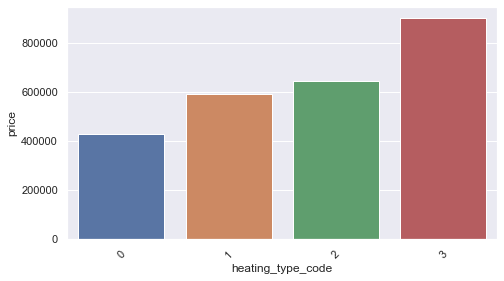

fireplace_type_code


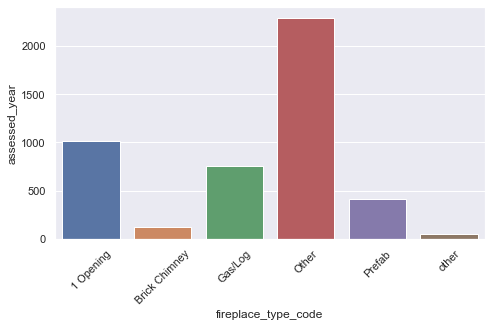

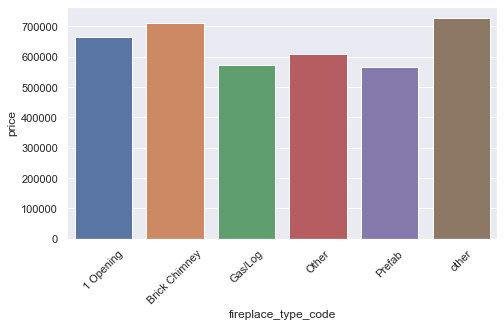

foundation_code


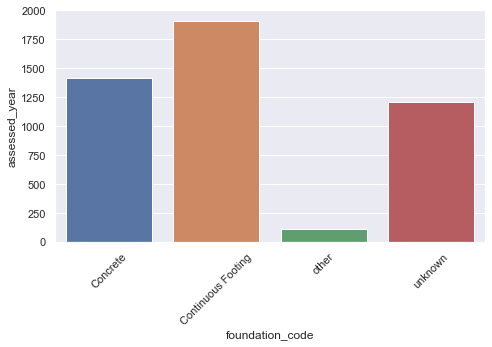

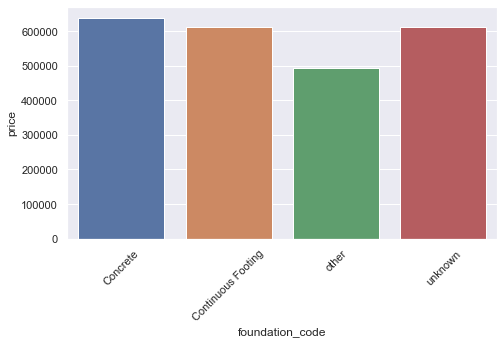

parking_type


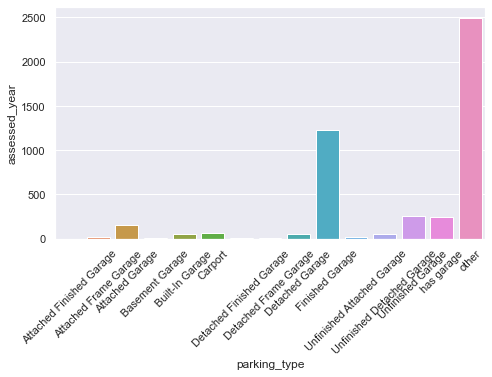

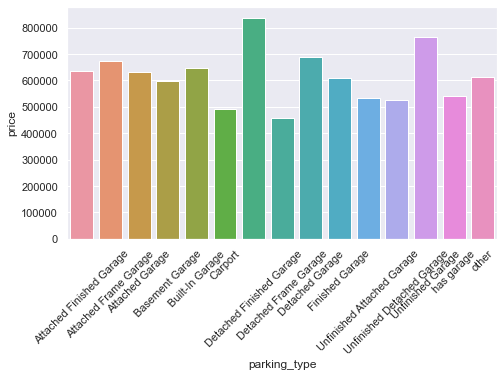

number_of_buildings


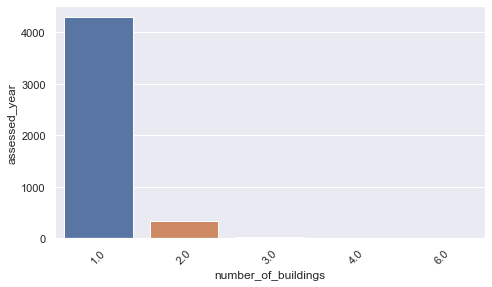

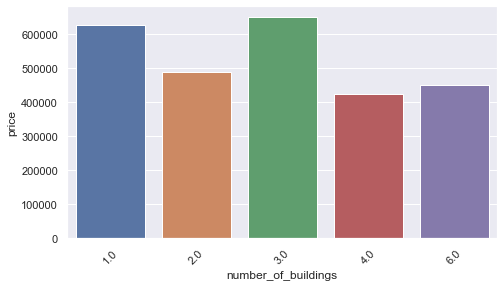

building_quality_code


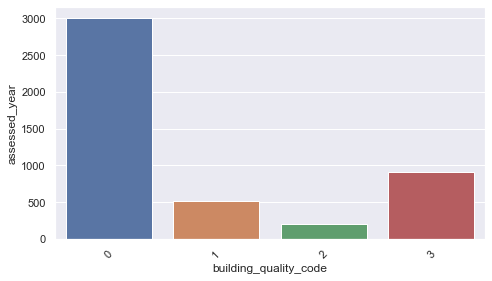

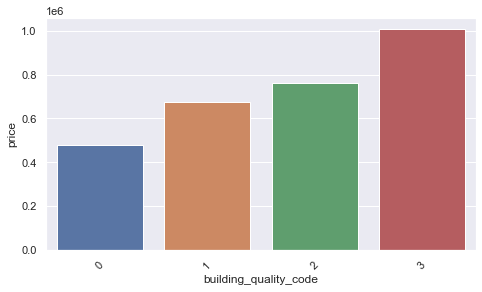

half_baths


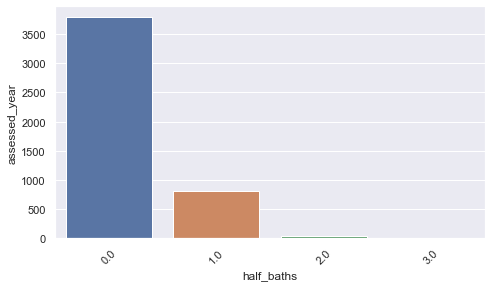

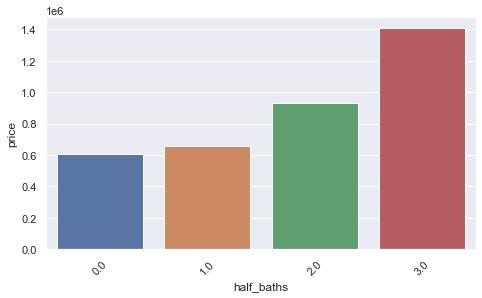

pool_indicator


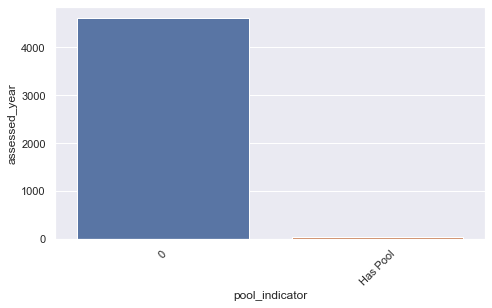

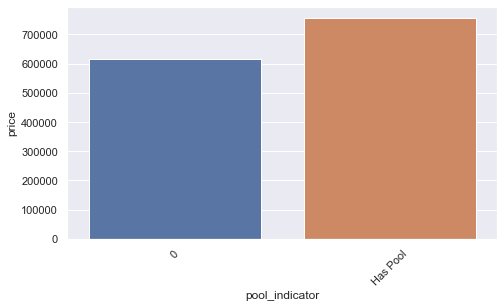

sale_year


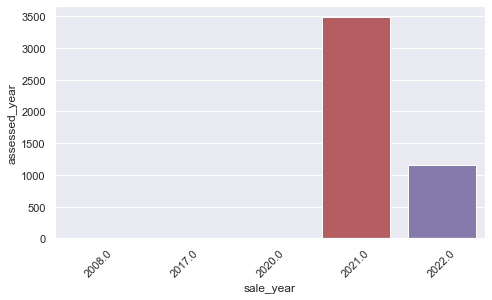

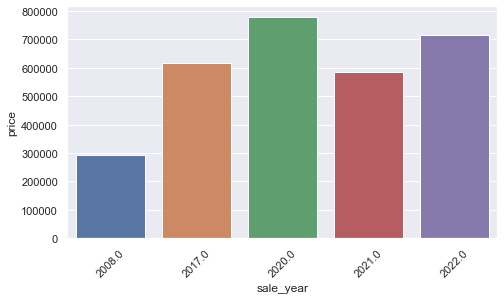

sale_ind


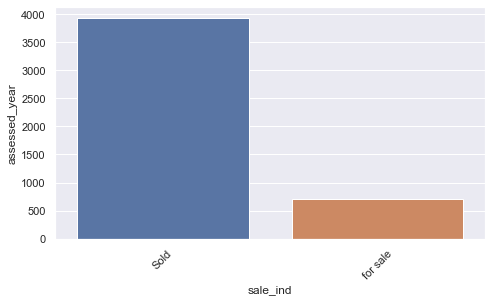

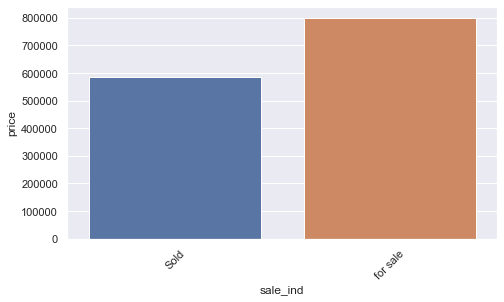

exterior_wall_code_cleaned


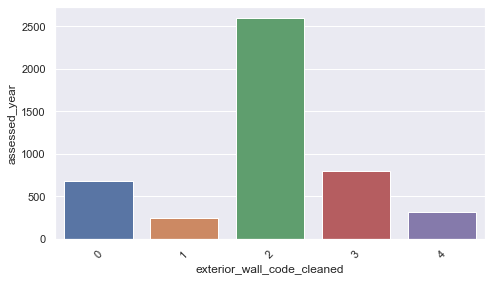

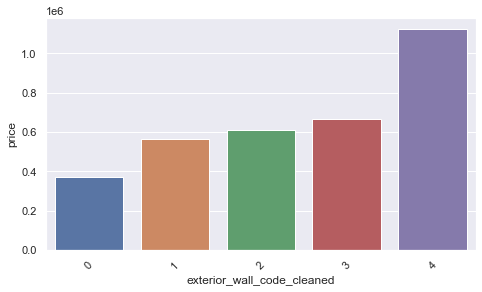

bath_fixtures_clean


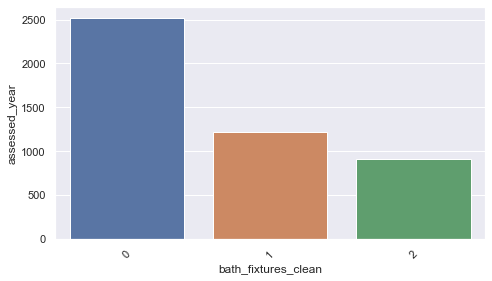

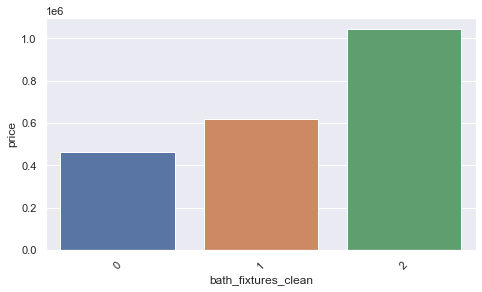

roof_type_clean


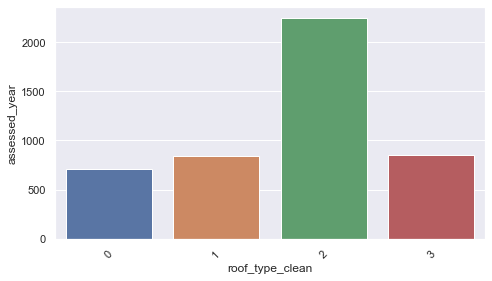

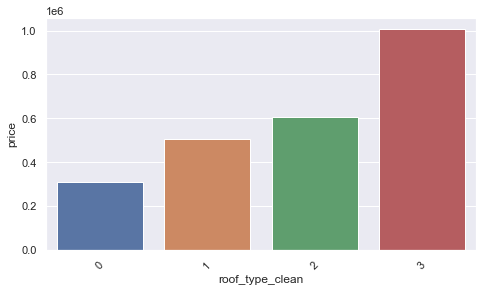

number_of_fireplaces


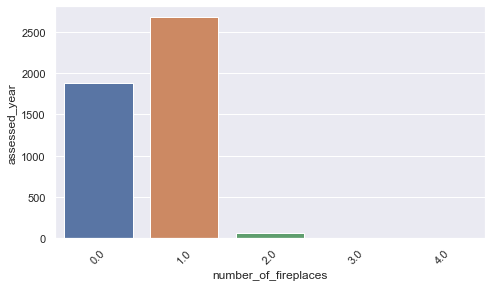

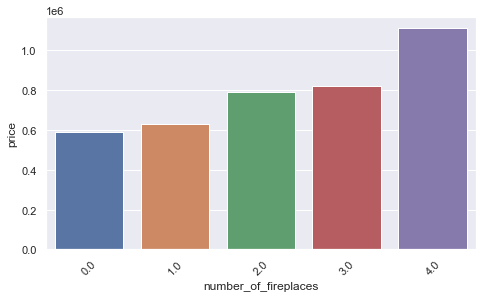

assessed_year


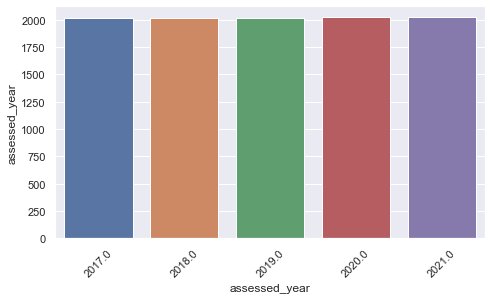

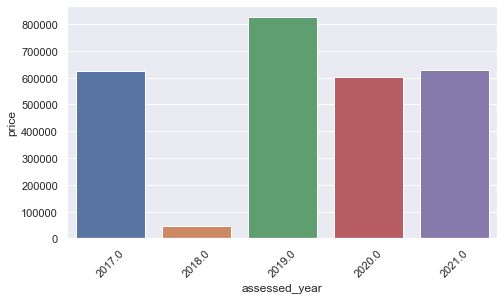

In [55]:
sns.set(rc={'figure.figsize':(7.7,4.27)})
for i in obs.columns:
    print(i)
    z=pd.DataFrame(obs.groupby(i).count()).reset_index()
    sns.barplot( x=z[i], y=z['assessed_year'], data=z)
    for item in sns.barplot( x=z[i], y=z['assessed_year'], data=z).get_xticklabels():
        item.set_rotation(45)
    plt.show()
    w=pd.DataFrame(data.groupby(i).mean()['price']).reset_index()
    sns.barplot( x=w[i], y=w['price'], data=w)
    for item in  sns.barplot( x=w[i], y=w['price'], data=w).get_xticklabels():
        item.set_rotation(45)
    plt.show()

In [56]:
def beds_(x):
    if float(x) >6:
        return 'Other'
    else:
        return x
data['beds2']=list(map(beds_, data['beds2']))
data=data[(data['beds2']!='0.0') ]

In [57]:
def baths2_(x):
    if float(x) >5.5:
        return 'Other'
    elif '1' in x:
        return '1'
    elif '2' in x:
        return '2'
    elif '3' in x:
        return '3'
    elif '4' in x:
        return '4'
    elif '5' in x:
        return '5'
    else:
        return x
data['baths2']=list(map(baths2_, data['baths2']))
data=data[(data['baths2']!='0.5') ]

In [58]:
def propertytypename_(x):
    if x in ('Townhouse','Other'):
        return 'Townhouse&Other'
    elif x in ('Condo/Co-op','Mobile/Manufactured Home'):
        return 'Condo&Manufactured'
    elif 'Multi' in x:
        return 'Multi-Family'
    else:
        return x
data['propertytypename']=list(map(propertytypename_, data['propertytypename']))

In [59]:
def eventdescription_(x):
    if x in ('Listed','Pending','Delisted'):
        return 'Listed&Pending'
    elif 'Sold' in x:
        return 'Sold'
    else:
        return 'other'
data['eventdescription']=list(map(eventdescription_, data['eventdescription']))

In [60]:
def fireplace_type_code_(x):
    if x in ('Brick Chimney','other','1 Opening'):
        return 'Brick&Opening'
    else:
        return x
data['fireplace_type_code']=list(map(fireplace_type_code_, data['fireplace_type_code']))

In [61]:
def garage_clean(x):
    if x=='other':
        return 'other'
    elif 'Finished' in x:
        return 'Finished'
    elif 'Basement' in x:
        return 'Finished'
    elif 'Carport' in x:
        return 'Detached'
    elif 'Detached' in x:
        return 'Detached'
    else:
        return 'Unfinished'
data['parking_type']=list(map(garage_clean, data['parking_type']))

In [62]:
def propertytype(x):
    if (x==4.0) or (x==6) or (x==8):
        return '4&6&8'
    elif x in (1,2,3,13):
        return '2,3,13'
    else:
        return x
data['propertytype']=list(map(propertytype, data['propertytype']))

In [63]:
def searchstatus_(x):
    if float(x) <3:
        return '1&2'
    elif float(x)<33:
        return '4&32'
    else:
        return x
data['searchstatus']=list(map(searchstatus_, data['searchstatus']))

In [64]:
data.drop(['numfullbaths'],axis=1,inplace=True)
data.drop(['numstories'],axis=1,inplace=True)
data.drop(['number_of_buildings'],axis=1,inplace=True)

In [65]:
def assessed_year_(x):
    if x < 2020:
        return '<2020'
    else:
        return str(x)
data['assessed_year']=list(map(assessed_year_, data['assessed_year']))

In [66]:
def half_baths_(x):
    if x ==0:
        return 'No'
    else:
        return 'Yes'
data['half_baths']=list(map(half_baths_, data['half_baths']))

In [67]:
data=data[data['sale_year'].astype(float)>2020]

In [68]:
num = data.select_dtypes(np.number)
cont=[]
disc=[]
for i in num.columns:
    if data[i].nunique()/len(data)<.002:
        disc.append(i)
    else:
        cont.append(i)
print(cont)
print(disc)
continuous=data[cont]
discrete=data[disc]
cat=data.select_dtypes(np.object).drop(['property_id2','listing_id2'], axis=1)
obs=pd.DataFrame(np.concatenate((cat, discrete), axis=1))
obcol=cat.columns.append(discrete.columns)
obs.columns=obcol
obs.drop(['address4'], axis=1,inplace=True)
continuous.drop(['latitude'], axis=1,inplace=True)
continuous.drop(['longitude'], axis=1,inplace=True)
continuous.drop(['predictedvalue'], axis=1,inplace=True)
obs.head()

['latitude', 'longitude', 'predictedvalue', 'squarefeet', 'viewcount', 'totalfavoritescount', 'totaltourcount', 'totalamenities', 'yearbuilt', 'yearrenovated', 'taxesdue', 'daysonmarket', 'price', 'publicstudentteacherratio', 'publicschoolrate', 'publicstudentcnt', 'privaterate', 'privatestudentcnt', 'basement_square_feet', 'garage_parking_square_feet', 'land_square_footage', 'acres', 'taxrate']
['number_of_fireplaces']


beds2 baths2 propertytype searchstatus           propertytypename  \
0   2.0      2         13.0        128.0            Townhouse&Other   
1   4.0      2          6.0          1&2  Single Family Residential   
2   3.0      2         10.0          1&2            Townhouse&Other   
3   3.0      2          6.0        128.0  Single Family Residential   
4   4.0      2          6.0          1&2  Single Family Residential   

  eventdescription heating_type_code fireplace_type_code     foundation_code  \
0   Listed&Pending                 1             Gas/Log  Continuous Footing   
1   Listed&Pending                 3       Brick&Opening            Concrete   
2   Listed&Pending                 0               Other             unknown   
3   Listed&Pending                 0               Other             unknown   
4            other                 3       Brick&Opening               other   

  assessed_year parking_type building_quality_code half_baths pool_indicator  \
0        2020.0     Finished                     0        Yes              0   
1        2021.0        other                     0        Yes              0   
2        2021.0        other                     0        Yes              0   
3        2021.0        other                     0        Yes              0   
4        2021.0        other                     0        Yes              0   

  sale_year  sale_ind exterior_wall_code_cleaned bath_fixtures_clean  \
0    2022.0  for sale                          2                   0   
1    2022.0  for sale                          3                   2   
2    2022.0  for sale                          0                   0   
3    2022.0  for sale                          1                   0   
4    2022.0  for sale                          3                   0   

  roof_type_clean number_of_fireplaces  
0               2                  1.0  
1               3                  1.0  
2               0                  0.0  
3               1                  0.0  
4               3                  1.0

beds2


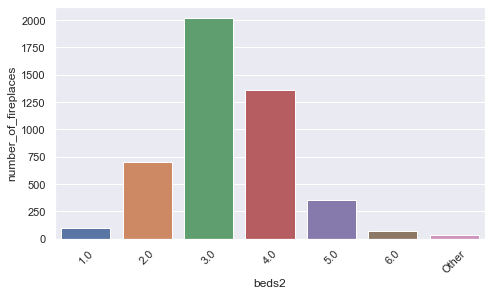

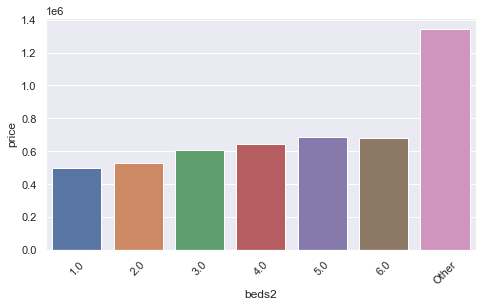

baths2


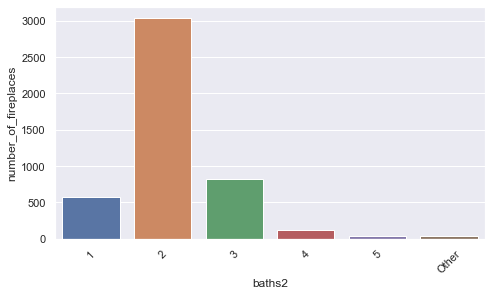

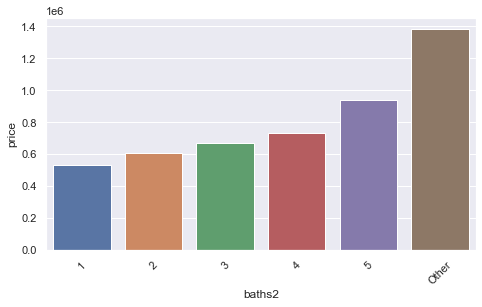

propertytype


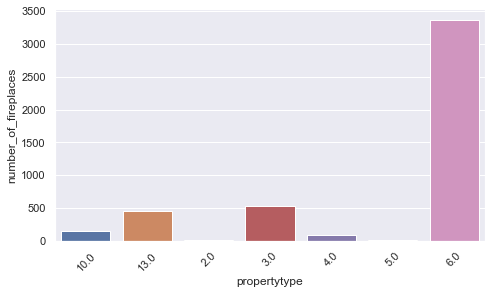

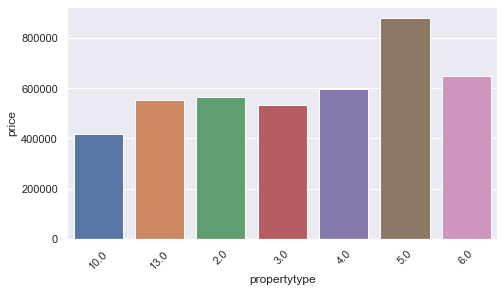

searchstatus


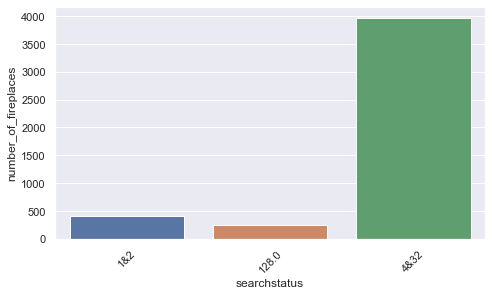

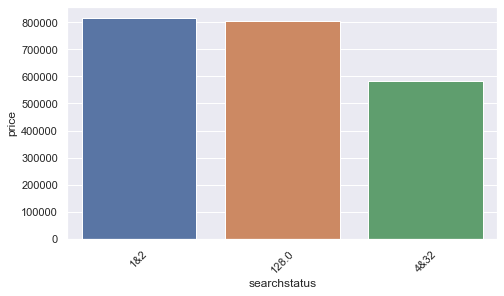

propertytypename


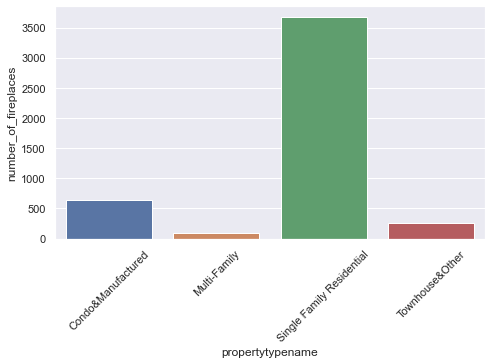

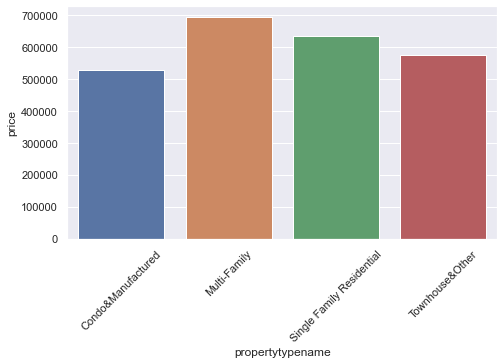

eventdescription


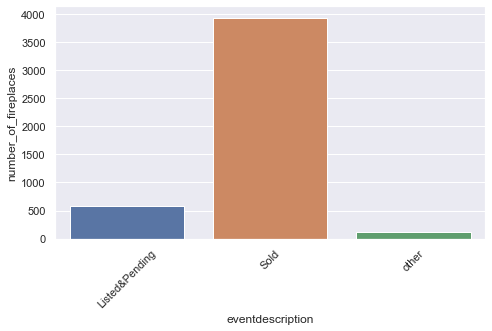

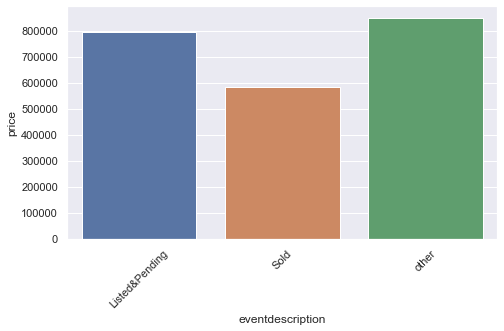

heating_type_code


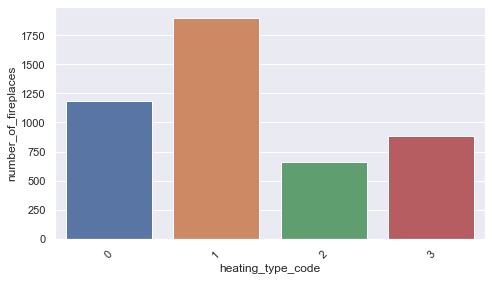

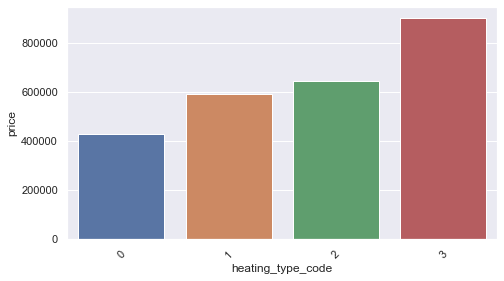

fireplace_type_code


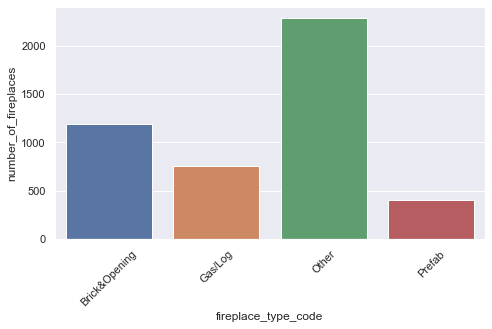

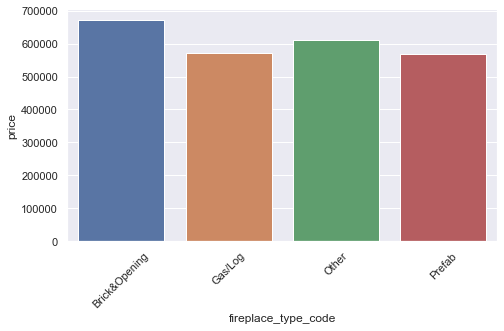

foundation_code


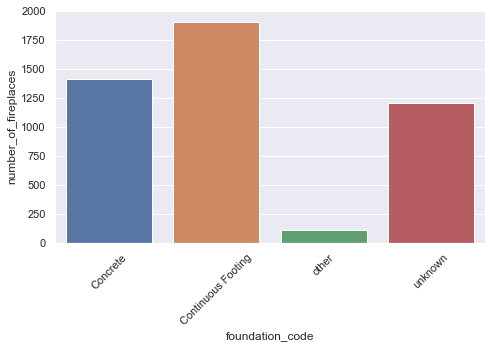

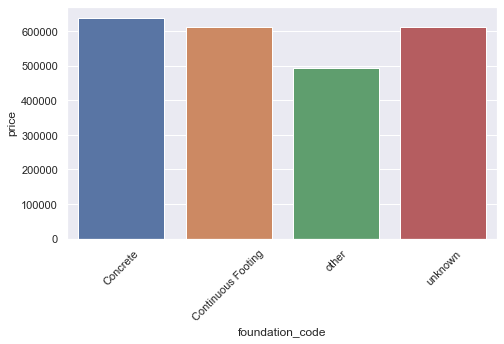

assessed_year


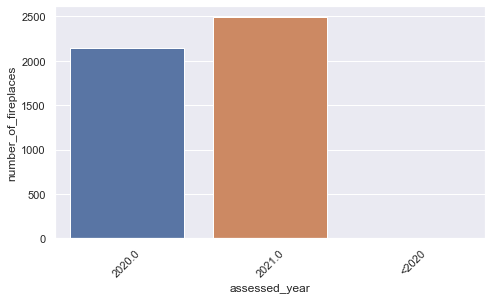

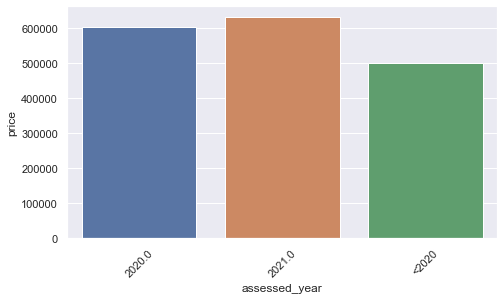

parking_type


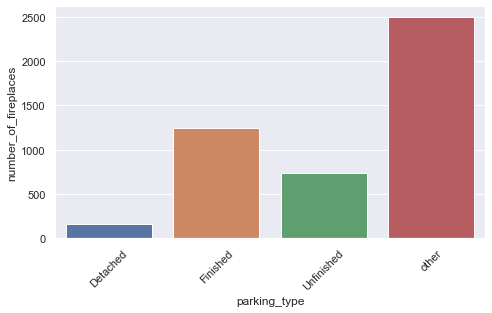

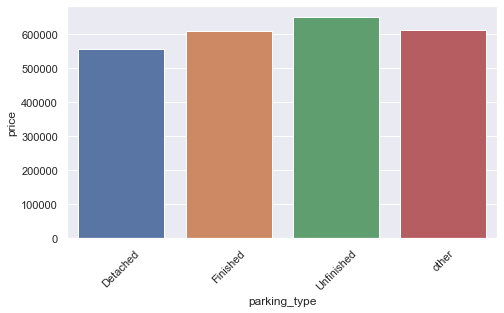

building_quality_code


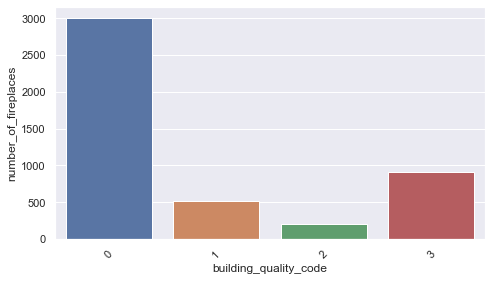

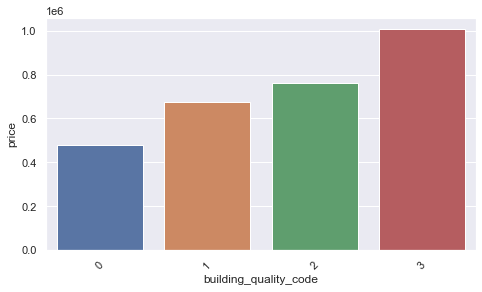

half_baths


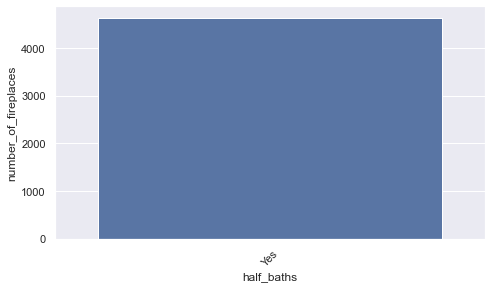

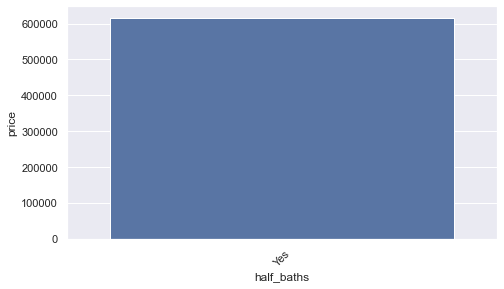

pool_indicator


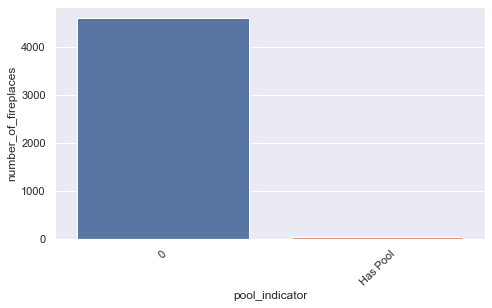

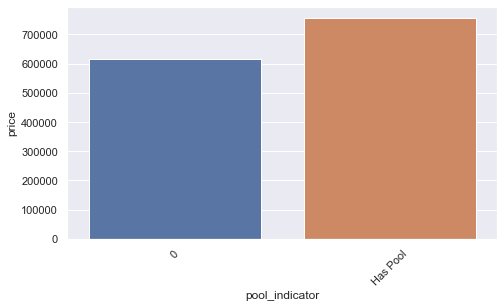

sale_year


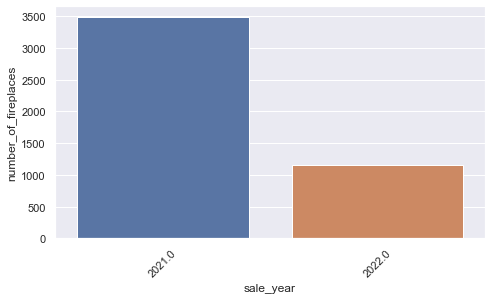

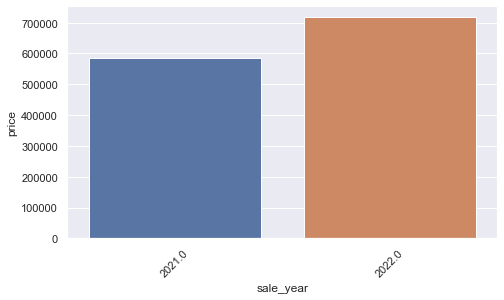

sale_ind


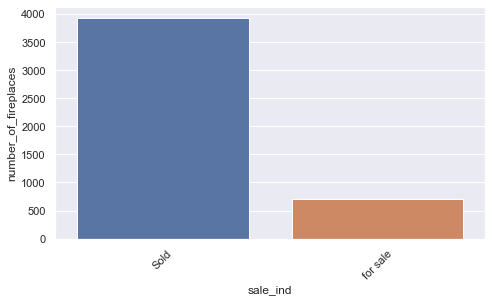

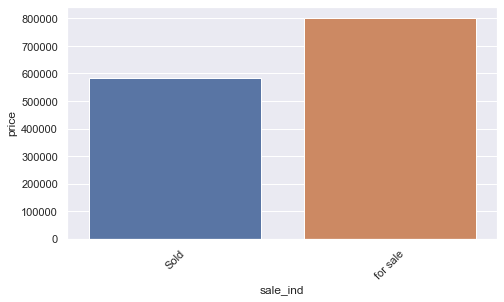

exterior_wall_code_cleaned


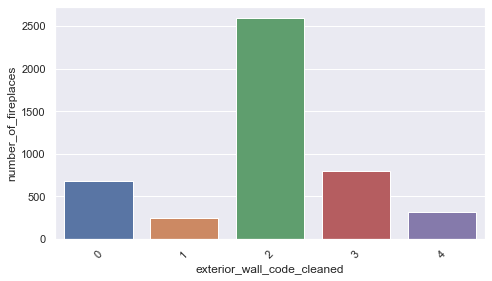

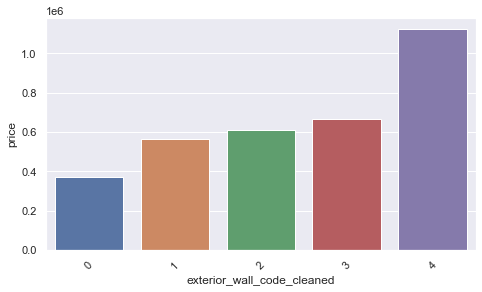

bath_fixtures_clean


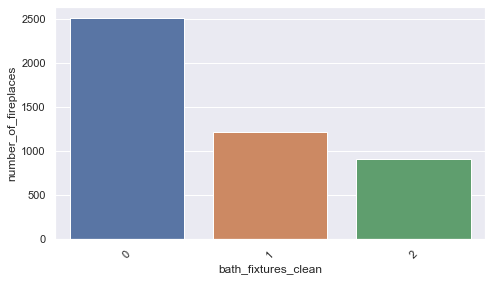

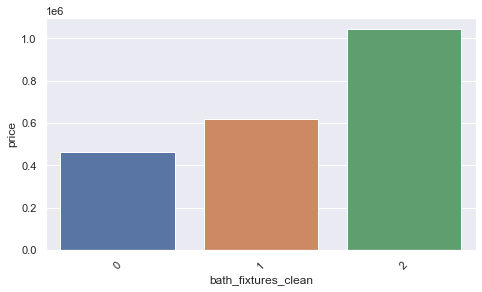

roof_type_clean


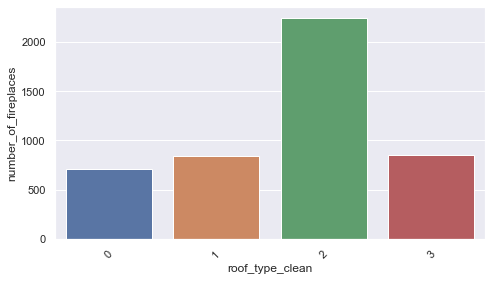

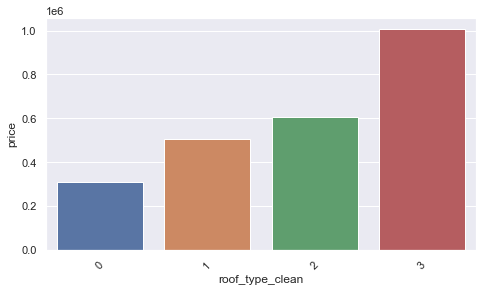

number_of_fireplaces


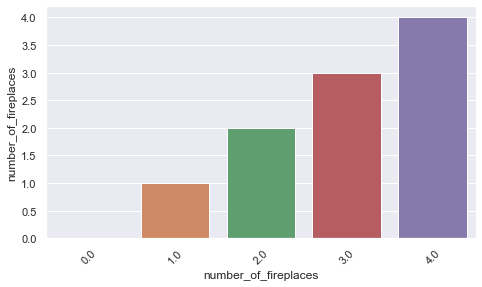

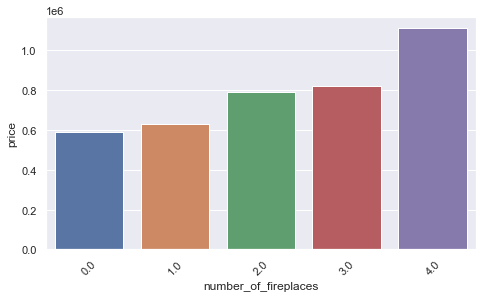

In [69]:
sns.set(rc={'figure.figsize':(7.7,4.27)})
for i in obs.columns:
    print(i)
    z=pd.DataFrame(obs.groupby(i).count()).reset_index()
    sns.barplot( x=z[i], y=z['number_of_fireplaces'], data=z)
    for item in sns.barplot( x=z[i], y=z['number_of_fireplaces'], data=z).get_xticklabels():
        item.set_rotation(45)
    plt.show()
    w=pd.DataFrame(data.groupby(i).mean()['price']).reset_index()
    sns.barplot( x=w[i], y=w['price'], data=w)
    for item in  sns.barplot( x=w[i], y=w['price'], data=w).get_xticklabels():
        item.set_rotation(45)
    plt.show()

# Cleaning Categorical

squarefeet


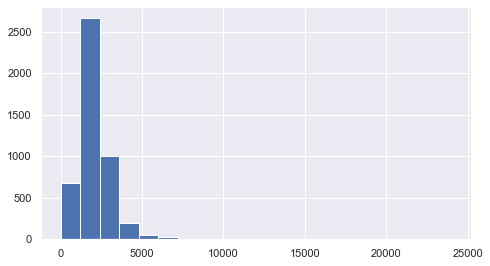

viewcount


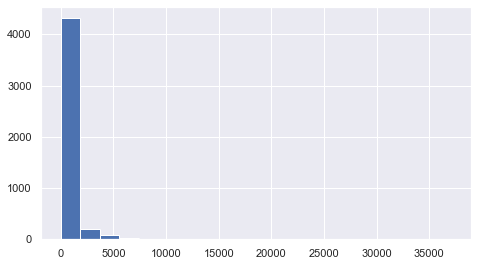

totalfavoritescount


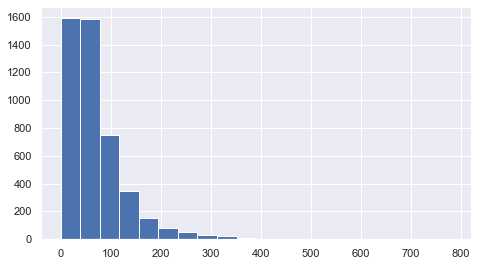

totaltourcount


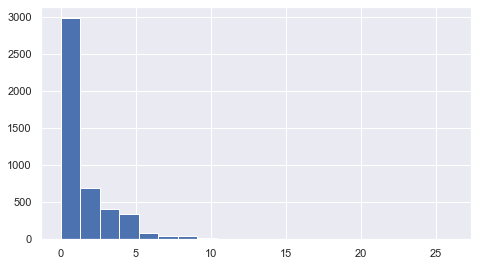

totalamenities


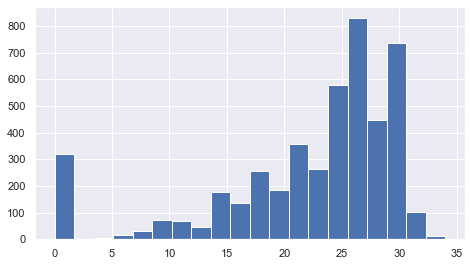

yearbuilt


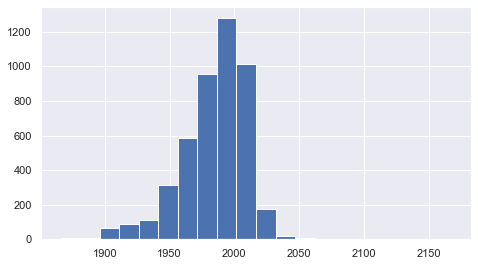

yearrenovated


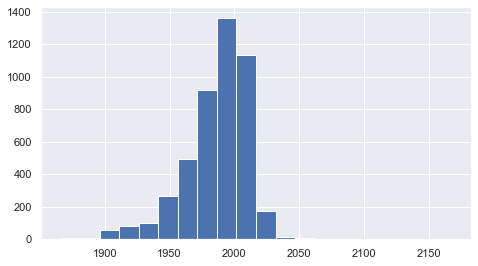

taxesdue


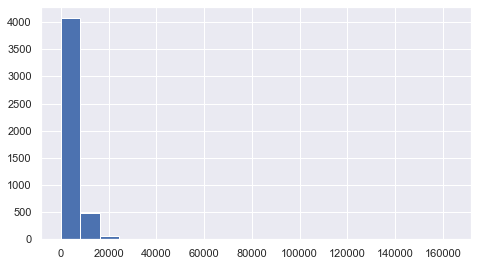

daysonmarket


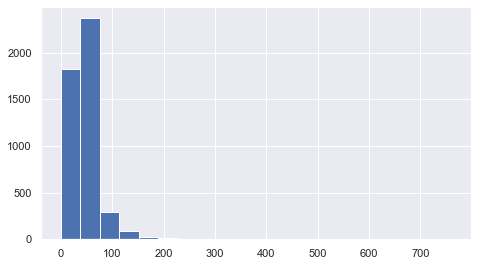

price


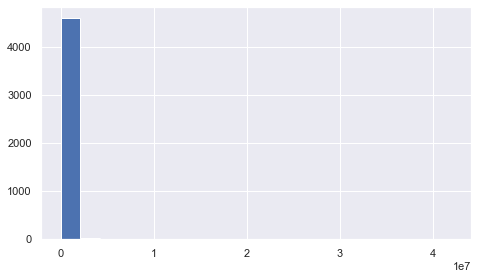

publicstudentteacherratio


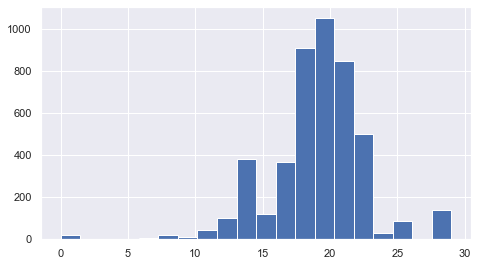

publicschoolrate


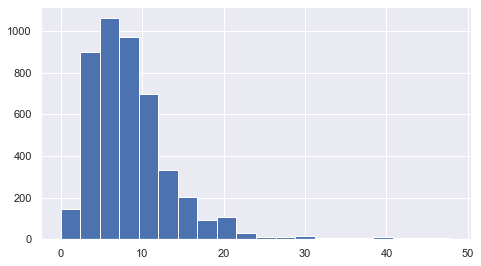

publicstudentcnt


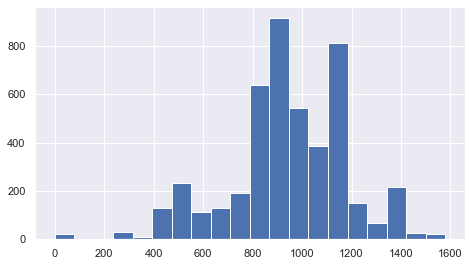

privaterate


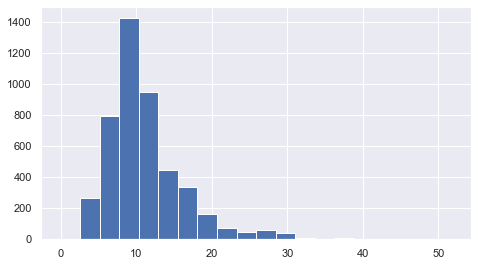

privatestudentcnt


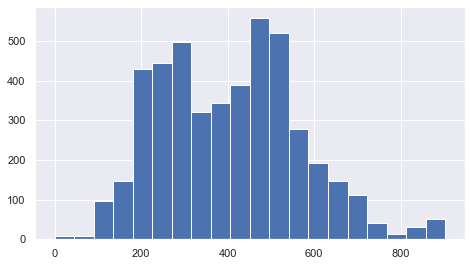

basement_square_feet


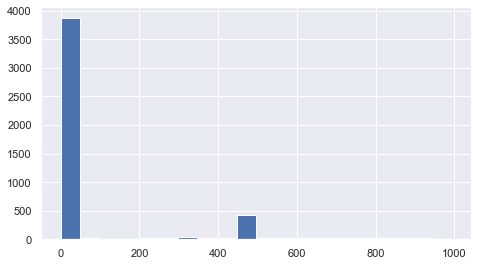

garage_parking_square_feet


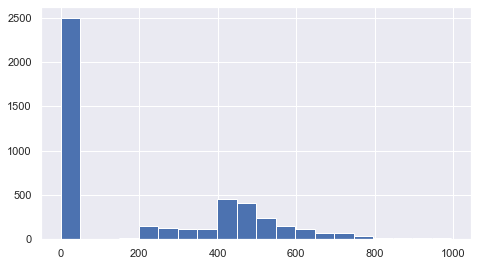

land_square_footage


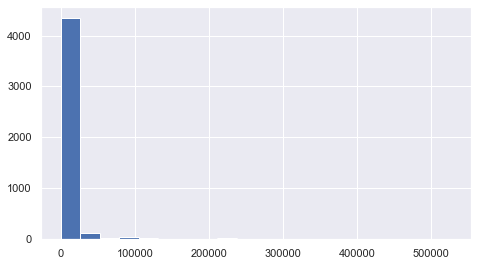

acres


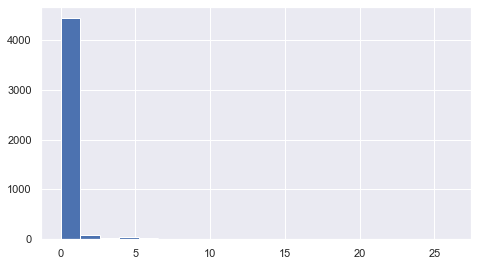

taxrate


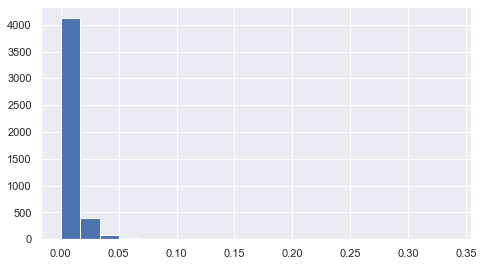

In [70]:
for i in continuous.columns:
    print(i)
    continuous[i].hist(bins=20)
    plt.show()

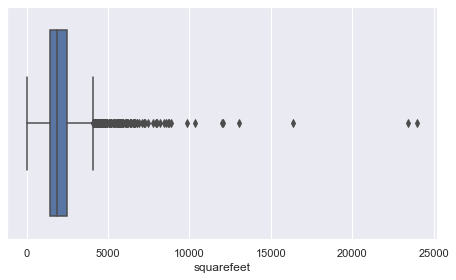

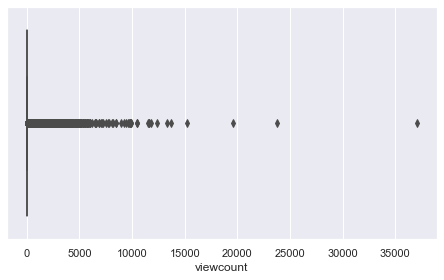

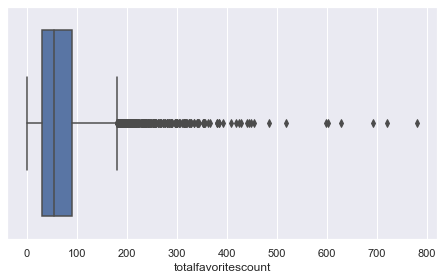

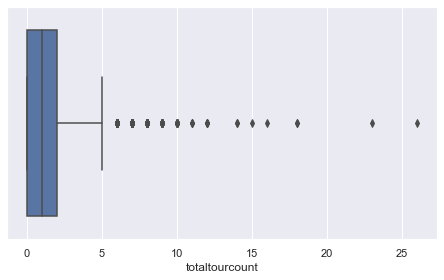

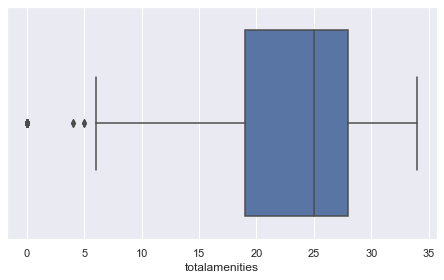

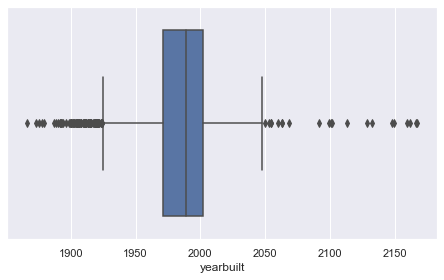

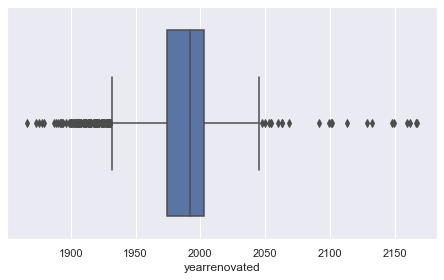

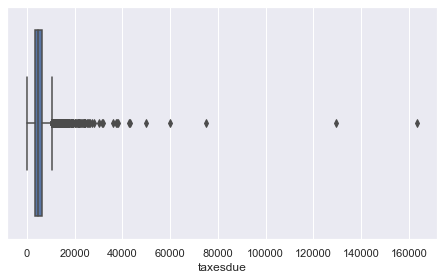

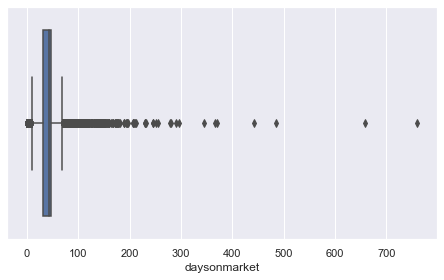

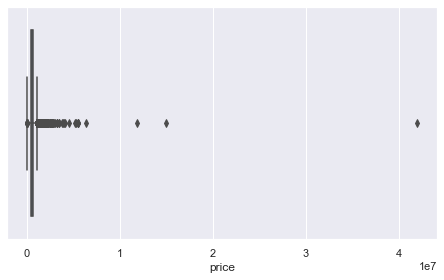

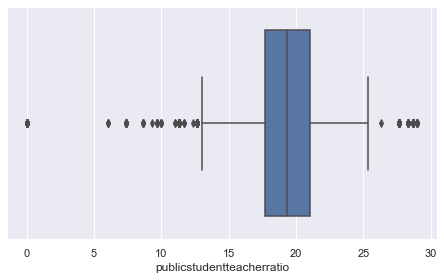

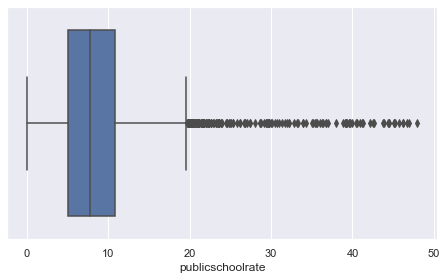

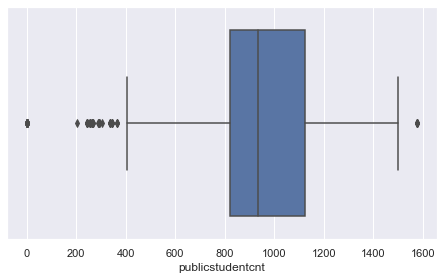

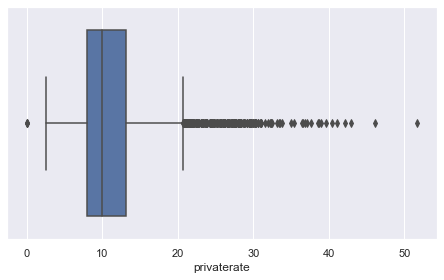

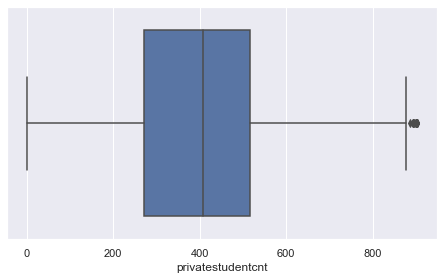

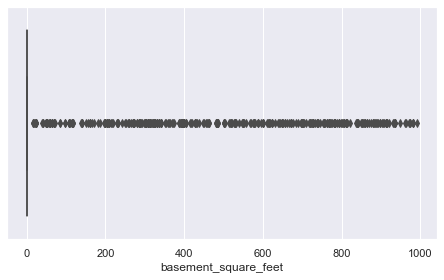

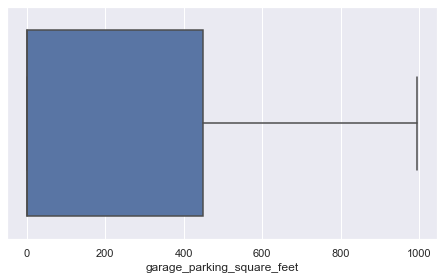

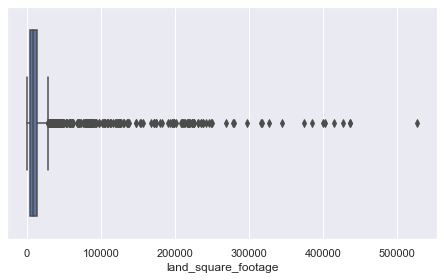

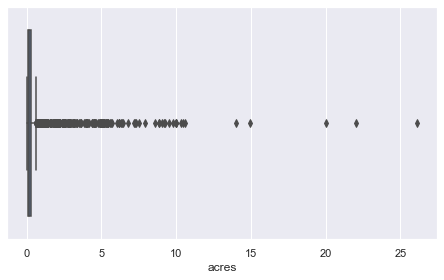

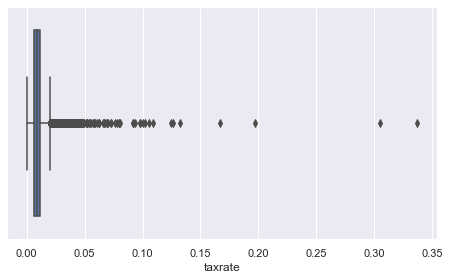

In [71]:
for i in continuous.columns:
    sns.boxplot(continuous[i])
    plt.show()

In [72]:
#Homes must be built prior to 2022
def year_(x):
    if x>2022:
        return np.nan
    else:
        return x
data['yearbuilt']=list(map(year_, data['yearbuilt']))
data['yearbuilt'].fillna(data['yearbuilt'].mean(), inplace=True)

In [73]:
#Homes must be renovated prior to 2022
data['yearrenovated']=list(map(year_, data['yearrenovated']))
data['yearrenovated'].fillna(data['yearrenovated'].mean(), inplace=True)

In [74]:
#Only Interested in buying homes above this price
print(data.shape)
data=data[data['price']>150000]
data.shape

(4635, 46)


(4500, 46)

In [75]:
#Remove Outliers
var_char={}
for i in data.columns:
    if i in list(continuous.columns) and i not in ('totalfavoritescount','viewcount','totaltourcount','totalamenities','yearbuilt','yearrenovated','daysonmarket','taxrate','taxesdue','publicstudentteacherratio','privaterate','publicschoolrate','acres'):
        iqr = np.percentile(data[i],75)-np.percentile(data[i],25)
        var_char['upperlimit'+str(i)]=np.percentile(data[i],75)+iqr*1.5
        var_char['lowerlimit'+str(i)]=np.percentile(data[i],25)-iqr*1.5
        print(i, iqr, var_char['upperlimit'+str(i)], var_char['lowerlimit'+str(i)], data.shape)
    elif i in ('totalfavoritescount','totaltourcount','totalamenities','daysonmarket','taxrate','publicstudentteacherratio','privaterate','publicschoolrate','acres'):
        iqr = np.percentile(data[i],75)-np.percentile(data[i],25)
        var_char['upperlimit'+str(i)]=np.percentile(data[i],75)+iqr*4
        var_char['lowerlimit'+str(i)]=np.percentile(data[i],25)-iqr*4
        #print(i, iqr, var_char['upperlimit'+str(i)], var_char['lowerlimit'+str(i)], data.shape)
for i in data.columns:
    if i in list(continuous.columns):
        try:
            if var_char['upperlimit'+str(i)] != var_char['lowerlimit'+str(i)]:
                data=data[(data[i]>var_char['lowerlimit'+str(i)]) & (data[i]<var_char['upperlimit'+str(i)])]
            print(i, var_char['upperlimit'+str(i)], var_char['lowerlimit'+str(i)], data.shape)
        except:
            continue

squarefeet 1068.0 4098.0 -174.0 (4500, 46)
price 254500.0 1073750.0 55750.0 (4500, 46)
publicstudentcnt 301.0 1575.5 371.5 (4500, 46)
privatestudentcnt 244.25 882.375 -94.625 (4500, 46)
basement_square_feet 0.0 0.0 0.0 (4500, 46)
garage_parking_square_feet 452.25 1130.625 -678.375 (4500, 46)
land_square_footage 9520.5 28157.25 -9924.75 (4500, 46)
squarefeet 4098.0 -174.0 (4315, 46)
totalfavoritescount 327.0 -204.0 (4287, 46)
totaltourcount 10.0 -8.0 (4266, 46)
totalamenities 60.0 -12.0 (4266, 46)
daysonmarket 106.83333333333334 -27.79166666666668 (4127, 46)
price 1073750.0 55750.0 (3919, 46)
publicstudentteacherratio 34.33333333333333 4.333333333333339 (3900, 46)
publicschoolrate 33.983333333333334 -18.104166666666668 (3870, 46)
publicstudentcnt 1575.5 371.5 (3832, 46)
privaterate 33.07263888888889 -12.11236111111111 (3825, 46)
privatestudentcnt 882.375 -94.625 (3809, 46)
basement_square_feet 0.0 0.0 (3809, 46)
garage_parking_square_feet 1130.625 -678.375 (3809, 46)
land_square_footage

In [76]:
data.to_excel("/Users/kb/Ironhack/Labs/Home-Buying/DataNoOutliers.xlsx", index = False)

In [77]:
#Seperating datatypes
num = data.select_dtypes(np.number)
cont=[]
disc=[]
for i in num.columns:
    if data[i].nunique()/len(data)<.003:
        disc.append(i)
    else:
        cont.append(i)
print(cont)
print(disc)
continuous=data[cont]
discrete=data[disc]
cat=data.select_dtypes(np.object).drop(['property_id2','listing_id2'], axis=1)
obs=pd.DataFrame(np.concatenate((cat, discrete), axis=1))
obcol=cat.columns.append(discrete.columns)
obs.columns=obcol
obs.drop(['address4'], axis=1,inplace=True)
y=continuous['price']
continuous.drop(['price'], axis=1,inplace=True)
continuous.drop(['predictedvalue'], axis=1,inplace=True)
obs.head()

['latitude', 'longitude', 'predictedvalue', 'squarefeet', 'viewcount', 'totalfavoritescount', 'totaltourcount', 'totalamenities', 'yearbuilt', 'yearrenovated', 'taxesdue', 'daysonmarket', 'price', 'publicstudentteacherratio', 'publicschoolrate', 'publicstudentcnt', 'privaterate', 'privatestudentcnt', 'basement_square_feet', 'garage_parking_square_feet', 'land_square_footage', 'acres', 'taxrate']
['number_of_fireplaces']


beds2 baths2 propertytype searchstatus           propertytypename  \
0   2.0      2         13.0        128.0            Townhouse&Other   
1   4.0      2          6.0          1&2  Single Family Residential   
2   3.0      2          6.0        128.0  Single Family Residential   
3   2.0      2          3.0        128.0         Condo&Manufactured   
4   4.0      2          6.0        128.0  Single Family Residential   

  eventdescription heating_type_code fireplace_type_code     foundation_code  \
0   Listed&Pending                 1             Gas/Log  Continuous Footing   
1   Listed&Pending                 3       Brick&Opening            Concrete   
2   Listed&Pending                 0               Other             unknown   
3   Listed&Pending                 1               Other  Continuous Footing   
4   Listed&Pending                 3               Other             unknown   

  assessed_year parking_type building_quality_code half_baths pool_indicator  \
0        2020.0     Finished                     0        Yes              0   
1        2021.0        other                     0        Yes              0   
2        2021.0        other                     0        Yes              0   
3        2020.0     Finished                     0        Yes              0   
4        2021.0        other                     3        Yes              0   

  sale_year  sale_ind exterior_wall_code_cleaned bath_fixtures_clean  \
0    2022.0  for sale                          2                   0   
1    2022.0  for sale                          3                   2   
2    2022.0  for sale                          1                   0   
3    2022.0  for sale                          2                   1   
4    2022.0  for sale                          3                   2   

  roof_type_clean number_of_fireplaces  
0               2                  1.0  
1               3                  1.0  
2               1                  0.0  
3               2                  0.0  
4               3                  0.0

latitude


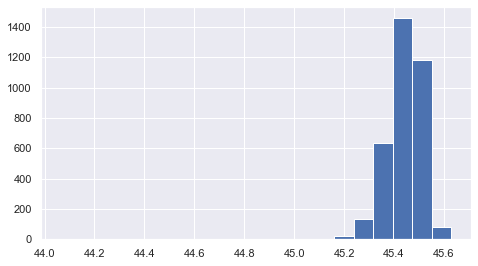

longitude


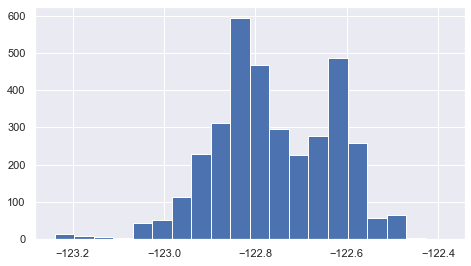

squarefeet


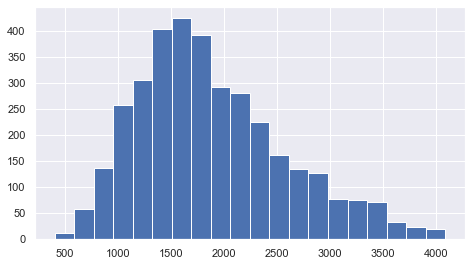

viewcount


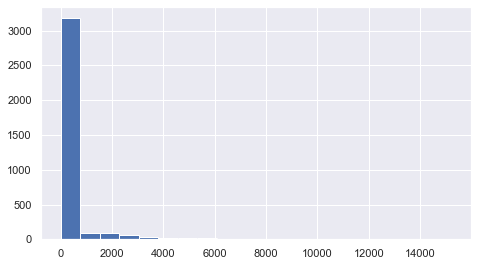

totalfavoritescount


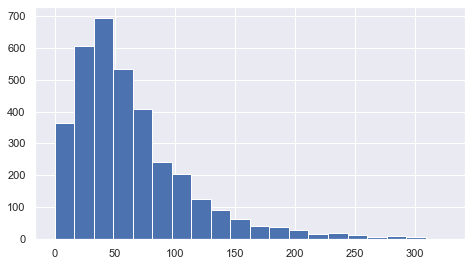

totaltourcount


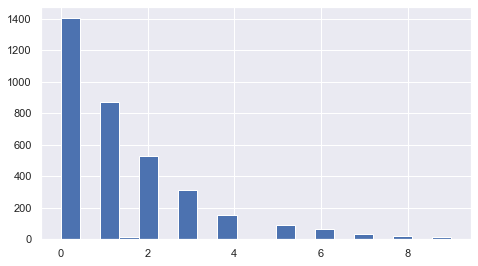

totalamenities


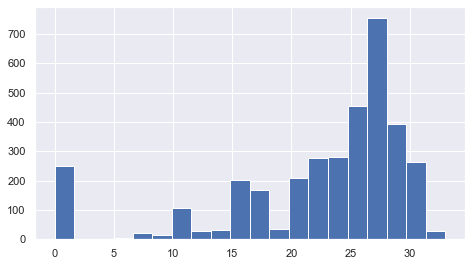

yearbuilt


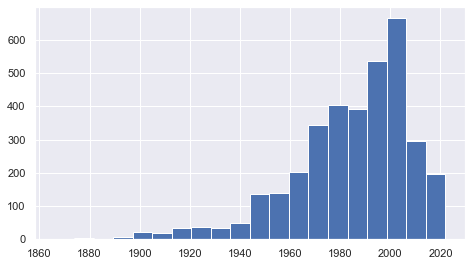

yearrenovated


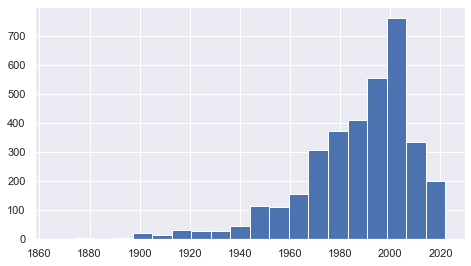

taxesdue


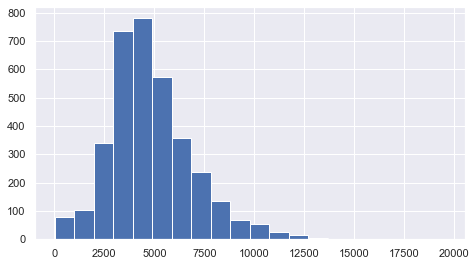

daysonmarket


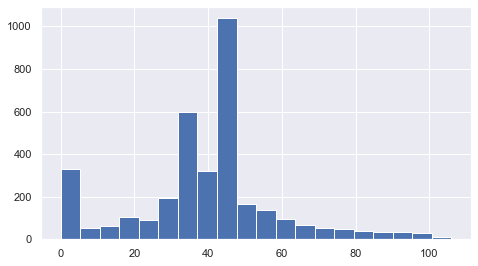

publicstudentteacherratio


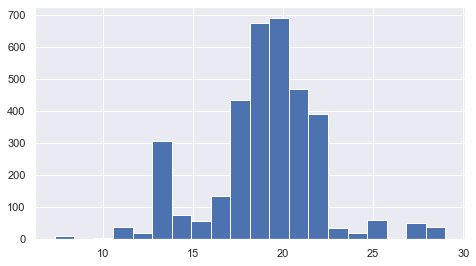

publicschoolrate


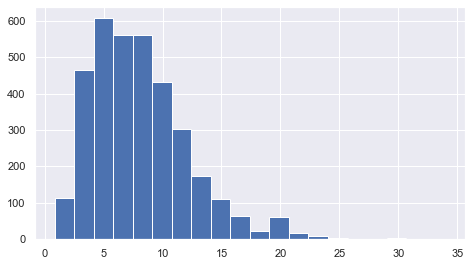

publicstudentcnt


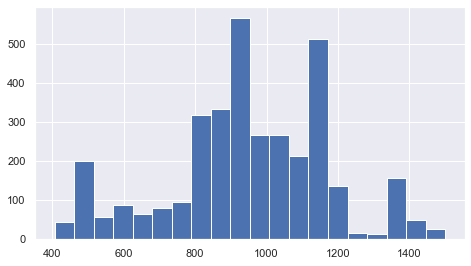

privaterate


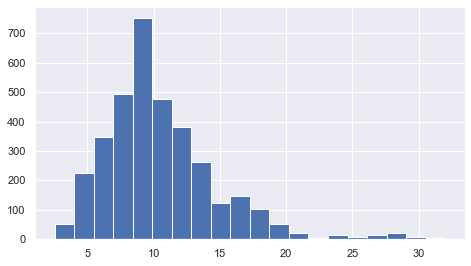

privatestudentcnt


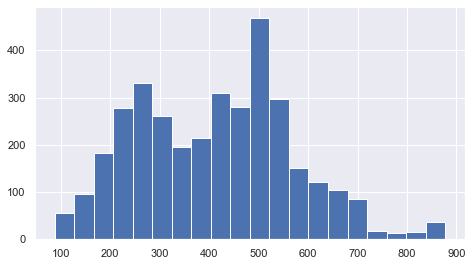

basement_square_feet


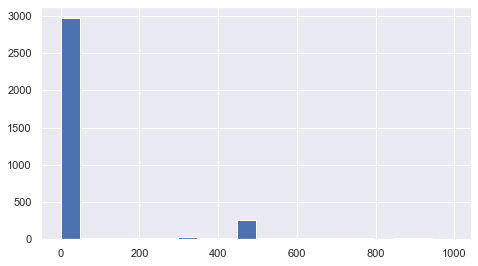

garage_parking_square_feet


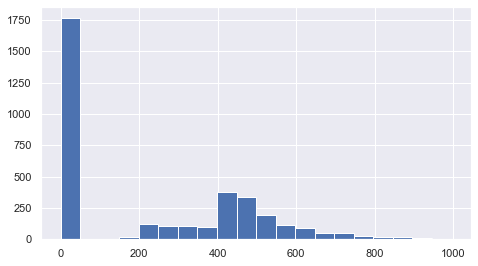

land_square_footage


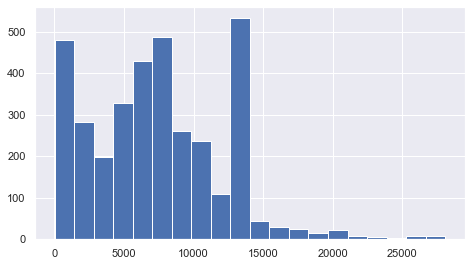

acres


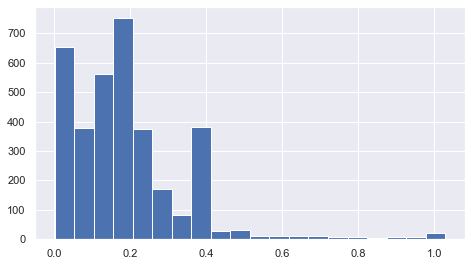

taxrate


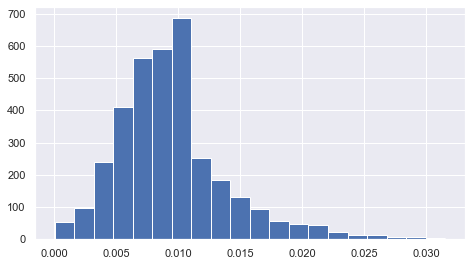

In [78]:
for i in continuous.columns:
    print(i)
    continuous[i].hist(bins=20)
    plt.show()

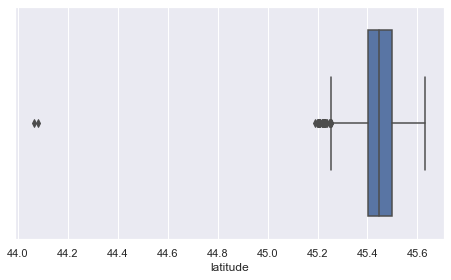

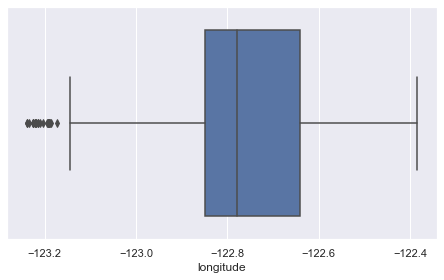

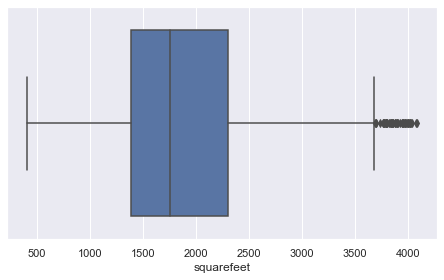

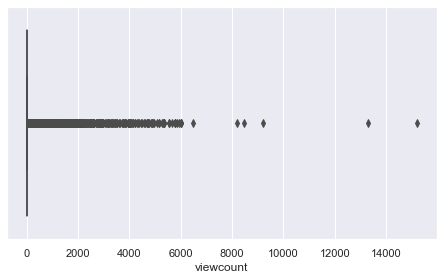

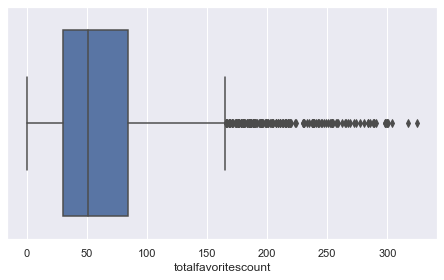

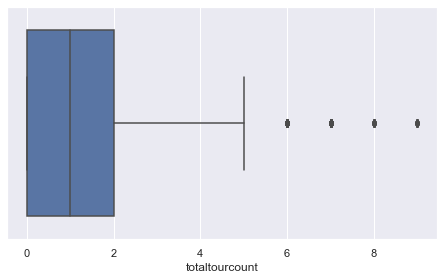

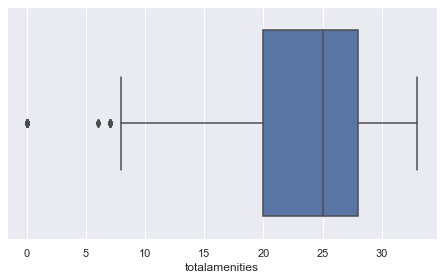

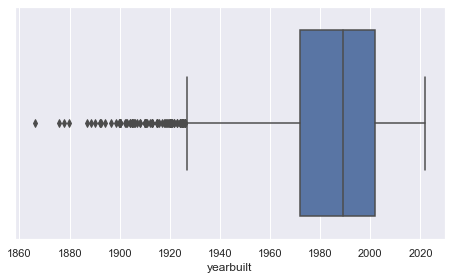

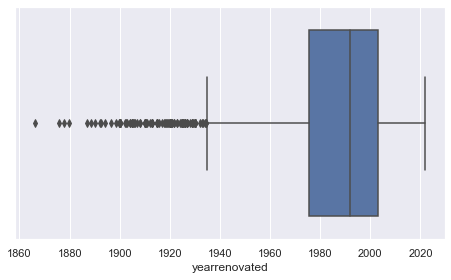

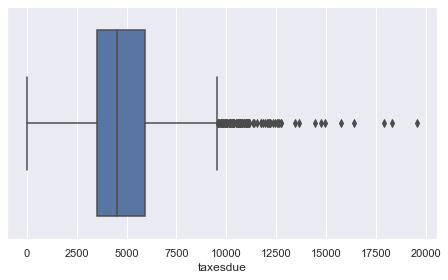

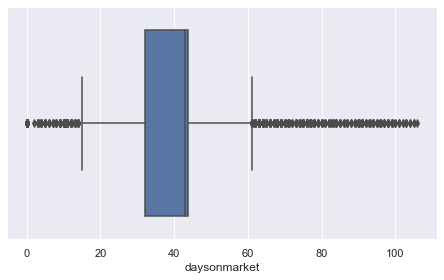

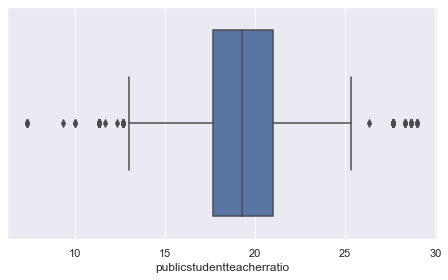

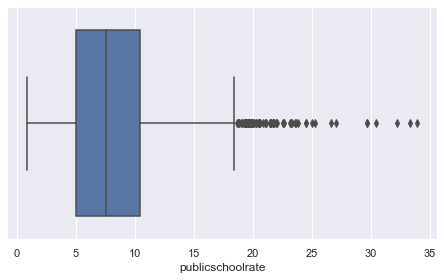

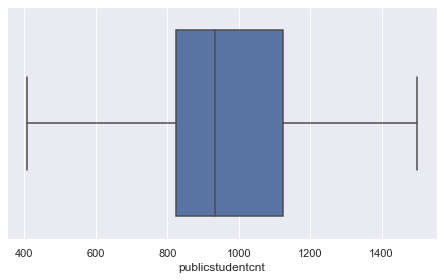

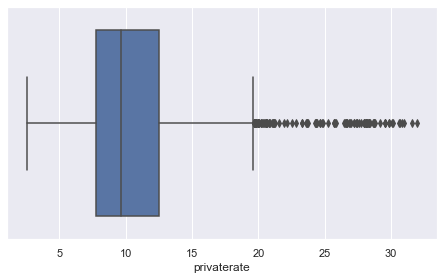

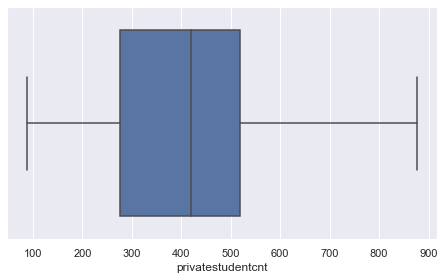

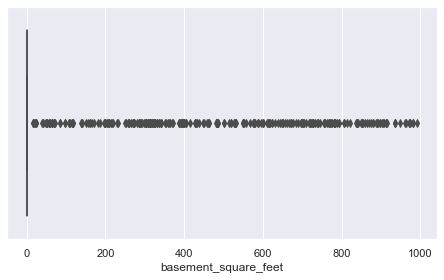

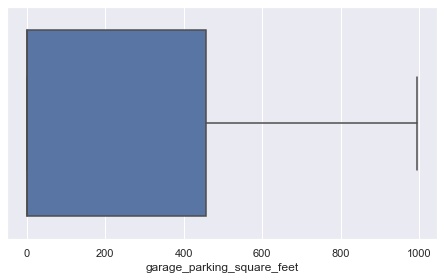

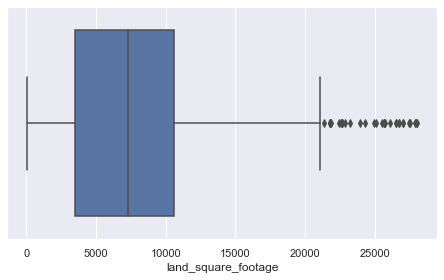

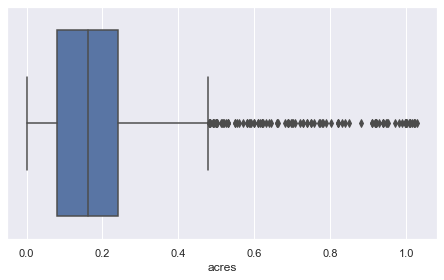

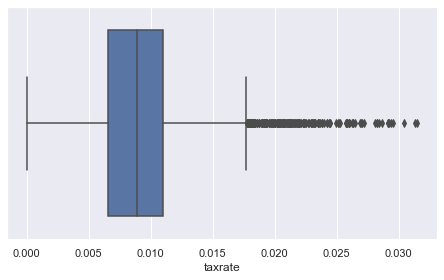

In [79]:
for i in continuous.columns:
    sns.boxplot(continuous[i])
    plt.show()

In [80]:
continuous2=continuous.copy()

# Transformations

### Log

latitude   NormaltestResult(statistic=3007.974638072532, pvalue=0.0)


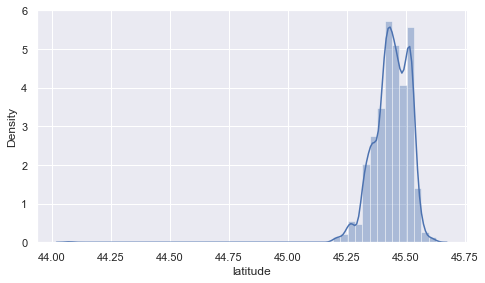

latitude
longitude   NormaltestResult(statistic=21.47157156563684, pvalue=2.1752414767081128e-05)


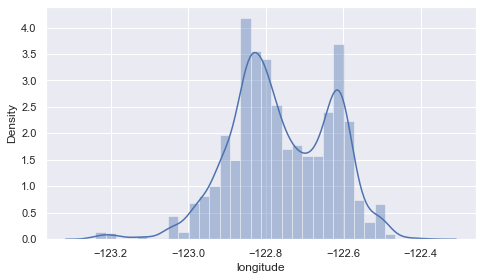

longitude
squarefeet   NormaltestResult(statistic=224.11369679761665, pvalue=2.1593800311898436e-49)


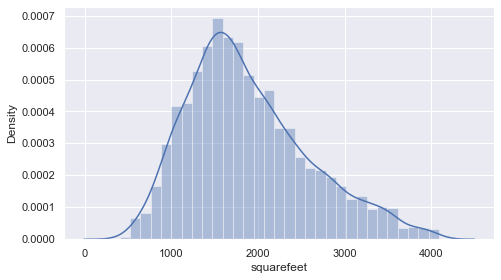

squarefeet
viewcount   NormaltestResult(statistic=3897.4405396690163, pvalue=0.0)


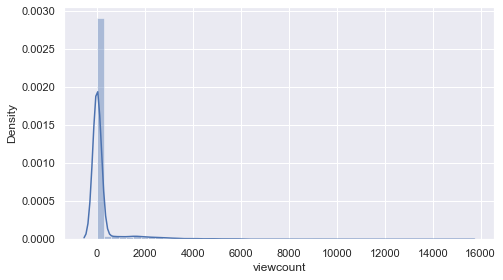

viewcount
totalfavoritescount   NormaltestResult(statistic=1166.3908688238816, pvalue=5.265516326804521e-254)


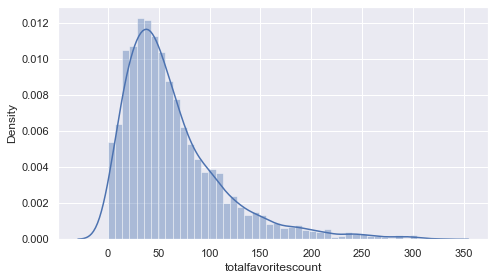

totalfavoritescount
totaltourcount   NormaltestResult(statistic=1092.6311846488445, pvalue=5.472085516210868e-238)


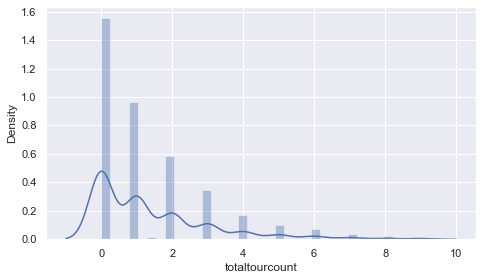

totaltourcount
totalamenities   NormaltestResult(statistic=896.0972465991981, pvalue=2.599891814203099e-195)


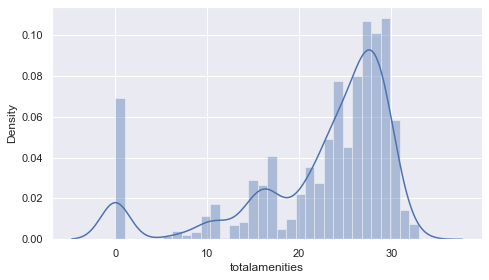

totalamenities
yearbuilt   NormaltestResult(statistic=653.427194404208, pvalue=1.2885093441588906e-142)


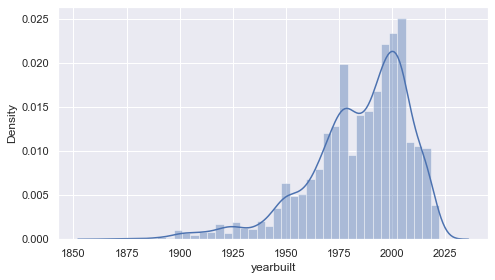

yearbuilt
yearrenovated   NormaltestResult(statistic=825.9987644710983, pvalue=4.331589234284981e-180)


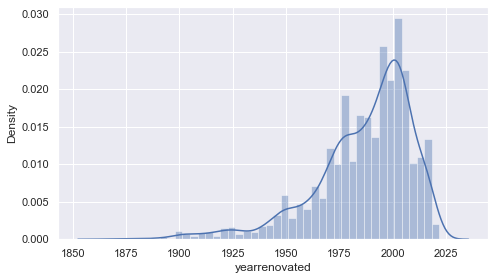

yearrenovated
taxesdue   NormaltestResult(statistic=675.5879981022678, pvalue=1.9857757006556878e-147)


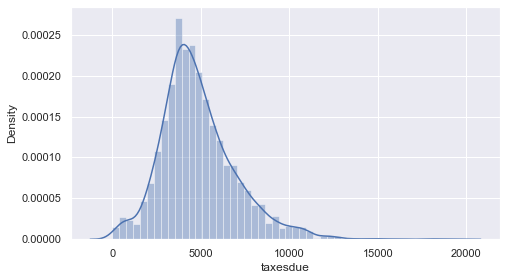

taxesdue
daysonmarket   NormaltestResult(statistic=102.69347757980725, pvalue=5.016429115228283e-23)


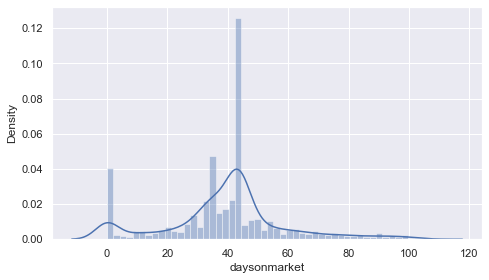

daysonmarket
publicstudentteacherratio   NormaltestResult(statistic=95.28673333012347, pvalue=2.035863977602331e-21)


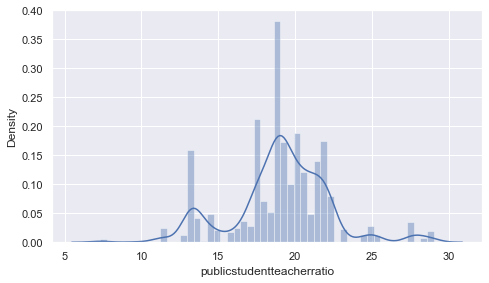

publicstudentteacherratio
publicschoolrate   NormaltestResult(statistic=751.5357773932251, pvalue=6.398518981276999e-164)


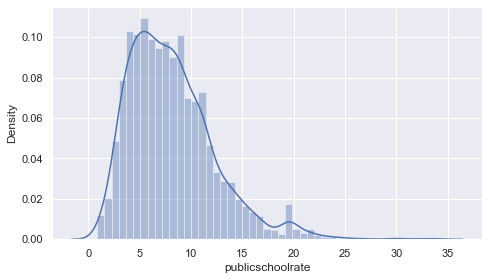

publicschoolrate
publicstudentcnt   NormaltestResult(statistic=34.8302056931469, pvalue=2.7334864911474442e-08)


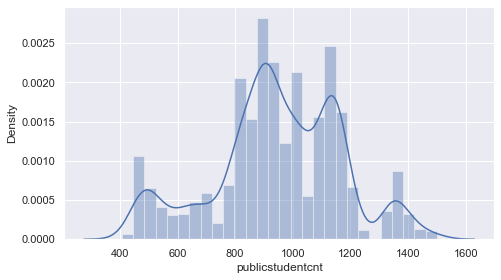

publicstudentcnt
privaterate   NormaltestResult(statistic=972.8141754312827, pvalue=5.702769871039055e-212)


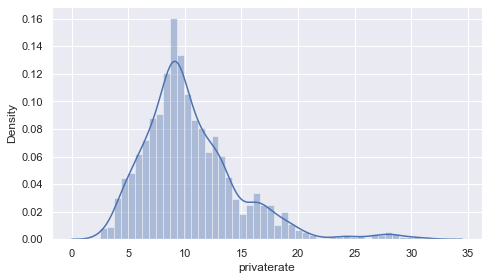

privaterate
privatestudentcnt   NormaltestResult(statistic=68.97517272494309, pvalue=1.0525228877714938e-15)


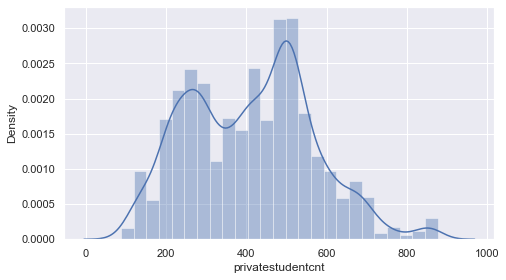

privatestudentcnt
basement_square_feet   NormaltestResult(statistic=1755.726107703015, pvalue=0.0)


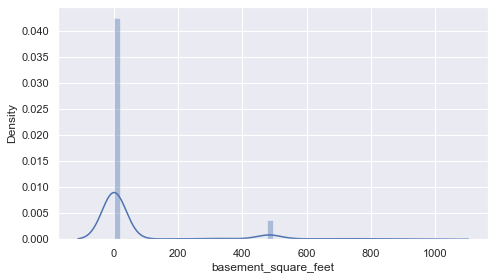

basement_square_feet
garage_parking_square_feet   NormaltestResult(statistic=1365.1789259915918, pvalue=3.5905651856434796e-297)


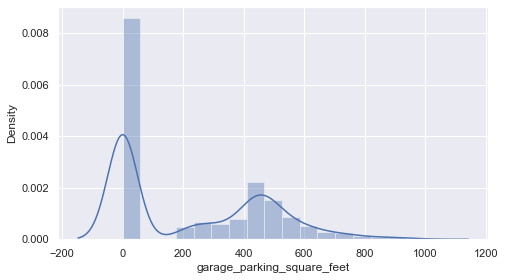

garage_parking_square_feet
land_square_footage   NormaltestResult(statistic=173.56216761656557, pvalue=2.0485858492842402e-38)


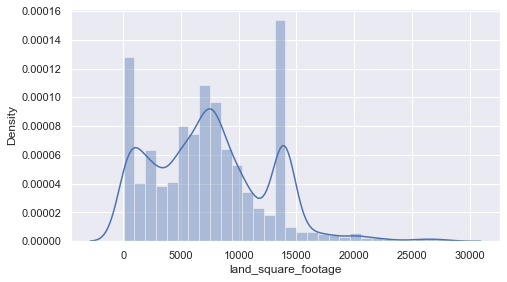

land_square_footage
acres   NormaltestResult(statistic=1537.2815705847793, pvalue=0.0)


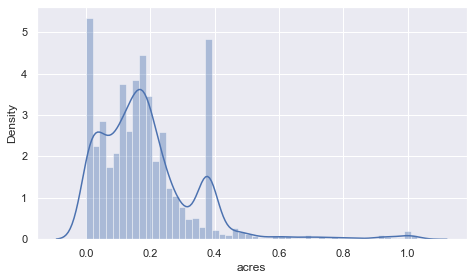

acres
taxrate   NormaltestResult(statistic=698.1845868654866, pvalue=2.46117948959511e-152)


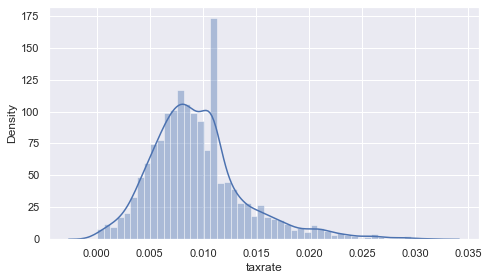

taxrate


In [81]:
for i in continuous.columns:
    sns.distplot(continuous[i])
    print(i, ' ', skimp.normaltest(continuous[i]))
    plt.show()
    print(i)

In [82]:
def log_transfom_clean_(x):
    if np.isfinite(x) and x>0:
        return np.log(x)
    else:
        return np.NAN

In [83]:
for i in continuous.columns:
    continuous2[i]=list(map(log_transfom_clean_, continuous[i]))
    continuous2[i].fillna(continuous2[i].mean(), inplace=True)

latitude   NormaltestResult(statistic=3078.060297123111, pvalue=0.0)
NormaltestResult(statistic=3007.974638072532, pvalue=0.0)


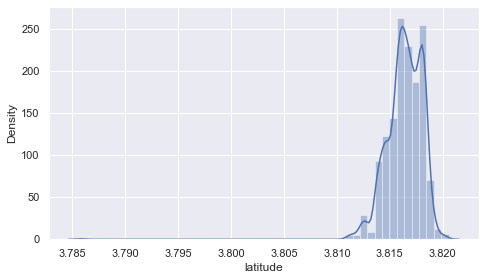

latitude
longitude   NormaltestResult(statistic=nan, pvalue=nan)
NormaltestResult(statistic=21.47157156563684, pvalue=2.1752414767081128e-05)


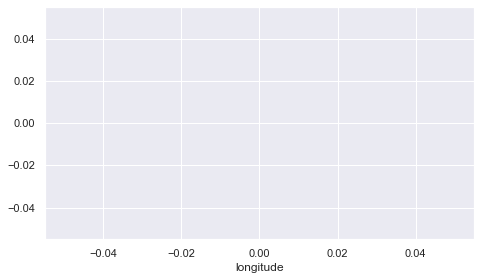

longitude
squarefeet   NormaltestResult(statistic=35.38082449845633, pvalue=2.0756378306719453e-08)
NormaltestResult(statistic=224.11369679761665, pvalue=2.1593800311898436e-49)
log


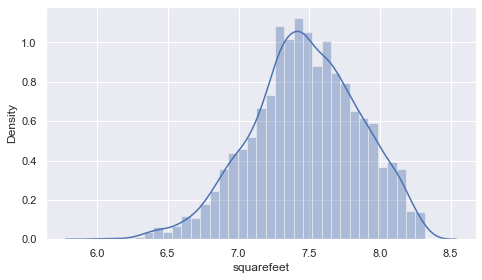

squarefeet
viewcount   NormaltestResult(statistic=907.0525711315403, pvalue=1.0865176376697875e-197)
NormaltestResult(statistic=3897.4405396690163, pvalue=0.0)
log


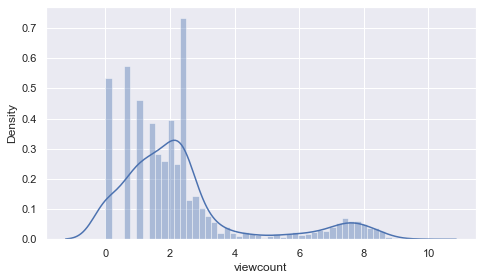

viewcount
totalfavoritescount   NormaltestResult(statistic=611.444626482591, pvalue=1.6845595364166136e-133)
NormaltestResult(statistic=1166.3908688238816, pvalue=5.265516326804521e-254)
log


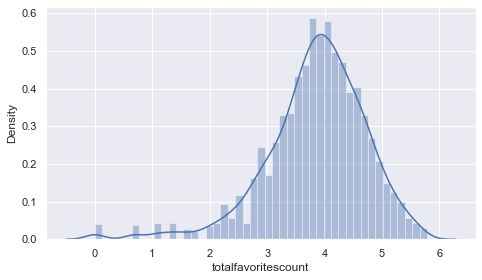

totalfavoritescount
totaltourcount   NormaltestResult(statistic=234.47667699559267, pvalue=1.2134908972253658e-51)
NormaltestResult(statistic=1092.6311846488445, pvalue=5.472085516210868e-238)
log


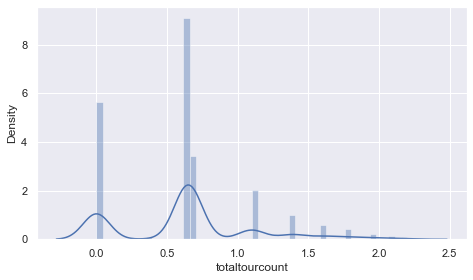

totaltourcount
totalamenities   NormaltestResult(statistic=1283.4513906492737, pvalue=2.0048026374009463e-279)
NormaltestResult(statistic=896.0972465991981, pvalue=2.599891814203099e-195)


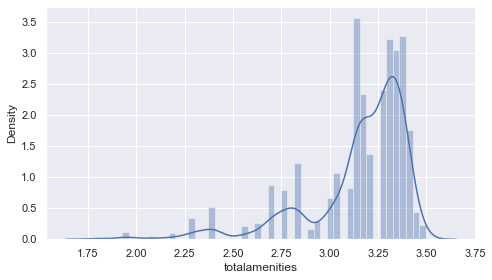

totalamenities
yearbuilt   NormaltestResult(statistic=695.8606468952605, pvalue=7.866479946479046e-152)
NormaltestResult(statistic=653.427194404208, pvalue=1.2885093441588906e-142)


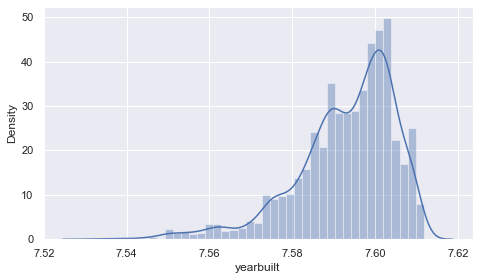

yearbuilt
yearrenovated   NormaltestResult(statistic=870.4437400350575, pvalue=9.672604886715033e-190)
NormaltestResult(statistic=825.9987644710983, pvalue=4.331589234284981e-180)


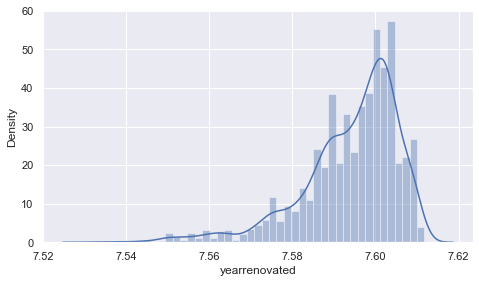

yearrenovated
taxesdue   NormaltestResult(statistic=2763.1683977194407, pvalue=0.0)
NormaltestResult(statistic=675.5879981022678, pvalue=1.9857757006556878e-147)


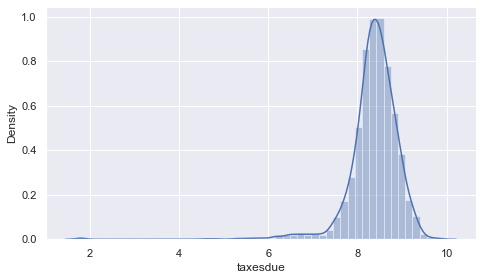

taxesdue
daysonmarket   NormaltestResult(statistic=1485.5721526643956, pvalue=0.0)
NormaltestResult(statistic=102.69347757980725, pvalue=5.016429115228283e-23)


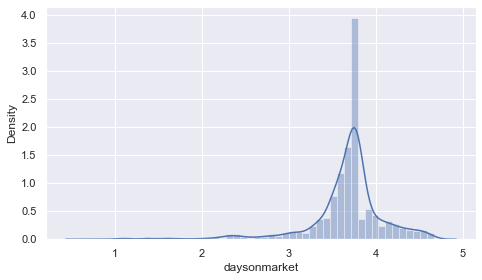

daysonmarket
publicstudentteacherratio   NormaltestResult(statistic=576.0004870761394, pvalue=8.37690219078925e-126)
NormaltestResult(statistic=95.28673333012347, pvalue=2.035863977602331e-21)


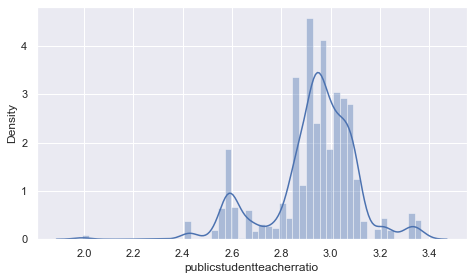

publicstudentteacherratio
publicschoolrate   NormaltestResult(statistic=105.6736697909263, pvalue=1.130457302571997e-23)
NormaltestResult(statistic=751.5357773932251, pvalue=6.398518981276999e-164)
log


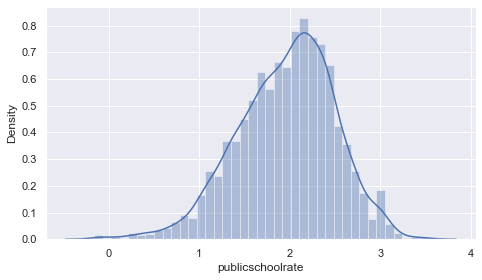

publicschoolrate
publicstudentcnt   NormaltestResult(statistic=427.2072599087564, pvalue=1.7104965253494648e-93)
NormaltestResult(statistic=34.8302056931469, pvalue=2.7334864911474442e-08)


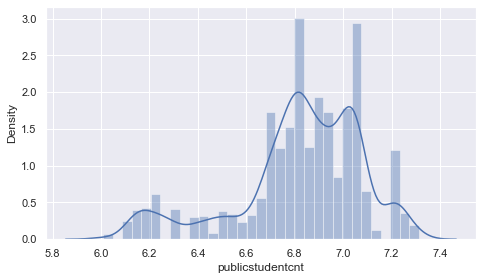

publicstudentcnt
privaterate   NormaltestResult(statistic=23.87761250175848, pvalue=6.531942074329401e-06)
NormaltestResult(statistic=972.8141754312827, pvalue=5.702769871039055e-212)
log


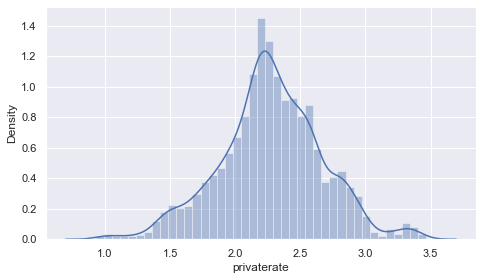

privaterate
privatestudentcnt   NormaltestResult(statistic=205.01602544118435, pvalue=3.0292542409844045e-45)
NormaltestResult(statistic=68.97517272494309, pvalue=1.0525228877714938e-15)


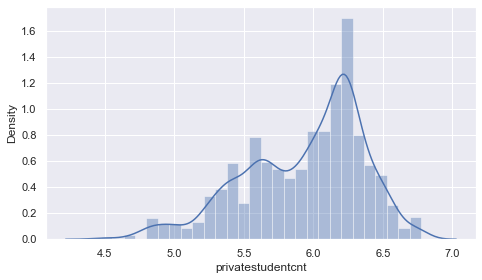

privatestudentcnt
basement_square_feet   NormaltestResult(statistic=3933.154376527282, pvalue=0.0)
NormaltestResult(statistic=1755.726107703015, pvalue=0.0)


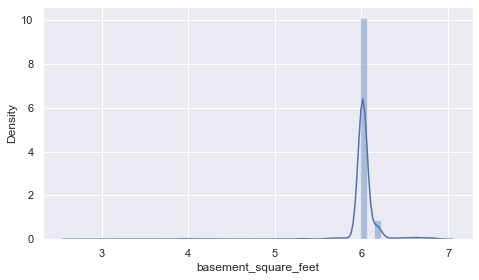

basement_square_feet
garage_parking_square_feet   NormaltestResult(statistic=555.6407693831284, pvalue=2.208716462735082e-121)
NormaltestResult(statistic=1365.1789259915918, pvalue=3.5905651856434796e-297)
log


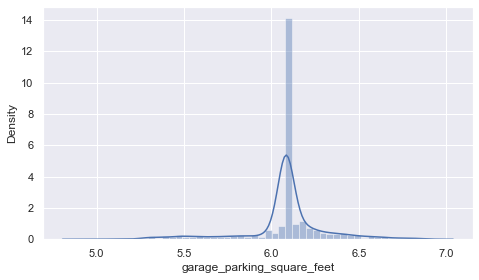

garage_parking_square_feet
land_square_footage   NormaltestResult(statistic=1014.5378097667938, pvalue=4.964937296368648e-221)
NormaltestResult(statistic=173.56216761656557, pvalue=2.0485858492842402e-38)


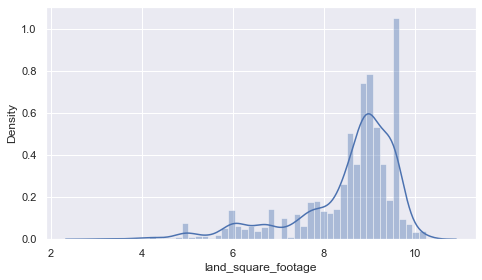

land_square_footage
acres   NormaltestResult(statistic=859.3309317706044, pvalue=2.5041428606468666e-187)
NormaltestResult(statistic=1537.2815705847793, pvalue=0.0)
log


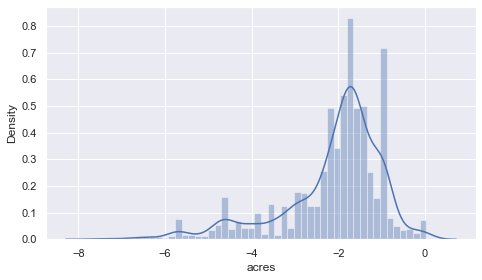

acres
taxrate   NormaltestResult(statistic=2451.532246716369, pvalue=0.0)
NormaltestResult(statistic=698.1845868654866, pvalue=2.46117948959511e-152)


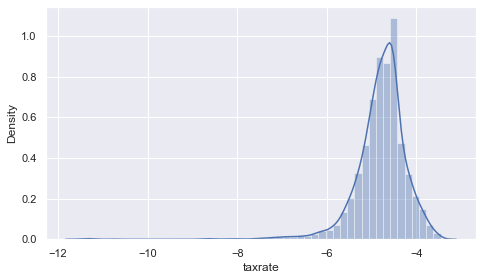

taxrate


In [84]:
continuous3=continuous.copy()
scale={}
for i in continuous.columns:
    sns.distplot(continuous2[i])
    print(i, ' ', skimp.normaltest(continuous2[i]))
    print(skimp.normaltest(continuous3[i]))
    scale[i]='none'
    if float(re.search("e=(.*?)\)",str(skimp.normaltest(continuous2[i]))).group(1))>float(re.search("e=(.*?)\)",str(skimp.normaltest(continuous3[i]))).group(1)):
        continuous3.drop([i], axis=1,inplace=True)
        continuous3[i]=continuous2[i]
        scale[i]='log'
        print('log')
    plt.show()
    print(i)

### Square root

In [85]:
def sqrt_transfom_clean_(x):
    if np.isfinite(x) and x>=0:
        return np.sqrt(x)
    else:
        return np.NAN

In [86]:
for i in continuous.columns:
    continuous2[i]=list(map(sqrt_transfom_clean_, continuous[i]))
    continuous2[i].fillna(continuous2[i].mean(), inplace=True)

latitude   NormaltestResult(statistic=3042.904285897692, pvalue=0.0)
NormaltestResult(statistic=3007.974638072532, pvalue=0.0)


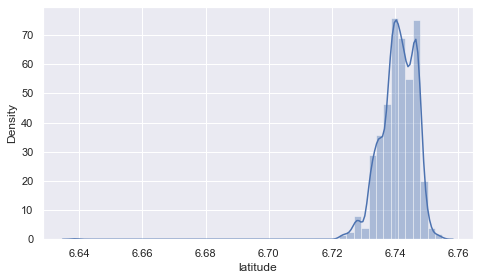

latitude
longitude   NormaltestResult(statistic=nan, pvalue=nan)
NormaltestResult(statistic=21.47157156563684, pvalue=2.1752414767081128e-05)


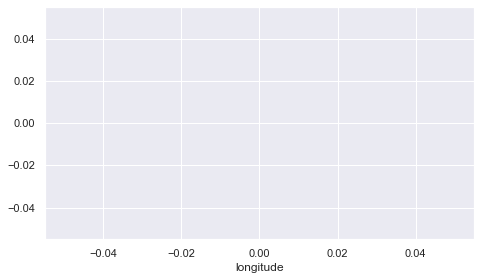

longitude
squarefeet   NormaltestResult(statistic=58.276484727162696, pvalue=2.2152468574396524e-13)
NormaltestResult(statistic=35.38082449845633, pvalue=2.0756378306719453e-08)


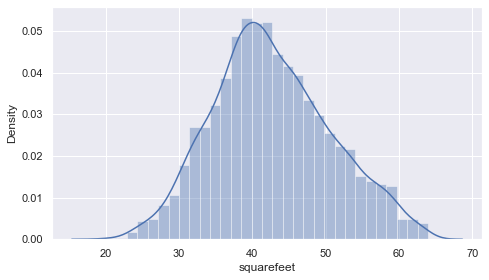

squarefeet
viewcount   NormaltestResult(statistic=2232.2682809007406, pvalue=0.0)
NormaltestResult(statistic=907.0525711315403, pvalue=1.0865176376697875e-197)


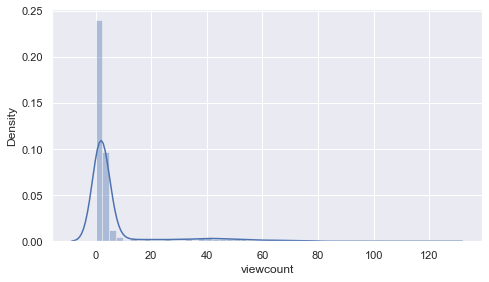

viewcount
totalfavoritescount   NormaltestResult(statistic=158.28871453745742, pvalue=4.246609866125883e-35)
NormaltestResult(statistic=611.444626482591, pvalue=1.6845595364166136e-133)
sqrt


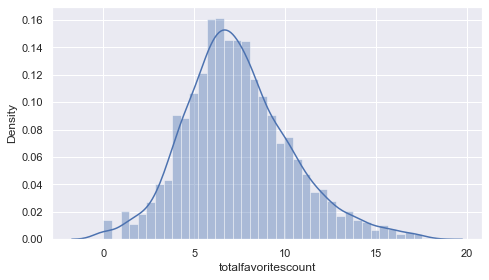

totalfavoritescount
totaltourcount   NormaltestResult(statistic=692.5619379421931, pvalue=4.0934169894509516e-151)
NormaltestResult(statistic=234.47667699559267, pvalue=1.2134908972253658e-51)


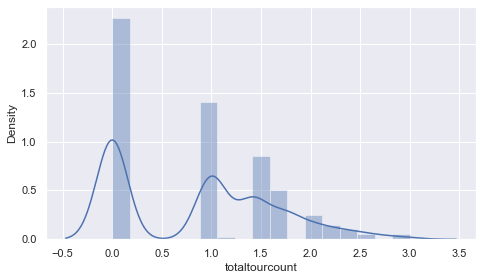

totaltourcount
totalamenities   NormaltestResult(statistic=1719.6881032389817, pvalue=0.0)
NormaltestResult(statistic=896.0972465991981, pvalue=2.599891814203099e-195)


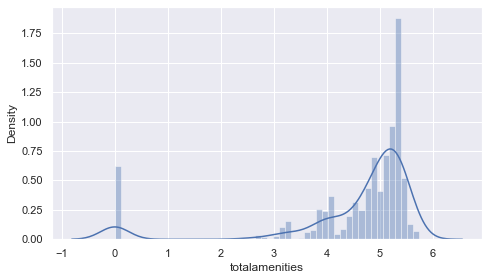

totalamenities
yearbuilt   NormaltestResult(statistic=674.4930437492723, pvalue=3.433179485409618e-147)
NormaltestResult(statistic=653.427194404208, pvalue=1.2885093441588906e-142)


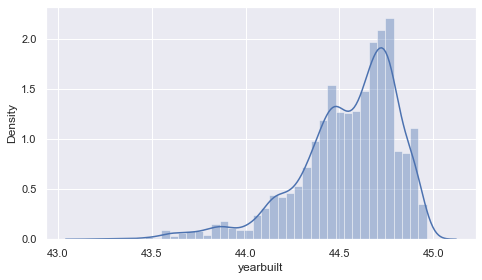

yearbuilt
yearrenovated   NormaltestResult(statistic=848.098182380824, pvalue=6.88366362250251e-185)
NormaltestResult(statistic=825.9987644710983, pvalue=4.331589234284981e-180)


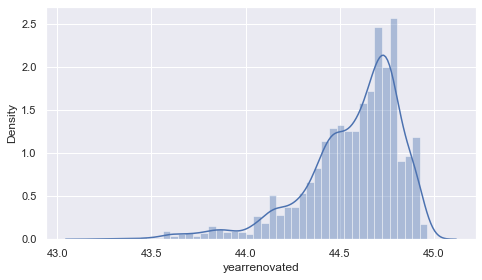

yearrenovated
taxesdue   NormaltestResult(statistic=120.36717554874531, pvalue=7.287858442971815e-27)
NormaltestResult(statistic=675.5879981022678, pvalue=1.9857757006556878e-147)
sqrt


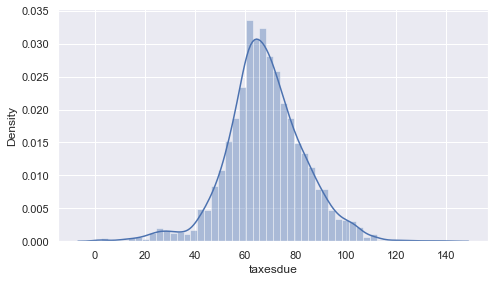

taxesdue
daysonmarket   NormaltestResult(statistic=887.8569407350346, pvalue=1.6007184830102158e-193)
NormaltestResult(statistic=102.69347757980725, pvalue=5.016429115228283e-23)


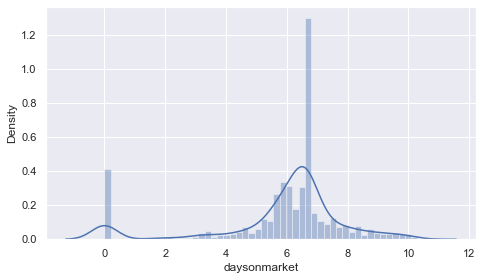

daysonmarket
publicstudentteacherratio   NormaltestResult(statistic=240.4112115785686, pvalue=6.242646052663819e-53)
NormaltestResult(statistic=95.28673333012347, pvalue=2.035863977602331e-21)


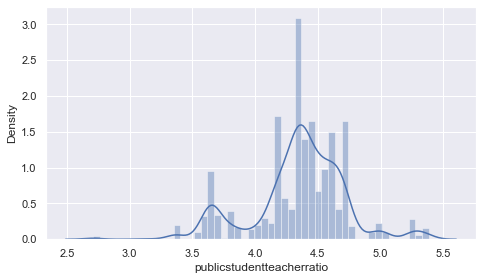

publicstudentteacherratio
publicschoolrate   NormaltestResult(statistic=88.20565717107336, pvalue=7.020772637787773e-20)
NormaltestResult(statistic=105.6736697909263, pvalue=1.130457302571997e-23)
sqrt


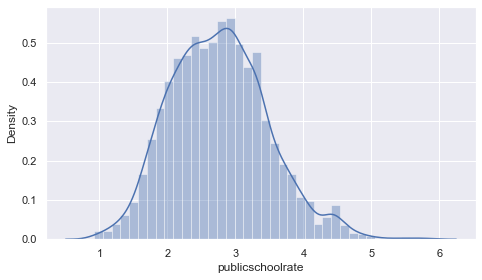

publicschoolrate
publicstudentcnt   NormaltestResult(statistic=184.80397442558692, pvalue=7.418683384275737e-41)
NormaltestResult(statistic=34.8302056931469, pvalue=2.7334864911474442e-08)


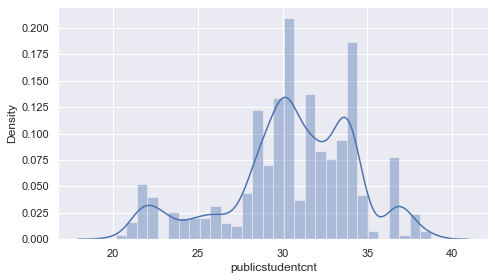

publicstudentcnt
privaterate   NormaltestResult(statistic=286.9840702638933, pvalue=4.8106188105181186e-63)
NormaltestResult(statistic=23.87761250175848, pvalue=6.531942074329401e-06)


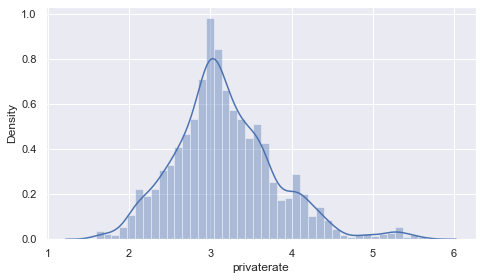

privaterate
privatestudentcnt   NormaltestResult(statistic=124.45969951808094, pvalue=9.4171532936681e-28)
NormaltestResult(statistic=68.97517272494309, pvalue=1.0525228877714938e-15)


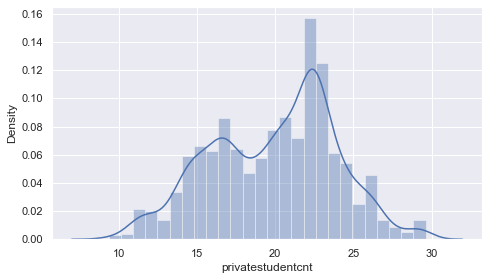

privatestudentcnt
basement_square_feet   NormaltestResult(statistic=1327.7979150054211, pvalue=4.7026885287700505e-289)
NormaltestResult(statistic=1755.726107703015, pvalue=0.0)
sqrt


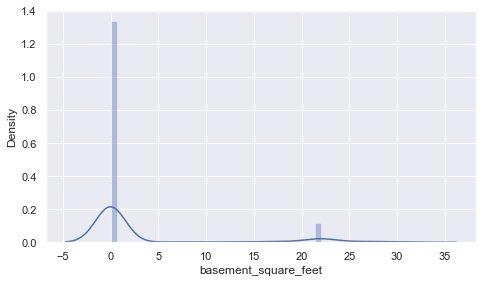

basement_square_feet
garage_parking_square_feet   NormaltestResult(statistic=14147.203696818722, pvalue=0.0)
NormaltestResult(statistic=555.6407693831284, pvalue=2.208716462735082e-121)


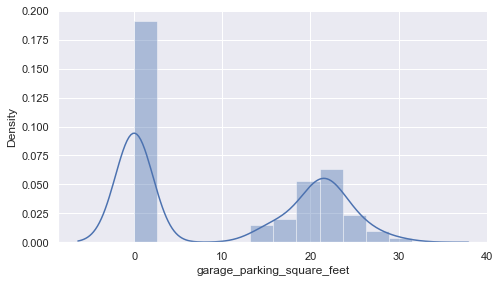

garage_parking_square_feet
land_square_footage   NormaltestResult(statistic=124.39427932518942, pvalue=9.730282612349808e-28)
NormaltestResult(statistic=173.56216761656557, pvalue=2.0485858492842402e-38)
sqrt


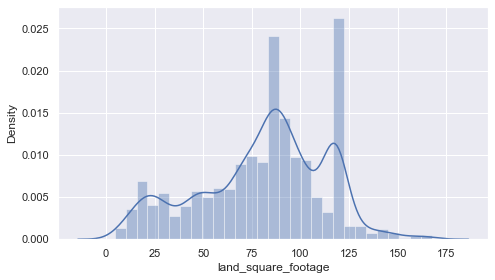

land_square_footage
acres   NormaltestResult(statistic=81.67184857258079, pvalue=1.841549593550827e-18)
NormaltestResult(statistic=859.3309317706044, pvalue=2.5041428606468666e-187)
sqrt


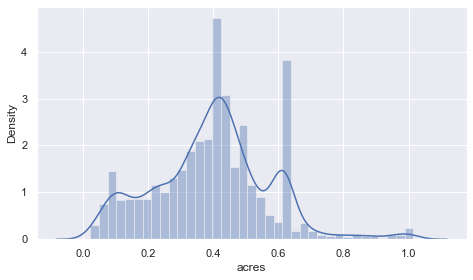

acres
taxrate   NormaltestResult(statistic=85.76184626736938, pvalue=2.3826031088639117e-19)
NormaltestResult(statistic=698.1845868654866, pvalue=2.46117948959511e-152)
sqrt


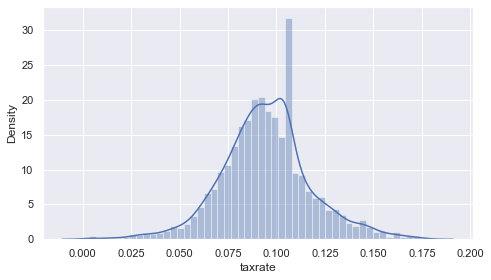

taxrate


In [87]:
for i in continuous.columns:
    sns.distplot(continuous2[i])
    print(i, ' ', skimp.normaltest(continuous2[i]))
    print(skimp.normaltest(continuous3[i]))
    if float(re.search("e=(.*?)\)",str(skimp.normaltest(continuous2[i]))).group(1))>float(re.search("e=(.*?)\)",str(skimp.normaltest(continuous3[i]))).group(1)):
        continuous3.drop([i], axis=1,inplace=True)
        continuous3[i]=continuous2[i]
        scale[i]='sqrt'
        print('sqrt')
    plt.show()
    print(i)

### Square

In [88]:
def sqr_transfom_clean_(x):
    if np.isfinite(x) and x>=0:
        return x**2
    else:
        return np.NAN

In [89]:
for i in continuous.columns:
    continuous2[i]=list(map(sqr_transfom_clean_, continuous[i]))
    continuous2[i].fillna(continuous2[i].mean(), inplace=True)

latitude   NormaltestResult(statistic=2938.7996404436976, pvalue=0.0)
NormaltestResult(statistic=3007.974638072532, pvalue=0.0)


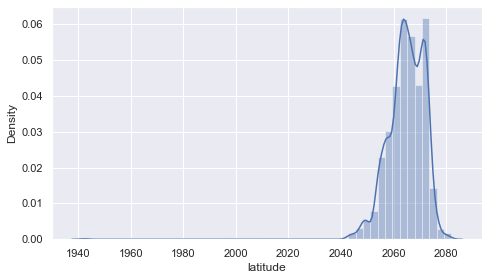

latitude
longitude   NormaltestResult(statistic=nan, pvalue=nan)
NormaltestResult(statistic=21.47157156563684, pvalue=2.1752414767081128e-05)


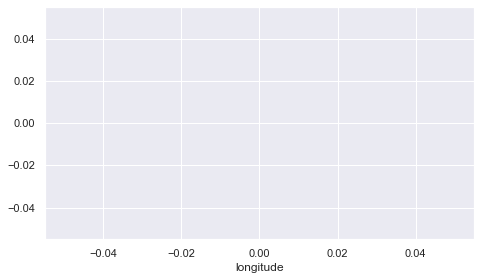

longitude
squarefeet   NormaltestResult(statistic=871.4015620509892, pvalue=5.991768696242138e-190)
NormaltestResult(statistic=35.38082449845633, pvalue=2.0756378306719453e-08)


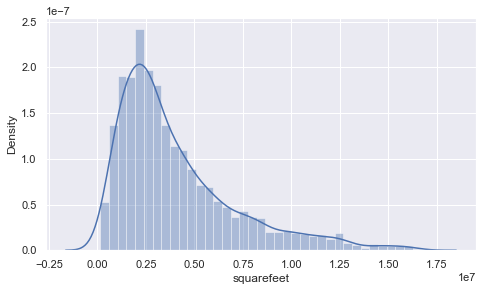

squarefeet
viewcount   NormaltestResult(statistic=8143.212689572005, pvalue=0.0)
NormaltestResult(statistic=907.0525711315403, pvalue=1.0865176376697875e-197)


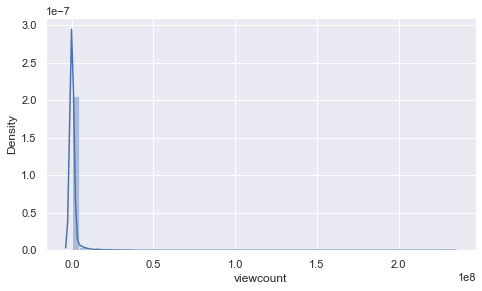

viewcount
totalfavoritescount   NormaltestResult(statistic=2857.079354803995, pvalue=0.0)
NormaltestResult(statistic=158.28871453745742, pvalue=4.246609866125883e-35)


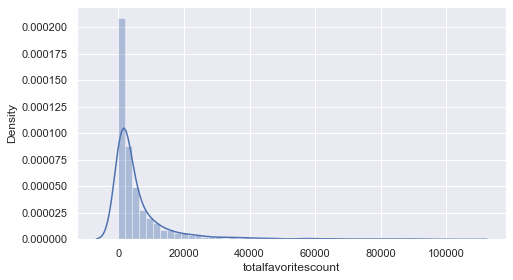

totalfavoritescount
totaltourcount   NormaltestResult(statistic=2887.571766267317, pvalue=0.0)
NormaltestResult(statistic=234.47667699559267, pvalue=1.2134908972253658e-51)


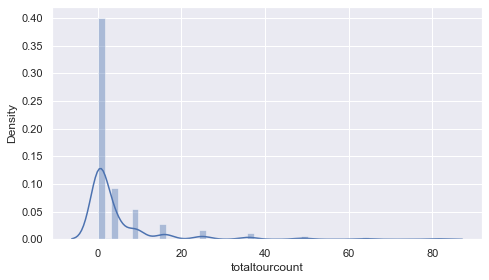

totaltourcount
totalamenities   NormaltestResult(statistic=335.6896638913109, pvalue=1.2761909778821195e-73)
NormaltestResult(statistic=896.0972465991981, pvalue=2.599891814203099e-195)
sqr


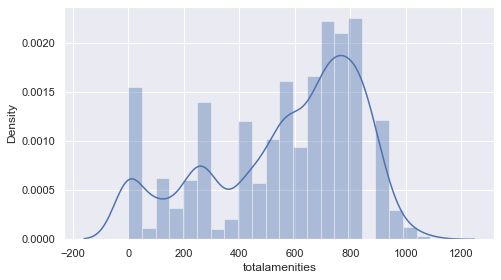

totalamenities
yearbuilt   NormaltestResult(statistic=612.2244663058398, pvalue=1.1406339624955626e-133)
NormaltestResult(statistic=653.427194404208, pvalue=1.2885093441588906e-142)
sqr


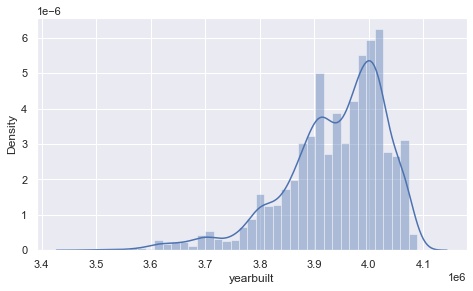

yearbuilt
yearrenovated   NormaltestResult(statistic=782.5552177242897, pvalue=1.1756920428321547e-170)
NormaltestResult(statistic=825.9987644710983, pvalue=4.331589234284981e-180)
sqr


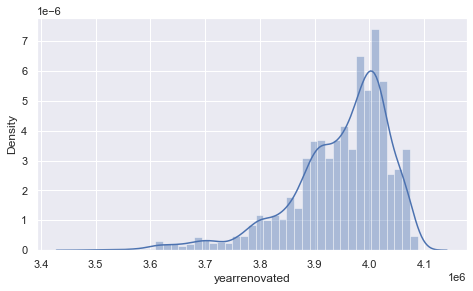

yearrenovated
taxesdue   NormaltestResult(statistic=2780.3383691685117, pvalue=0.0)
NormaltestResult(statistic=120.36717554874531, pvalue=7.287858442971815e-27)


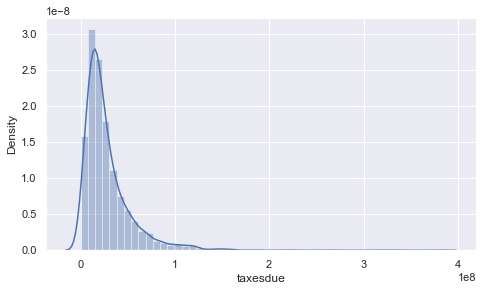

taxesdue
daysonmarket   NormaltestResult(statistic=1672.583737555477, pvalue=0.0)
NormaltestResult(statistic=102.69347757980725, pvalue=5.016429115228283e-23)


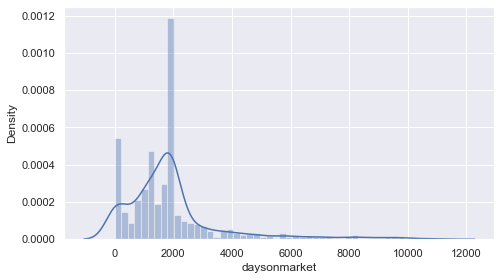

daysonmarket
publicstudentteacherratio   NormaltestResult(statistic=455.7574346502555, pvalue=1.0802655399972394e-99)
NormaltestResult(statistic=95.28673333012347, pvalue=2.035863977602331e-21)


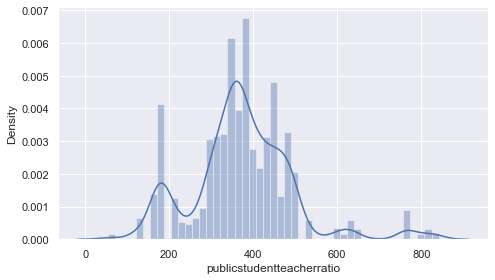

publicstudentteacherratio
publicschoolrate   NormaltestResult(statistic=2711.9010299647025, pvalue=0.0)
NormaltestResult(statistic=88.20565717107336, pvalue=7.020772637787773e-20)


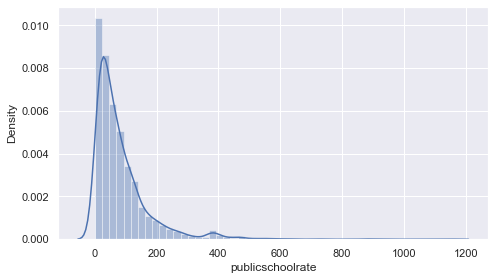

publicschoolrate
publicstudentcnt   NormaltestResult(statistic=104.16480853934112, pvalue=2.4038049293717953e-23)
NormaltestResult(statistic=34.8302056931469, pvalue=2.7334864911474442e-08)


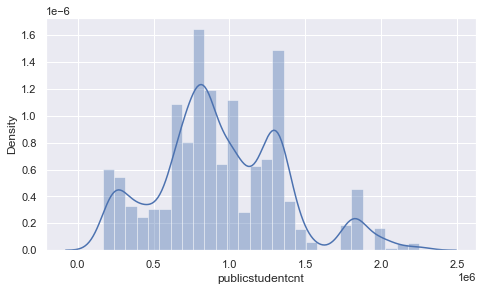

publicstudentcnt
privaterate   NormaltestResult(statistic=2431.689223299659, pvalue=0.0)
NormaltestResult(statistic=23.87761250175848, pvalue=6.531942074329401e-06)


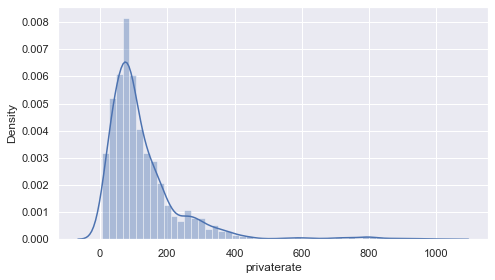

privaterate
privatestudentcnt   NormaltestResult(statistic=658.7912677678969, pvalue=8.816451873752254e-144)
NormaltestResult(statistic=68.97517272494309, pvalue=1.0525228877714938e-15)


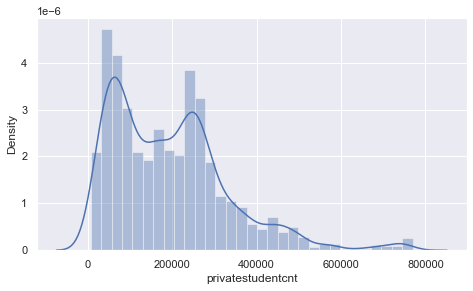

privatestudentcnt
basement_square_feet   NormaltestResult(statistic=2871.4294391676744, pvalue=0.0)
NormaltestResult(statistic=1327.7979150054211, pvalue=4.7026885287700505e-289)


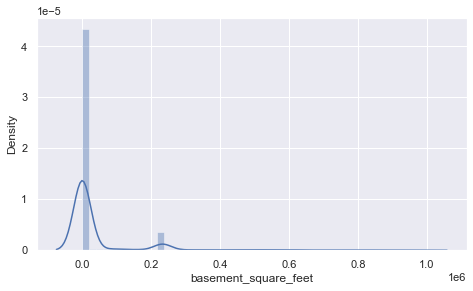

basement_square_feet
garage_parking_square_feet   NormaltestResult(statistic=1171.1543016441296, pvalue=4.864908421026336e-255)
NormaltestResult(statistic=555.6407693831284, pvalue=2.208716462735082e-121)


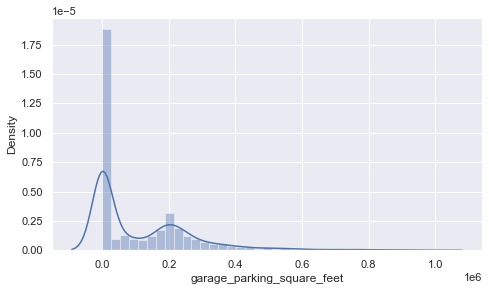

garage_parking_square_feet
land_square_footage   NormaltestResult(statistic=2039.55206592559, pvalue=0.0)
NormaltestResult(statistic=124.39427932518942, pvalue=9.730282612349808e-28)


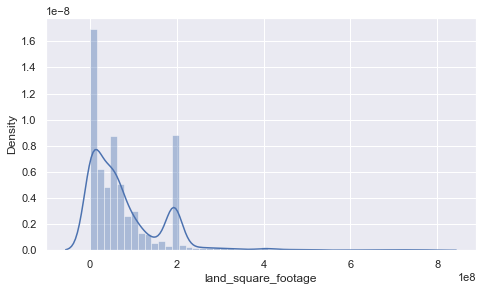

land_square_footage
acres   NormaltestResult(statistic=3687.0488024143215, pvalue=0.0)
NormaltestResult(statistic=81.67184857258079, pvalue=1.841549593550827e-18)


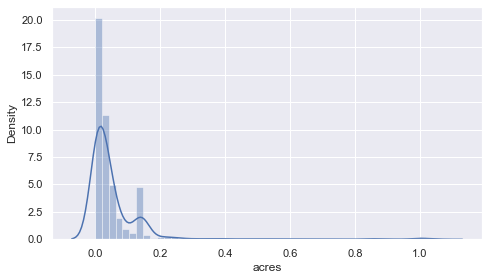

acres
taxrate   NormaltestResult(statistic=2221.1781363130785, pvalue=0.0)
NormaltestResult(statistic=85.76184626736938, pvalue=2.3826031088639117e-19)


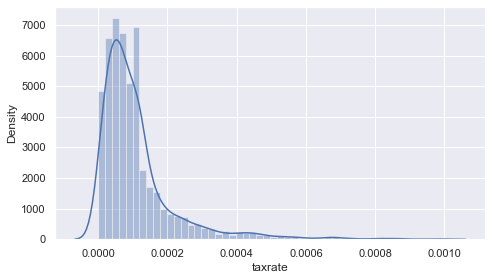

taxrate


In [90]:
for i in continuous.columns:
    sns.distplot(continuous2[i])
    print(i, ' ', skimp.normaltest(continuous2[i]))
    print(skimp.normaltest(continuous3[i]))
    if float(re.search("e=(.*?)\)",str(skimp.normaltest(continuous2[i]))).group(1))>float(re.search("e=(.*?)\)",str(skimp.normaltest(continuous3[i]))).group(1)):
        continuous3.drop([i], axis=1,inplace=True)
        continuous3[i]=continuous2[i]
        scale[i]='sqr'
        print('sqr')
    plt.show()
    print(i)

### Cubed

In [91]:
def cbd_transfom_clean_(x):
    if np.isfinite(x) and x>=0:
        return x**3
    else:
        return np.NAN

In [92]:
for i in continuous.columns:
    continuous2[i]=list(map(cbd_transfom_clean_, continuous[i]))
    continuous2[i].fillna(continuous2[i].mean(), inplace=True)

latitude   NormaltestResult(statistic=2870.5450837289245, pvalue=0.0)
NormaltestResult(statistic=3007.974638072532, pvalue=0.0)


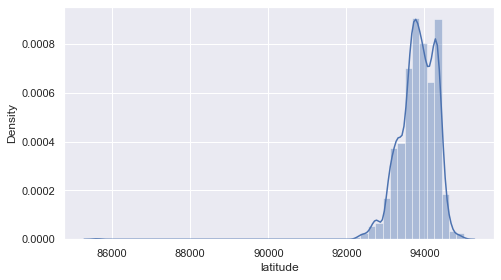

latitude
longitude   NormaltestResult(statistic=nan, pvalue=nan)
NormaltestResult(statistic=21.47157156563684, pvalue=2.1752414767081128e-05)


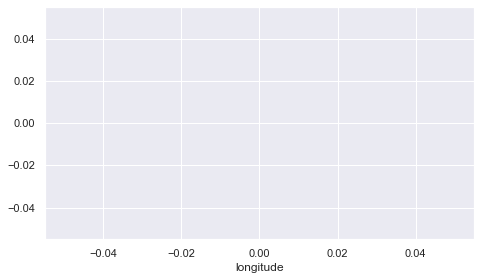

longitude
squarefeet   NormaltestResult(statistic=1553.955270063307, pvalue=0.0)
NormaltestResult(statistic=35.38082449845633, pvalue=2.0756378306719453e-08)


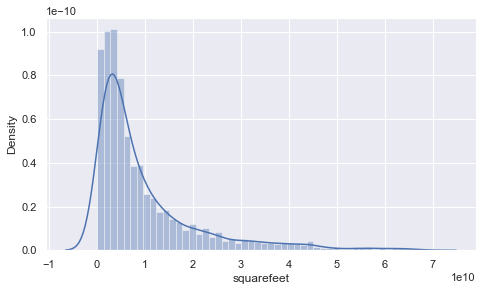

squarefeet
viewcount   NormaltestResult(statistic=10032.890291890413, pvalue=0.0)
NormaltestResult(statistic=907.0525711315403, pvalue=1.0865176376697875e-197)


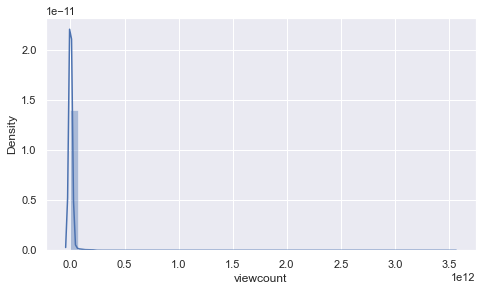

viewcount
totalfavoritescount   NormaltestResult(statistic=3972.5156929098785, pvalue=0.0)
NormaltestResult(statistic=158.28871453745742, pvalue=4.246609866125883e-35)


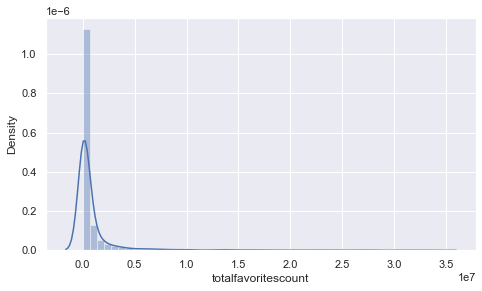

totalfavoritescount
totaltourcount   NormaltestResult(statistic=3927.3754959749285, pvalue=0.0)
NormaltestResult(statistic=234.47667699559267, pvalue=1.2134908972253658e-51)


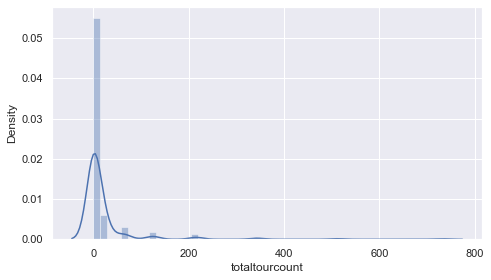

totaltourcount
totalamenities   NormaltestResult(statistic=1000.3657009025793, pvalue=5.93400771149731e-218)
NormaltestResult(statistic=335.6896638913109, pvalue=1.2761909778821195e-73)


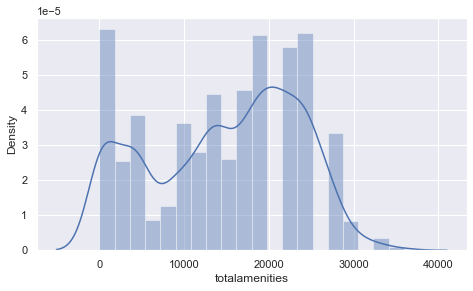

totalamenities
yearbuilt   NormaltestResult(statistic=572.300647701428, pvalue=5.327130756052427e-125)
NormaltestResult(statistic=612.2244663058398, pvalue=1.1406339624955626e-133)
cbd


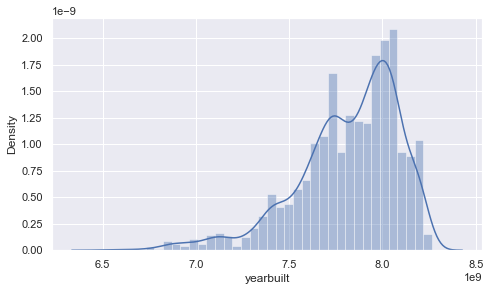

yearbuilt
yearrenovated   NormaltestResult(statistic=740.1475251780766, pvalue=1.9011089674862378e-161)
NormaltestResult(statistic=782.5552177242897, pvalue=1.1756920428321547e-170)
cbd


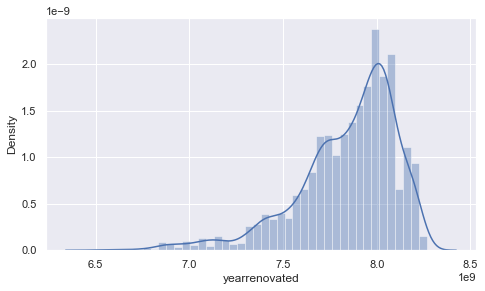

yearrenovated
taxesdue   NormaltestResult(statistic=5034.761436123776, pvalue=0.0)
NormaltestResult(statistic=120.36717554874531, pvalue=7.287858442971815e-27)


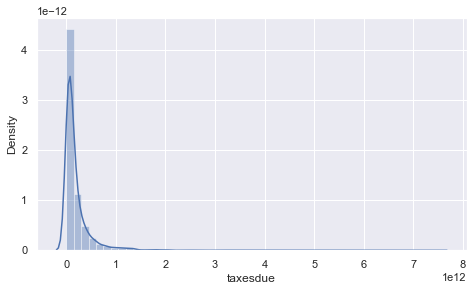

taxesdue
daysonmarket   NormaltestResult(statistic=2537.5236681916276, pvalue=0.0)
NormaltestResult(statistic=102.69347757980725, pvalue=5.016429115228283e-23)


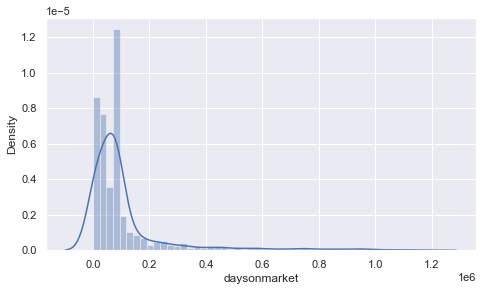

daysonmarket
publicstudentteacherratio   NormaltestResult(statistic=1184.228515648916, pvalue=7.047663673037681e-258)
NormaltestResult(statistic=95.28673333012347, pvalue=2.035863977602331e-21)


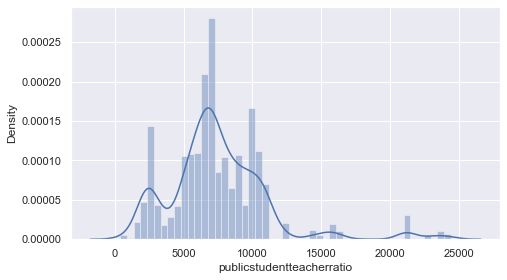

publicstudentteacherratio
publicschoolrate   NormaltestResult(statistic=4675.416387323629, pvalue=0.0)
NormaltestResult(statistic=88.20565717107336, pvalue=7.020772637787773e-20)


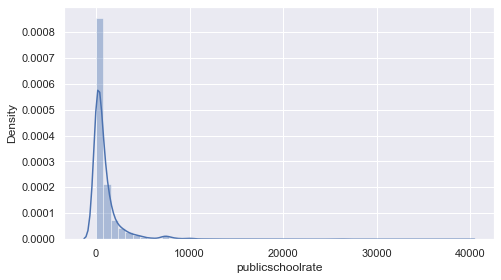

publicschoolrate
publicstudentcnt   NormaltestResult(statistic=542.9105262094046, pvalue=1.2837402259940622e-118)
NormaltestResult(statistic=34.8302056931469, pvalue=2.7334864911474442e-08)


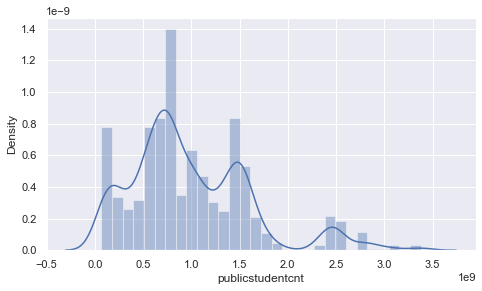

publicstudentcnt
privaterate   NormaltestResult(statistic=3517.9786934825843, pvalue=0.0)
NormaltestResult(statistic=23.87761250175848, pvalue=6.531942074329401e-06)


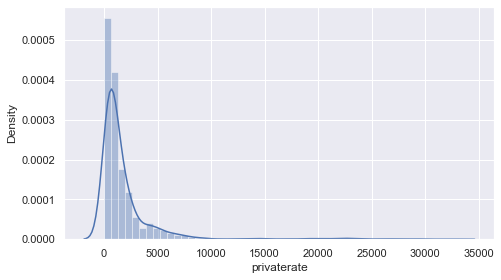

privaterate
privatestudentcnt   NormaltestResult(statistic=1635.0316177251711, pvalue=0.0)
NormaltestResult(statistic=68.97517272494309, pvalue=1.0525228877714938e-15)


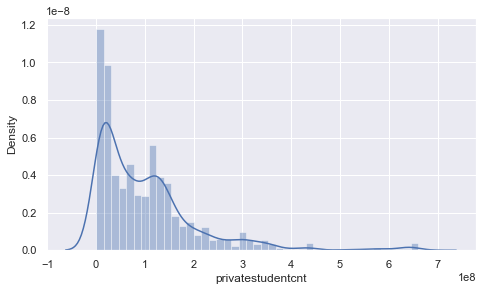

privatestudentcnt
basement_square_feet   NormaltestResult(statistic=3812.0600767090755, pvalue=0.0)
NormaltestResult(statistic=1327.7979150054211, pvalue=4.7026885287700505e-289)


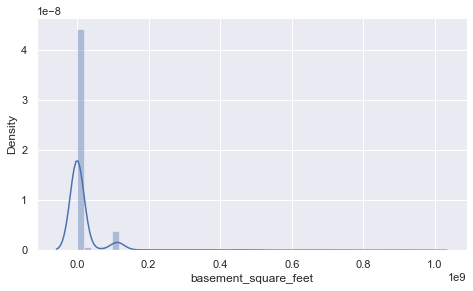

basement_square_feet
garage_parking_square_feet   NormaltestResult(statistic=2509.156884731158, pvalue=0.0)
NormaltestResult(statistic=555.6407693831284, pvalue=2.208716462735082e-121)


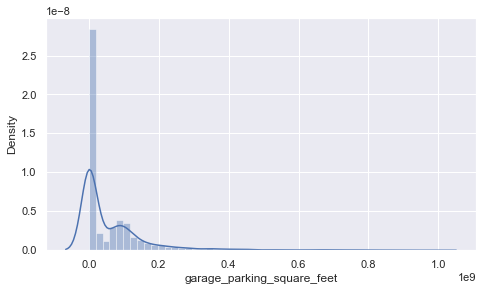

garage_parking_square_feet
land_square_footage   NormaltestResult(statistic=3727.9672280858404, pvalue=0.0)
NormaltestResult(statistic=124.39427932518942, pvalue=9.730282612349808e-28)


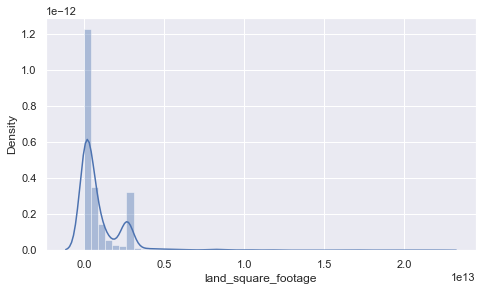

land_square_footage
acres   NormaltestResult(statistic=4531.038648754968, pvalue=0.0)
NormaltestResult(statistic=81.67184857258079, pvalue=1.841549593550827e-18)


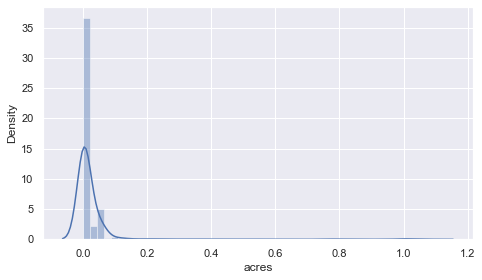

acres
taxrate   NormaltestResult(statistic=3379.8023778140246, pvalue=0.0)
NormaltestResult(statistic=85.76184626736938, pvalue=2.3826031088639117e-19)


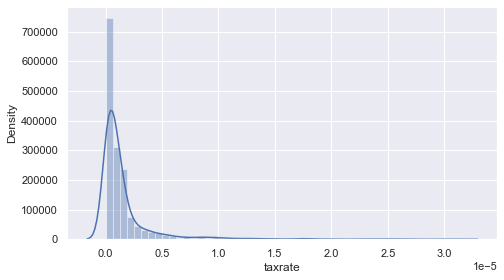

taxrate


In [93]:
for i in continuous.columns:
    sns.distplot(continuous2[i])
    print(i, ' ', skimp.normaltest(continuous2[i]))
    print(skimp.normaltest(continuous3[i]))
    if float(re.search("e=(.*?)\)",str(skimp.normaltest(continuous2[i]))).group(1))>float(re.search("e=(.*?)\)",str(skimp.normaltest(continuous3[i]))).group(1)):
        continuous3.drop([i], axis=1,inplace=True)
        continuous3[i]=continuous2[i]
        scale[i]='cbd'
        print('cbd')
    plt.show()
    print(i)

In [94]:
print(continuous3.columns)
scale

Index(['latitude', 'longitude', 'daysonmarket', 'publicstudentteacherratio',
       'publicstudentcnt', 'privatestudentcnt', 'squarefeet', 'viewcount',
       'totaltourcount', 'privaterate', 'garage_parking_square_feet',
       'totalfavoritescount', 'taxesdue', 'publicschoolrate',
       'basement_square_feet', 'land_square_footage', 'acres', 'taxrate',
       'totalamenities', 'yearbuilt', 'yearrenovated'],
      dtype='object')


{'latitude': 'none',
 'longitude': 'none',
 'squarefeet': 'log',
 'viewcount': 'log',
 'totalfavoritescount': 'sqrt',
 'totaltourcount': 'log',
 'totalamenities': 'sqr',
 'yearbuilt': 'cbd',
 'yearrenovated': 'cbd',
 'taxesdue': 'sqrt',
 'daysonmarket': 'none',
 'publicstudentteacherratio': 'none',
 'publicschoolrate': 'sqrt',
 'publicstudentcnt': 'none',
 'privaterate': 'log',
 'privatestudentcnt': 'none',
 'basement_square_feet': 'sqrt',
 'garage_parking_square_feet': 'log',
 'land_square_footage': 'sqrt',
 'acres': 'sqrt',
 'taxrate': 'sqrt'}

In [95]:
#Seperation for future use
location=[]
location=pd.DataFrame(continuous3['latitude'])
location['longitude']=pd.DataFrame(continuous3['longitude'])
location['yearbuilt']=pd.DataFrame(continuous3['yearbuilt'])
continuous3.drop(['latitude','longitude'],axis=1,inplace=True)
location.head()

latitude   longitude     yearbuilt
0   45.425580 -122.811359  8.000000e+09
1   45.454978 -122.621015  7.245075e+09
3   45.362800 -122.642409  8.024024e+09
8   45.526865 -122.896824  8.157016e+09
11  45.324264 -122.607964  8.123067e+09

# Multicollinearity

### Continuous

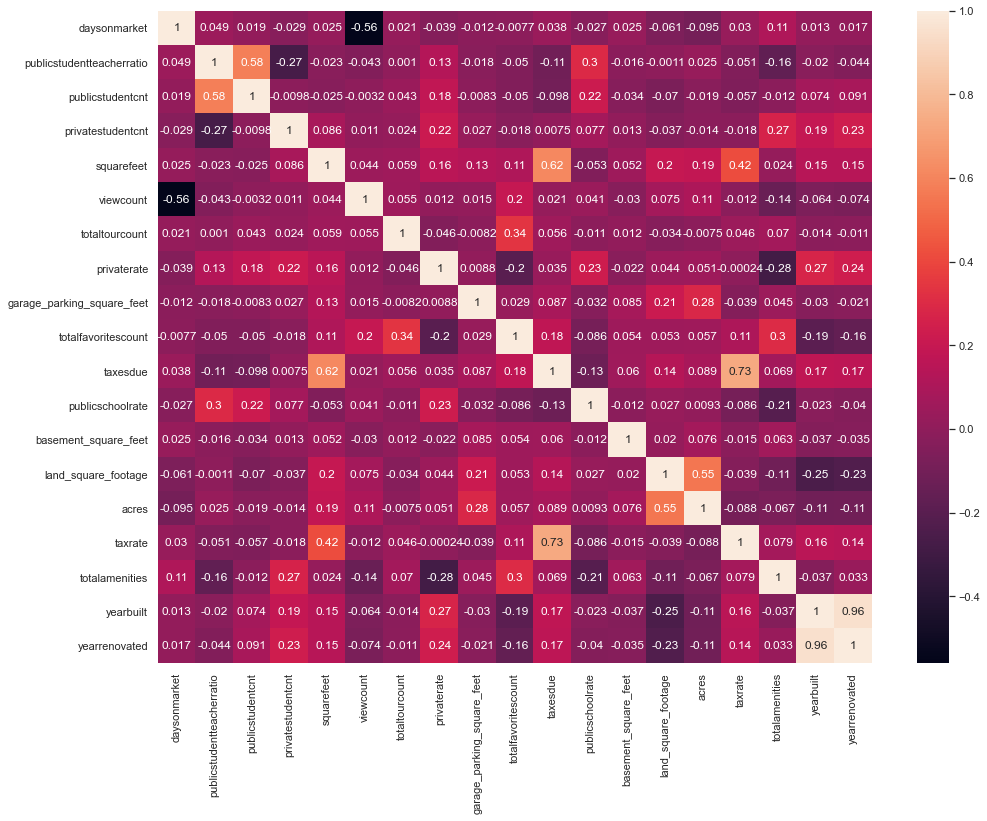

In [96]:
data_corr = continuous3
corr_matrix=data_corr.corr(method='pearson')
fig, ax = plt.subplots(figsize=(16, 12))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [97]:
data_corr.drop(['taxesdue','viewcount'],axis=1,inplace=True)
vif = {}
for i in np.arange(data_corr.shape[1]):
    column_name = data_corr.columns[i]
    value = variance_inflation_factor(np.array(data_corr), i)
    vif[column_name] = value
vif

{'daysonmarket': 5.06042894635397,
 'publicstudentteacherratio': 66.74343867198134,
 'publicstudentcnt': 31.064211571905563,
 'privatestudentcnt': 11.037890205946427,
 'squarefeet': 493.54136510911206,
 'totaltourcount': 3.1196268088808226,
 'privaterate': 47.15525937522369,
 'garage_parking_square_feet': 522.3147638759631,
 'totalfavoritescount': 9.672032350196616,
 'publicschoolrate': 19.074422640057556,
 'basement_square_feet': 1.1990000589981327,
 'land_square_footage': 11.473583069270727,
 'acres': 9.134329358477812,
 'taxrate': 22.476246574494287,
 'totalamenities': 7.861288212195026,
 'yearbuilt': 10660.632037686948,
 'yearrenovated': 10868.680371202794}

In [98]:
#removed vif greater than 500
flag = True
threshold = 500
while flag is True:
    #print(data_corr.head())
    flag = False
    values = [variance_inflation_factor(np.array(data_corr), i) for i in np.arange(data_corr.shape[1])]
    #print(values)
    if max(values)> threshold:
        col_index = values.index(max(values))
        column_name = data_corr.columns[col_index]
        data_corr = data_corr.drop([column_name], axis=1)
        flag = True
vif = {}
for i in np.arange(data_corr.shape[1]):
    column_name = data_corr.columns[i]
    value = variance_inflation_factor(np.array(data_corr), i)
    vif[column_name] = value
continuous3=data_corr
vif

{'daysonmarket': 5.058540366612298,
 'publicstudentteacherratio': 66.1388194756413,
 'publicstudentcnt': 30.633169112481443,
 'privatestudentcnt': 10.818950547662219,
 'squarefeet': 403.5417725742583,
 'totaltourcount': 3.1164885771805126,
 'privaterate': 45.22822596246384,
 'garage_parking_square_feet': 328.59475992038193,
 'totalfavoritescount': 9.540782468365634,
 'publicschoolrate': 19.073724637605622,
 'basement_square_feet': 1.1934993085492336,
 'land_square_footage': 10.731809719129197,
 'acres': 9.019806906746377,
 'taxrate': 22.37194908882286,
 'totalamenities': 7.676683853508841}

In [99]:
#alteritively removed correlations larger than .7
corr_matrix=data_corr.corr(method='pearson')
flag= True
while flag is True:
    flag = False
    for i in range(1, corr_matrix.shape[1]):
        if corr_matrix.iloc[i,range(i)].max() > 0.7:
            print(corr_matrix.columns[corr_matrix.iloc[i,range(i)].argmax()])
            col_name = corr_matrix.columns[corr_matrix.iloc[i,range(i)].argmax()]
            corr_matrix.drop([col_name], axis=1, inplace=True)
            corr_matrix.drop([col_name], inplace=True)
            data_corr.drop([col_name], axis=1, inplace=True)
            print(col_name)
            display(corr_matrix)
            flag = True
            break

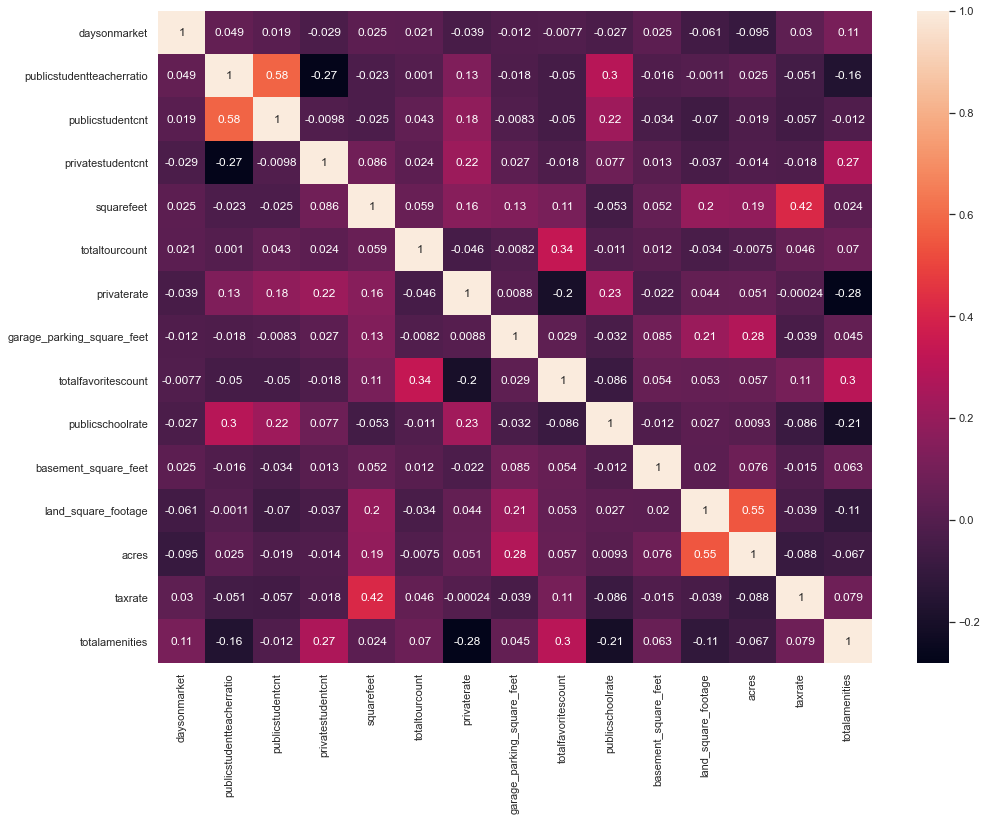

In [100]:
corr_matrix=data_corr.corr(method='pearson')
fig, ax = plt.subplots(figsize=(16, 12))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

### Categorical

In [101]:
f=pd.DataFrame(obs['sale_ind'])
f.columns=['sale_ind']
f['sale_ind'].value_counts()

Sold        3040
for sale     474
Name: sale_ind, dtype: int64

In [102]:
obs2=obs.copy()
ilist=[]
jlist=[]
plist=[]
obslist=[]
for i in obs2.columns:
        obslist.append(i)
        for j in obs2.columns:
            if j in obslist:
                continue
            else:
                confusion_matrix = pd.crosstab(obs2[i], obs2[j])
                chi2 = chi2_contingency(confusion_matrix)[0]
                n = confusion_matrix.sum().sum()
                phi2 = chi2/n
                r,k = confusion_matrix.shape
                phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
                rcorr = r-((r-1)**2)/(n-1)
                kcorr = k-((k-1)**2)/(n-1)
                p=np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
                if p >.6:
                    ilist.append(i)
                    jlist.append(j)
                    plist.append(p)

#Print correlation values above .6
df=[]
df=pd.DataFrame(ilist)
df['jlist']=pd.DataFrame(jlist)
df['plist']=pd.DataFrame(plist)

#Print categoricals with high variance to be dropped
df2=[]
df2=pd.DataFrame(ilist)
df2=pd.DataFrame(pd.DataFrame(np.concatenate((pd.DataFrame(ilist), pd.DataFrame(jlist)), axis=0)).value_counts())
df2.columns=['values']
df

0                       jlist     plist
0          propertytype            propertytypename  0.647291
1          searchstatus            eventdescription  0.721855
2          searchstatus                   sale_year  0.693847
3          searchstatus                    sale_ind  0.960453
4      eventdescription                   sale_year  0.721448
5      eventdescription                    sale_ind  0.998637
6       foundation_code               assessed_year  0.925005
7         assessed_year                parking_type  0.775078
8         assessed_year  exterior_wall_code_cleaned  0.674051
9         assessed_year             roof_type_clean  0.768889
10            sale_year                    sale_ind  0.721537
11  bath_fixtures_clean             roof_type_clean  0.696133

In [103]:
df2

values
0                                 
assessed_year                    4
eventdescription                 3
sale_ind                         3
sale_year                        3
searchstatus                     3
roof_type_clean                  2
bath_fixtures_clean              1
exterior_wall_code_cleaned       1
foundation_code                  1
parking_type                     1
propertytype                     1
propertytypename                 1

In [104]:
obs2=obs.copy()
dropped=[]
flag = True
while flag == True:
    ilist=[]
    jlist=[]
    plist=[]
    obslist=[]
    for i in obs2.columns:
        obslist.append(i)
        for j in obs2.columns:
            if j in obslist:
                continue
            else:
                confusion_matrix = pd.crosstab(obs2[i], obs2[j])
                chi2 = chi2_contingency(confusion_matrix)[0]
                n = confusion_matrix.sum().sum()
                phi2 = chi2/n
                r,k = confusion_matrix.shape
                phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
                rcorr = r-((r-1)**2)/(n-1)
                kcorr = k-((k-1)**2)/(n-1)
                p=np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
                if p >.6:
                    ilist.append(i)
                    jlist.append(j)
                    plist.append(p)
    df=[]
    df=pd.DataFrame(ilist)
    df=pd.DataFrame(pd.DataFrame(np.concatenate((pd.DataFrame(ilist), pd.DataFrame(jlist)), axis=0)).value_counts())
    df.columns=['values']
    if len(df)>1:
        drop_val=df.reset_index().iloc[0][0]
        dropped.append(drop_val)
        obs2.drop([drop_val], axis=1,inplace=True)
    else:
        flag= False


In [105]:
obs2.drop(['half_baths'],axis=1,inplace=True)
obs2.drop(['searchstatus'],axis=1,inplace=True)
obs2['sale_ind']=f['sale_ind']
#High correlation categoricals
dropped

['assessed_year',
 'eventdescription',
 'sale_ind',
 'bath_fixtures_clean',
 'propertytype',
 'sale_year']

In [106]:
location.drop(['yearbuilt'],axis=1,inplace=True)

# Scaling

In [107]:
# Min max scaler
transformer = MinMaxScaler().fit(continuous3)
x_min_max = transformer.transform(continuous3)
x_min_max

transformer = MinMaxScaler().fit(location)
loc_min_max = transformer.transform(location)
loc_min_max

array([[0.8697273 , 0.50055903],
       [0.88851878, 0.72323993],
       [0.82959747, 0.69821237],
       ...,
       [0.7447797 , 0.05915217],
       [0.72654933, 0.02787705],
       [0.7259284 , 0.05457486]])

In [108]:
# Normalization

transformer = Normalizer().fit(continuous3)
x_normalized = transformer.transform(continuous3)
x_normalized

transformer = Normalizer().fit(location)
loc_normalized = transformer.transform(location)
loc_normalized

array([[ 0.34691066, -0.93789818],
       [ 0.34758188, -0.93764963],
       [ 0.34690872, -0.9378989 ],
       ...,
       [ 0.34466391, -0.93872615],
       [ 0.3444065 , -0.93882062],
       [ 0.34445621, -0.93880239]])

In [109]:
# Standardization/Standard Scaler

transformer = StandardScaler().fit(continuous3)
x_standardized = transformer.transform(continuous3)
x_standardized

transformer = StandardScaler().fit(location)
loc_standardized = transformer.transform(location)
loc_standardized

array([[-0.19541146, -0.38833213],
       [ 0.18146868,  1.06626921],
       [-1.0002518 ,  0.90278364],
       ...,
       [-2.70134942, -3.27170033],
       [-3.06697616, -3.47599634],
       [-3.07942952, -3.30160032]])

In [110]:
#Selecting Scaling Method
num = pd.DataFrame(x_min_max)
num.columns=continuous3.columns

loc = pd.DataFrame(loc_standardized)
loc.columns=location.columns
loc.columns

Index(['latitude', 'longitude'], dtype='object')

# Location Clusters

64
0.16


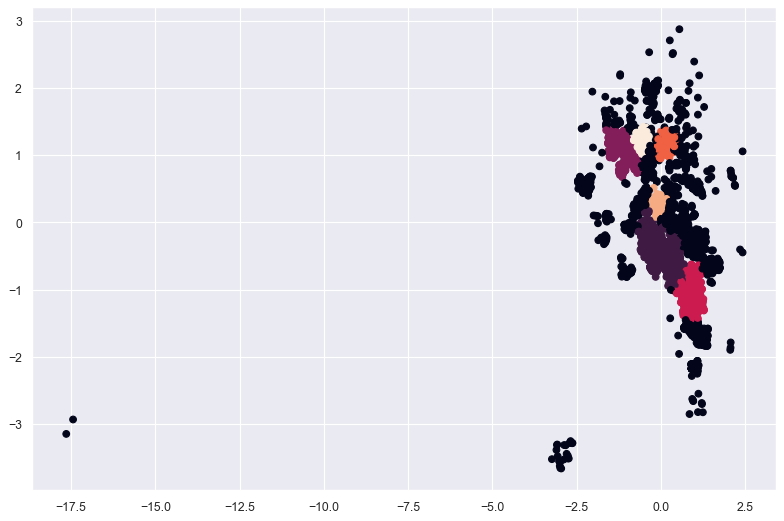

In [111]:
#DBScan
optimal_eps=0
optimal_samp=0
minr=4000
for i in range(15,17,1): 
    b=i/100
    for s in range(64,66,1):
        dbscan = DBSCAN(eps=b, min_samples=s).fit(loc)
        location2=loc.copy()
        location2['location']=pd.DataFrame(dbscan.labels_)
        df=pd.DataFrame(location2['location'].value_counts())
        l=len(df)
        rng=df['location'].max()-df['location'].min()
        m=df['location'].median()
        if (l >6) and (l<9):
            if rng<minr:
                minr=rng
                optimal_samp=s
                optimal_eps=b
print(optimal_samp)
print(optimal_eps)
dbscan = DBSCAN(eps=optimal_eps, min_samples=optimal_samp).fit(loc)
dbscan.labels_
plt.figure(figsize=(12, 8), dpi=80)
plt.scatter(loc['latitude'], loc['longitude'], c=dbscan.labels_)

In [112]:
location2=loc.copy()
location2['location']=pd.DataFrame(dbscan.labels_)
df=pd.DataFrame(location2['location'].value_counts())
df

location
-1      1328
 0       908
 2       461
 1       434
 3       160
 4       118
 5       105

In [113]:
print(df['location'].max()-df['location'].min())
print(df['location'].median())

1223
434.0


In [114]:
#Adding clusters to dataset
obs2['location']=pd.DataFrame(dbscan.labels_)
obs2['location']=obs2['location'].astype(str)

# Encode Categoricals

In [115]:
for i in obs2.columns:
    obs2[i]= obs2[i].astype(str)
obs2.head()

beds2 baths2           propertytypename heating_type_code  \
0   2.0      2            Townhouse&Other                 1   
1   4.0      2  Single Family Residential                 3   
2   3.0      2  Single Family Residential                 0   
3   2.0      2         Condo&Manufactured                 1   
4   4.0      2  Single Family Residential                 3   

  fireplace_type_code     foundation_code parking_type building_quality_code  \
0             Gas/Log  Continuous Footing     Finished                     0   
1       Brick&Opening            Concrete        other                     0   
2               Other             unknown        other                     0   
3               Other  Continuous Footing     Finished                     0   
4               Other             unknown        other                     3   

  pool_indicator exterior_wall_code_cleaned roof_type_clean  \
0              0                          2               2   
1              0                          3               3   
2              0                          1               1   
3              0                          2               2   
4              0                          3               3   

  number_of_fireplaces  sale_ind location  
0                  1.0  for sale        0  
1                  1.0  for sale        3  
2                  0.0  for sale        1  
3                  0.0  for sale        2  
4                  0.0  for sale        1

In [116]:
encoder= OneHotEncoder(handle_unknown='ignore').fit(obs2)
encoded=encoder.transform(obs2).toarray()

In [117]:
encoded=pd.DataFrame(encoded)
encoded.columns=encoder.get_feature_names()
encoded.columns

Index(['x0_1.0', 'x0_2.0', 'x0_3.0', 'x0_4.0', 'x0_5.0', 'x0_6.0', 'x0_Other',
       'x1_1', 'x1_2', 'x1_3', 'x1_4', 'x1_5', 'x1_Other',
       'x2_Condo&Manufactured', 'x2_Multi-Family',
       'x2_Single Family Residential', 'x2_Townhouse&Other', 'x3_0', 'x3_1',
       'x3_2', 'x3_3', 'x4_Brick&Opening', 'x4_Gas/Log', 'x4_Other',
       'x4_Prefab', 'x5_Concrete', 'x5_Continuous Footing', 'x5_other',
       'x5_unknown', 'x6_Detached', 'x6_Finished', 'x6_Unfinished', 'x6_other',
       'x7_0', 'x7_1', 'x7_2', 'x7_3', 'x8_0', 'x8_Has Pool', 'x9_0', 'x9_1',
       'x9_2', 'x9_3', 'x9_4', 'x10_0', 'x10_1', 'x10_2', 'x10_3', 'x11_0.0',
       'x11_1.0', 'x11_2.0', 'x11_3.0', 'x11_4.0', 'x12_Sold', 'x12_for sale',
       'x13_-1', 'x13_0', 'x13_1', 'x13_2', 'x13_3', 'x13_4', 'x13_5'],
      dtype='object')

In [118]:
y=pd.DataFrame(y).reset_index()
y.columns=['index','price']

In [119]:
encoded_df = pd.DataFrame(encoded)
scaled_df = pd.DataFrame(num)
x = pd.concat([scaled_df, encoded_df,y], axis=1).reset_index().set_index('index')
n=x.shape[1]
x.head(100)

level_0  daysonmarket  publicstudentteacherratio  publicstudentcnt  \
index                                                                       
0            0      0.094340                   0.461538          0.616369   
1            1      0.000000                   0.676923          0.252096   
3            2      0.094340                   0.646154          0.527968   
8            3      0.094340                   0.584615          0.481634   
11           4      0.000000                   0.692308          0.685261   
13           5      0.132075                   0.646154          0.527968   
14           6      0.122642                   0.446154          0.427984   
15           7      0.622642                   0.276923          0.094803   
16           8      0.103774                   0.723077          0.663009   
17           9      0.103774                   0.661538          0.466087   
18          10      0.000000                   0.523077          0.616369   
20          11      0.000000                   0.476923          0.360311   
21          12      0.103774                   0.523077          0.453285   
22          13      0.000000                   0.676923          0.252096   
23          14      0.000000                   0.584615          0.868465   
25          15      0.000000                   0.276923          0.094803   
26          16      0.000000                   0.676923          0.228014   
27          17      0.000000                   0.676923          0.252096   
28          18      0.000000                   0.538462          0.673983   
29          19      0.113208                   0.492308          0.588325   
30          20      0.000000                   0.523077          0.673678   
31          21      0.103774                   0.600000          0.566377   
33          22      0.000000                   0.692308          0.685261   
34          23      0.103774                   0.276923          0.094803   
35          24      0.000000                   0.523077          0.673678   
36          25      0.000000                   0.523077          0.673678   
37          26      0.000000                   0.630769          0.553574   
38          27      0.160377                   0.692308          0.685261   
39          28      0.264151                   0.538462          0.674592   
40          29      0.084906                   0.538462          0.674592   
41          30      0.000000                   0.476923          0.360311   
42          31      0.207547                   0.646154          0.527968   
43          32      0.000000                   0.538462          0.542600   
44          33      0.000000                   0.276923          0.094803   
45          34      0.000000                   0.492308          0.588325   
47          35      0.000000                   0.507692          0.330437   
48          36      0.000000                   0.661538          0.919677   
49          37      0.000000                   0.600000          0.566377   
50          38      0.000000                   0.676923          0.252096   
51          39      0.000000                   0.676923          0.252096   
54          40      0.000000                   0.353846          0.422801   
55          41      0.000000                   0.261538          0.045725   
56          42      0.000000                   0.661538          0.477671   
57          43      0.179245                   0.646154          0.568816   
58          44      0.122642                   0.615385          0.680689   
59          45      0.094340                   0.338462          0.328304   
61          46      0.000000                   0.523077          0.453285   
62          47      0.000000                   0.461538          0.616369   
64          48      0.000000                   0.292308          0.124676   
65          49      0.000000                   0.461538          0.616369   
66 

In [120]:
x.to_excel("/Users/kb/Ironhack/Labs/Home-Buying/x.xlsx", index = False)

In [121]:
#seperate unsold houses from sold houses
untimate_use=x[x['x12_Sold']==0]
untimate_y=untimate_use['price']
untimate_use.drop(['price','level_0','x12_Sold','x12_for sale'],axis=1,inplace=True)
x=x[x['x12_Sold']!=0]
y=x['price']
x.drop(['price','level_0','x12_Sold','x12_for sale'],axis=1,inplace=True)

# Feature Selection

In [122]:
lm = linear_model.LinearRegression()
rfe = RFE(lm, n_features_to_select=n, verbose=False)
rfe.fit(x, y)

RFE(estimator=LinearRegression(), n_features_to_select=79, verbose=False)

In [123]:
df = pd.DataFrame(data = rfe.ranking_, columns=['Rank'])
df['Column_name'] = x.columns
df[df['Rank']==1]

Rank                   Column_name
0      1                  daysonmarket
1      1     publicstudentteacherratio
2      1              publicstudentcnt
3      1             privatestudentcnt
4      1                    squarefeet
5      1                totaltourcount
6      1                   privaterate
7      1    garage_parking_square_feet
8      1           totalfavoritescount
9      1              publicschoolrate
10     1          basement_square_feet
11     1           land_square_footage
12     1                         acres
13     1                       taxrate
14     1                totalamenities
15     1                        x0_1.0
16     1                        x0_2.0
17     1                        x0_3.0
18     1                        x0_4.0
19     1                        x0_5.0
20     1                        x0_6.0
21     1                      x0_Other
22     1                          x1_1
23     1                          x1_2
24     1                          x1_3
25     1                          x1_4
26     1                          x1_5
27     1                      x1_Other
28     1         x2_Condo&Manufactured
29     1               x2_Multi-Family
30     1  x2_Single Family Residential
31     1            x2_Townhouse&Other
32     1                          x3_0
33     1                          x3_1
34     1                          x3_2
35     1                          x3_3
36     1              x4_Brick&Opening
37     1                    x4_Gas/Log
38     1                      x4_Other
39     1                     x4_Prefab
40     1                   x5_Concrete
41     1         x5_Continuous Footing
42     1                      x5_other
43     1                    x5_unknown
44     1                   x6_Detached
45     1                   x6_Finished
46     1                 x6_Unfinished
47     1                      x6_other
48     1                          x7_0
49     1                          x7_1
50     1                          x7_2
51     1                          x7_3
52     1                          x8_0
53     1                   x8_Has Pool
54     1                          x9_0
55     1                          x9_1
56     1                          x9_2
57     1                          x9_3
58     1                          x9_4
59     1                         x10_0
60     1                         x10_1
61     1                         x10_2
62     1                         x10_3
63     1                       x11_0.0
64     1                       x11_1.0
65     1                       x11_2.0
66     1                       x11_3.0
67     1                       x11_4.0
68     1                        x13_-1
69     1                         x13_0
70     1                         x13_1
71     1                         x13_2
72     1                         x13_3
73     1                         x13_4
74     1                         x13_5

In [124]:
excl=pd.DataFrame(df[df['Rank']!=1])
excl=pd.DataFrame(excl.value_counts())
drop_col=list(excl.reset_index()['Column_name'])

In [125]:
all_col_x=x.copy()
x.drop(drop_col,axis=1,inplace=True)
x.head()

daysonmarket  publicstudentteacherratio  publicstudentcnt  \
index                                                              
95         0.411607                   0.276923          0.094803   
123        0.411607                   0.276923          0.094803   
171        0.411607                   0.646154          0.655998   
667        0.481132                   0.461538          0.616369   
668        0.330582                   0.461538          0.616369   

       privatestudentcnt  squarefeet  totaltourcount  privaterate  \
index                                                               
95              0.513785    0.881994        0.500000     0.706720   
123             0.513785    0.737943        0.288957     0.688499   
171             0.074694    0.562460        0.315465     0.363392   
667             0.548249    0.623417        0.630930     0.526637   
668             0.548249    0.555124        0.000000     0.540251   

       garage_parking_square_feet  totalfavoritescount  publicschoolrate  \
index                                                                      
95                       0.634626             0.483576          0.380729   
123                      0.582201             0.282843          0.365924   
171                      0.582201             0.532050          0.457174   
667                      0.572201             0.483576          0.404582   
668                      0.705985             0.433235          0.412130   

       basement_square_feet  land_square_footage     acres   taxrate  \
index                                                                  
95                 0.000000             0.377326  0.296153  0.504137   
123                0.000000             0.696072  0.597432  0.580485   
171                0.000000             0.491713  0.597432  0.508613   
667                0.553581             0.228532  0.202811  0.568719   
668                0.402863             0.228532  0.152018  0.557827   

       totalamenities  x0_1.0  x0_2.0  x0_3.0  x0_4.0  x0_5.0  x0_6.0  \
index                                                                   
95           0.620753     0.0     0.0     0.0     1.0     0.0     0.0   
123          0.000000     0.0     0.0     0.0     1.0     0.0     0.0   
171          0.485767     0.0     0.0     1.0     0.0     0.0     0.0   
667          0.772268     0.0     0.0     1.0     0.0     0.0     0.0   
668          0.772268     0.0     1.0     0.0     0.0     0.0     0.0   

       x0_Other  x1_1  x1_2  x1_3  x1_4  x1_5  x1_Other  \
index                                                     
95          0.0   0.0   1.0   0.0   0.0   0.0       0.0   
123         0.0   0.0   1.0   0.0   0.0   0.0       0.0   
171         0.0   0.0   1.0   0.0   0.0   0.0       0.0   
667         0.0   0.0   1.0   0.0   0.0   0.0       0.0   
668         0.0   0.0   1.0   0.0   0.0   0.0       0.0   

       x2_Condo&Manufactured  x2_Multi-Family  x2_Single Family Residential  \
index                                                                         
95                       0.0              0.0                           1.0   
123                      0.0              0.0                           1.0   
171                      0.0              0.0                           1.0   
667                      0.0              0.0                           1.0   
668                      0.0              0.0                           1.0   

       x2_Townhouse&Other  x3_0  x3_1  x3_2  x3_3  x4_Brick&Opening  \
index                                                                 
95                    0.0   0.0   0.0   0.0   1.0               0.0   
123                   0.0   0.0   0.0   1.0   0.0               0.0   
171                   0.0   0.0   1.0   0.0   0.0               0.0   
667                   0.0   0.0   1.0   0.0   0.0               0.0   
668                   0.0   0.0   1.0   0.0   0.0               0.0   

       x4_Gas/Log  x4_Other  x

# Train Test Split

In [126]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=100)

In [127]:
mycol=xtrain.columns

# Hyperparameter Training

### Randomized Search 

In [128]:
#from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 3000, num = 10)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(5, 55, num = 3)]
#max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 3, 10, 7, 15]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4,8,5]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
#random_grid = {'n_estimators': n_estimators,
#               'max_features': max_features,
#               'max_depth': max_depth,
#               'min_samples_split': min_samples_split,
#               'min_samples_leaf': min_samples_leaf,
#               'bootstrap': bootstrap}

In [129]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
#rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
#rf_random.fit(xtrain,ytrain)

In [130]:
#rf_random.best_params_

In [131]:
#best_random = rf_random.best_estimator_
#ypred=best_random.predict(xtest)

#print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ypred))  

### Grid Search

In [132]:
#from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
#param_grid = {
#    'bootstrap': [True],
#    'max_depth': [50, 51,52, 53,54,55,56,57,58,59,60],
#    'max_features': ['auto'],
#    'min_samples_leaf': [1,2,3],
#    'min_samples_split': [8, 10, 12],
#    'n_estimators': [1200, 1210, 1220, 1230]
#}
# Create a based model
#rf = RandomForestRegressor()
# Instantiate the grid search model
#grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                          cv = 3, n_jobs = -1, verbose = 2)

In [133]:
#grid_search.fit(xtrain,ytrain)
#grid_search.best_params_

In [134]:
#ypred=grid_search.predict(xtest)
#print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ypred))  

# Random Forest

In [135]:
param_grid = {
 'n_estimators': [1222],
 'min_samples_split': [10],
 'min_samples_leaf': [1],
 'max_features': ['auto'],
 'max_depth': [55],
 'bootstrap': [True]}
clf = RandomForestRegressor(random_state=100)

In [136]:
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(xtrain,ytrain)
grid_search.best_params_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


{'bootstrap': True,
 'max_depth': 55,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1222}

In [137]:
n=xtrain.shape[1]
n_est=grid_search.best_params_['n_estimators']
n_est

1222

In [138]:
regr = RandomForestRegressor(n_estimators=grid_search.best_params_['n_estimators']
                             ,max_depth=grid_search.best_params_['max_depth']
                             ,min_samples_leaf=grid_search.best_params_['min_samples_leaf']
                             ,min_samples_split=grid_search.best_params_['min_samples_split']
                             , random_state=0)
regr.fit(xtrain, ytrain)
y_pred = regr.predict(xtest)

In [139]:
#model accuracy
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_pred))  

Mean Absolute Error: 44124.30948342373


In [140]:
#model accuracy on for sale homes
use_pred = regr.predict(untimate_use)
print('Mean Absolute Error:', metrics.mean_absolute_error(untimate_y, use_pred))  

Mean Absolute Error: 50423.57457905745


In [141]:
use_pred=pd.DataFrame(use_pred)
use_pred.head()

0
0  408892.139756
1  863732.021637
2  540177.560361
3  352097.677682
4  726180.017211

# Feature Selection using Random Forest

In [142]:
RandomForestRegressor(...)
X_train = pd.DataFrame(xtrain)
X_test = pd.DataFrame(xtest)
X_train.columns=mycol
feature_names = X_train.columns
feature_names = list(feature_names)
X_train.head()

daysonmarket  publicstudentteacherratio  publicstudentcnt  \
index                                                              
2299       0.339623                   0.646154          0.568816   
3430       0.453223                   0.569231          0.543820   
4495       0.386792                   0.523077          0.353300   
1772       0.411607                   0.600000          0.482244   
4172       0.411607                   0.415385          0.916019   

       privatestudentcnt  squarefeet  totaltourcount  privaterate  \
index                                                               
2299            0.208644    0.488025        0.288957     0.732644   
3430            0.063828    0.529207        0.946395     0.316107   
4495            0.550183    0.820292        0.288957     0.938985   
1772            0.833999    0.623922        0.000000     0.692686   
4172            0.297595    0.423260        0.288957     0.521694   

       garage_parking_square_feet  totalfavoritescount  publicschoolrate  \
index                                                                      
2299                     0.790677             0.308844          0.478295   
3430                     0.582201             0.841244          0.428635   
4495                     0.582201             0.221880          0.451243   
1772                     0.582201             0.308844          0.624409   
4172                     0.653171             0.517390          0.419584   

       basement_square_feet  land_square_footage     acres   taxrate  \
index                                                                  
2299               0.000000             0.696072  0.354541  0.378528   
3430               0.887866             0.054393  0.041995  0.789111   
4495               0.000000             0.485774  0.320702  0.531276   
1772               0.000000             0.696072  0.311708  0.580485   
4172               0.000000             0.582452  0.311708  0.470063   

       totalamenities  x0_1.0  x0_2.0  x0_3.0  x0_4.0  x0_5.0  x0_6.0  \
index                                                                   
2299         0.206612     0.0     1.0     0.0     0.0     0.0     0.0   
3430         0.331497     0.0     0.0     1.0     0.0     0.0     0.0   
4495         0.179982     0.0     0.0     0.0     1.0     0.0     0.0   
1772         0.000000     0.0     0.0     0.0     1.0     0.0     0.0   
4172         0.404959     0.0     1.0     0.0     0.0     0.0     0.0   

       x0_Other  x1_1  x1_2  x1_3  x1_4  x1_5  x1_Other  \
index                                                     
2299        0.0   0.0   1.0   0.0   0.0   0.0       0.0   
3430        0.0   0.0   1.0   0.0   0.0   0.0       0.0   
4495        0.0   0.0   0.0   1.0   0.0   0.0       0.0   
1772        0.0   0.0   0.0   0.0   1.0   0.0       0.0   
4172        0.0   1.0   0.0   0.0   0.0   0.0       0.0   

       x2_Condo&Manufactured  x2_Multi-Family  x2_Single Family Residential  \
index                                                                         
2299                     1.0              0.0                           0.0   
3430                     1.0              0.0                           0.0   
4495                     0.0              0.0                           1.0   
1772                     0.0              1.0                           0.0   
4172                     0.0              0.0                           1.0   

       x2_Townhouse&Other  x3_0  x3_1  x3_2  x3_3  x4_Brick&Opening  \
index                                                                 
2299                  0.0   0.0   0.0   0.0   1.0               0.0   
3430                  0.0   0.0   1.0   0.0   0.0               0.0   
4495                  0.0   0.0   0.0   1.0   0.0               0.0   
1772                  0.0   0.0   1.0   0.0   0.0               0.0   
4172                  0.0   1.0   0.0   0.0   0.0               0.0   

       x4_Gas/Log  x4_Other  x

In [143]:
df = pd.DataFrame(list(zip(feature_names, regr.feature_importances_)))
df.columns = ['columns_name', 'score_feature_importance']
df=pd.DataFrame(pd.DataFrame(df.sort_values(by=['score_feature_importance'], ascending = False)).reset_index(drop=True)).reset_index()
df

index                  columns_name  score_feature_importance
0       0                          x7_0              4.383543e-01
1       1                         x10_3              1.469811e-01
2       2                          x7_3              8.868372e-02
3       3                         x10_0              6.866194e-02
4       4                       taxrate              4.166951e-02
5       5                         acres              2.747586e-02
6       6         x5_Continuous Footing              2.464942e-02
7       7                    squarefeet              2.421013e-02
8       8           land_square_footage              1.105095e-02
9       9           totalfavoritescount              8.720093e-03
10     10    garage_parking_square_feet              8.106300e-03
11     11                          x9_4              7.193782e-03
12     12                      x5_other              7.086104e-03
13     13             privatestudentcnt              6.992907e-03
14     14                      x6_other              6.932430e-03
15     15              publicschoolrate              6.671266e-03
16     16                         x10_2              6.545969e-03
17     17                  daysonmarket              5.922140e-03
18     18                   privaterate              5.642923e-03
19     19                totalamenities              5.520898e-03
20     20              publicstudentcnt              5.487916e-03
21     21                         x10_1              5.233747e-03
22     22                          x9_1              4.978199e-03
23     23     publicstudentteacherratio              4.352648e-03
24     24                          x9_0              2.632515e-03
25     25         x2_Condo&Manufactured              2.256557e-03
26     26                   x6_Finished              2.233992e-03
27     27                totaltourcount              1.894489e-03
28     28          basement_square_feet              1.758376e-03
29     29               x2_Multi-Family              1.505547e-03
30     30                         x13_2              1.297020e-03
31     31                          x3_3              1.059914e-03
32     32  x2_Single Family Residential              1.002066e-03
33     33                          x3_0              9.678994e-04
34     34                    x5_unknown              7.948667e-04
35     35                          x3_1              7.921126e-04
36     36                     x4_Prefab              7.500983e-04
37     37                          x1_2              7.364225e-04
38     38                          x7_1              7.165929e-04
39     39                          x7_2              7.135078e-04
40     40                   x5_Concrete              7.060346e-04
41     41              x4_Brick&Opening              6.937002e-04
42     42                       x11_0.0              6.929955e-04
43     43                          x9_3              6.634118e-04
44     44                    x4_Gas/Log              6.503364e-04
45     45                          x9_2              6.111870e-04
46     46                          x1_3              6.049433e-04
47     47                        x0_2.0              5.973538e-04
48     48                        x13_-1              5.502331e-04
49     49                       x11_1.0              5.377528e-04
50     50                          x1_1              5.330082e-04
51     51                 x6_Unfinished              5.149622e-04
52     52                        x0_3.0              5.109689e-04
53     53                         x13_3              4.792900e-04
54     54                         x13_1              4.552719e-04
55     55                         x13_5              4.352450e-04
56     56                          x3_2              3.920579e-04
57     57                      x4_Other              3.679187e-04
58     58                         x13_0              3.214874e-04
59     59                       x11_2.0     

# Scree Plot

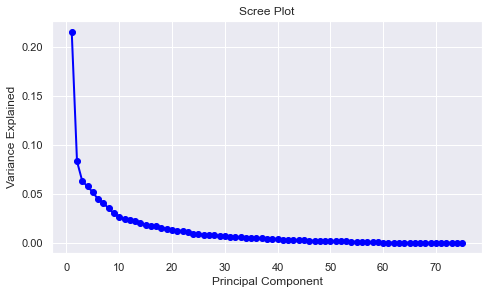

In [144]:
#define PCA model to use
pca = PCA()

#fit PCA model to data
pca_fit = pca.fit(X_train)

pca.n_components_

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

# Feature Importance

In [145]:
df

index                  columns_name  score_feature_importance
0       0                          x7_0              4.383543e-01
1       1                         x10_3              1.469811e-01
2       2                          x7_3              8.868372e-02
3       3                         x10_0              6.866194e-02
4       4                       taxrate              4.166951e-02
5       5                         acres              2.747586e-02
6       6         x5_Continuous Footing              2.464942e-02
7       7                    squarefeet              2.421013e-02
8       8           land_square_footage              1.105095e-02
9       9           totalfavoritescount              8.720093e-03
10     10    garage_parking_square_feet              8.106300e-03
11     11                          x9_4              7.193782e-03
12     12                      x5_other              7.086104e-03
13     13             privatestudentcnt              6.992907e-03
14     14                      x6_other              6.932430e-03
15     15              publicschoolrate              6.671266e-03
16     16                         x10_2              6.545969e-03
17     17                  daysonmarket              5.922140e-03
18     18                   privaterate              5.642923e-03
19     19                totalamenities              5.520898e-03
20     20              publicstudentcnt              5.487916e-03
21     21                         x10_1              5.233747e-03
22     22                          x9_1              4.978199e-03
23     23     publicstudentteacherratio              4.352648e-03
24     24                          x9_0              2.632515e-03
25     25         x2_Condo&Manufactured              2.256557e-03
26     26                   x6_Finished              2.233992e-03
27     27                totaltourcount              1.894489e-03
28     28          basement_square_feet              1.758376e-03
29     29               x2_Multi-Family              1.505547e-03
30     30                         x13_2              1.297020e-03
31     31                          x3_3              1.059914e-03
32     32  x2_Single Family Residential              1.002066e-03
33     33                          x3_0              9.678994e-04
34     34                    x5_unknown              7.948667e-04
35     35                          x3_1              7.921126e-04
36     36                     x4_Prefab              7.500983e-04
37     37                          x1_2              7.364225e-04
38     38                          x7_1              7.165929e-04
39     39                          x7_2              7.135078e-04
40     40                   x5_Concrete              7.060346e-04
41     41              x4_Brick&Opening              6.937002e-04
42     42                       x11_0.0              6.929955e-04
43     43                          x9_3              6.634118e-04
44     44                    x4_Gas/Log              6.503364e-04
45     45                          x9_2              6.111870e-04
46     46                          x1_3              6.049433e-04
47     47                        x0_2.0              5.973538e-04
48     48                        x13_-1              5.502331e-04
49     49                       x11_1.0              5.377528e-04
50     50                          x1_1              5.330082e-04
51     51                 x6_Unfinished              5.149622e-04
52     52                        x0_3.0              5.109689e-04
53     53                         x13_3              4.792900e-04
54     54                         x13_1              4.552719e-04
55     55                         x13_5              4.352450e-04
56     56                          x3_2              3.920579e-04
57     57                      x4_Other              3.679187e-04
58     58                         x13_0              3.214874e-04
59     59                       x11_2.0     

In [146]:
x=list(df['columns_name'])
yvar=list(df['score_feature_importance'])
cumulative_importances = np.cumsum(yvar)

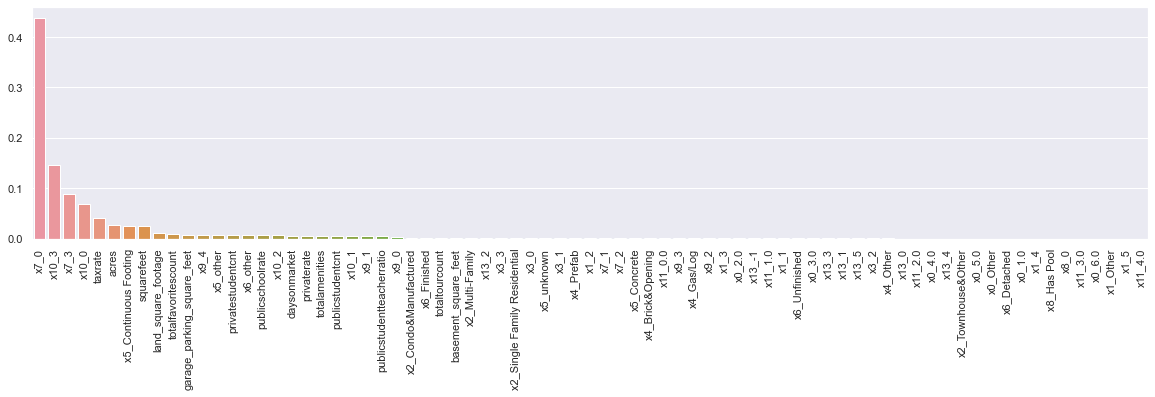

In [147]:
#Charting feature importance
sns.set(rc={'figure.figsize':(20,4.27)})
sns.barplot( x=x, y=yvar)
for item in sns.barplot( x=x, y=yvar, data=df).get_xticklabels():
        item.set_rotation(90)
        
plt.show()

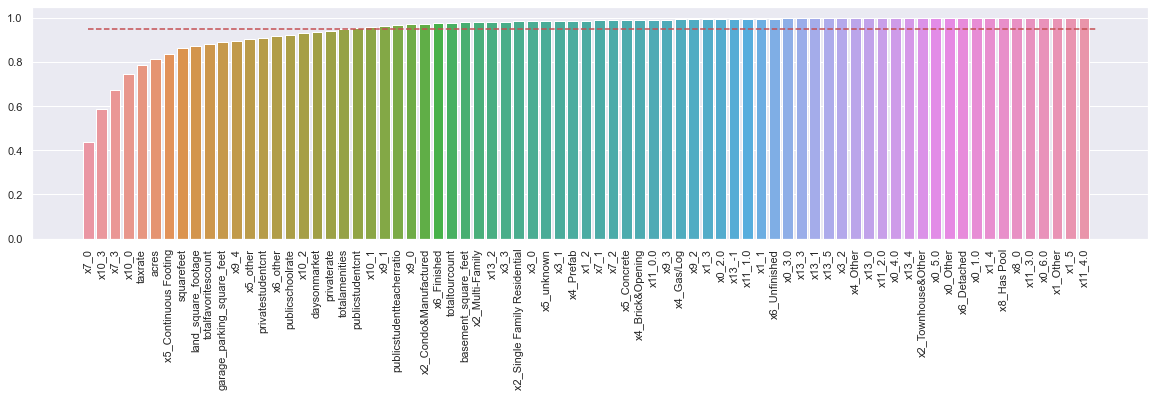

In [148]:
#Charting cumulative feature importance
sns.set(rc={'figure.figsize':(20,4.27)})
sns.barplot( x=x, y=cumulative_importances)
for item in sns.barplot( x=x, y=cumulative_importances, data=df).get_xticklabels():
        item.set_rotation(90)
plt.hlines(y = 0.95, xmin=0, xmax=len(cumulative_importances), color = 'r', linestyles = 'dashed')
plt.show()

In [149]:
excl=pd.DataFrame(df[df['index']>30])
excl=pd.DataFrame(excl.value_counts())
drop_col=list(excl.reset_index()['columns_name'])
drop_col

['x3_3',
 'x2_Single Family Residential',
 'x13_5',
 'x3_2',
 'x4_Other',
 'x13_0',
 'x11_2.0',
 'x0_4.0',
 'x13_4',
 'x2_Townhouse&Other',
 'x0_5.0',
 'x0_Other',
 'x6_Detached',
 'x0_1.0',
 'x1_4',
 'x8_Has Pool',
 'x8_0',
 'x11_3.0',
 'x0_6.0',
 'x1_Other',
 'x1_5',
 'x13_1',
 'x13_3',
 'x0_3.0',
 'x4_Brick&Opening',
 'x3_0',
 'x5_unknown',
 'x3_1',
 'x4_Prefab',
 'x1_2',
 'x7_1',
 'x7_2',
 'x5_Concrete',
 'x11_0.0',
 'x6_Unfinished',
 'x9_3',
 'x4_Gas/Log',
 'x9_2',
 'x1_3',
 'x0_2.0',
 'x13_-1',
 'x11_1.0',
 'x1_1',
 'x11_4.0']

In [150]:
# Dropping all features explaining less than 95% of y
untimate_use.drop(drop_col,axis=1,inplace=True)
xtrain.drop(drop_col,axis=1,inplace=True)
xtest.drop(drop_col,axis=1,inplace=True)

In [151]:
#must redeclare the regression model for xtrain
regr.fit(xtrain, ytrain)

RandomForestRegressor(max_depth=55, min_samples_split=10, n_estimators=1222,
                      random_state=0)

In [152]:
#making all into df 
xtrain=pd.DataFrame(xtrain)
xtest=pd.DataFrame(xtest)
ytrain=pd.DataFrame(ytrain)
ytest=pd.DataFrame(ytest)
y=pd.DataFrame(y)
ytrain.columns=y.columns
ytest.columns=y.columns

# Linear Regression

### Accuracy

In [153]:
lm=linear_model.LinearRegression()
model=lm.fit(xtrain, ytrain)
predictions=lm.predict(xtest)

In [154]:
r2=r2_score(ytest,predictions)
print('test: ', r2)
u_predictions=lm.predict(untimate_use)
r2=r2_score(untimate_y,u_predictions)
print('for sale: ', r2)

test:  0.7700562063392692
for sale:  0.7542444937537605


In [155]:
mse=mean_squared_error(ytest,predictions)
print('mse: ',mse)
rmse=math.sqrt(mse)
print('rmse: ',rmse)

mse:  6409778249.11242
rmse:  80061.09073146843


In [156]:
mae=mean_absolute_error(ytest,predictions)
print('test: ', mae)
mae=mean_absolute_error(untimate_y,u_predictions)
print('for sale: ', mae)

test:  59176.77210526315
for sale:  69304.72151898734


In [157]:
mean=np.mean(y)
print('mean: ', mean)
std=stats.stdev(y['price'])
print('std: ', std)

mean:  price    546077.982898
dtype: float64
std:  171294.864066519


In [158]:
num = sm.add_constant(xtrain)
mod = sm.OLS(ytrain,num).fit() # to train the model

print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     251.0
Date:                Sat, 19 Feb 2022   Prob (F-statistic):               0.00
Time:                        02:29:07   Log-Likelihood:                -29055.
No. Observations:                2280   AIC:                         5.817e+04
Df Residuals:                    2249   BIC:                         5.835e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [159]:
xtrain.to_excel("/Users/kb/Ironhack/Labs/Home-Buying/train.xlsx", index = False)

# Neural Network

In [160]:
a=200
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(a, activation = tf.nn.relu, input_dim = xtrain.shape[1]))
model.add(tf.keras.layers.Dense(a, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(a, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(a, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(a, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(a, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(a, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(a, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(a, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(a, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(a, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(a, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(a, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(a, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(a, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(a, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(a, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(a, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(a, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(a, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(a, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(a, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(a, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(1,))
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mae'])
model.fit(xtrain, ytrain, batch_size=len(xtrain), epochs=250)

Epoch 1/250
1/1 [==============================] - 1s 825ms/step - loss: 328217722880.0000 - mae: 546260.0000
Epoch 2/250
1/1 [==============================] - 0s 44ms/step - loss: 328217722880.0000 - mae: 546259.9375
Epoch 3/250
1/1 [==============================] - 0s 47ms/step - loss: 328217624576.0000 - mae: 546259.8750
Epoch 4/250
1/1 [==============================] - 0s 45ms/step - loss: 328217460736.0000 - mae: 546259.8125
Epoch 5/250
1/1 [==============================] - 0s 45ms/step - loss: 328216805376.0000 - mae: 546259.5625
Epoch 6/250
1/1 [==============================] - 0s 45ms/step - loss: 328214773760.0000 - mae: 546257.0625
Epoch 7/250
1/1 [==============================] - 0s 45ms/step - loss: 328208613376.0000 - mae: 546251.6875
Epoch 8/250
1/1 [==============================] - 0s 48ms/step - loss: 328190361600.0000 - mae: 546234.8750
Epoch 9/250
1/1 [==============================] - 0s 47ms/step - loss: 328138555392.0000 - mae: 546187.1250
Epoch 10/250
1/1 [

1/1 [==============================] - 0s 44ms/step - loss: 11685906432.0000 - mae: 85039.1406
Epoch 77/250
1/1 [==============================] - 0s 45ms/step - loss: 12780843008.0000 - mae: 89872.1797
Epoch 78/250
1/1 [==============================] - 0s 46ms/step - loss: 12866130944.0000 - mae: 90370.4922
Epoch 79/250
1/1 [==============================] - 0s 46ms/step - loss: 11790215168.0000 - mae: 86078.7500
Epoch 80/250
1/1 [==============================] - 0s 46ms/step - loss: 10755026944.0000 - mae: 81158.7266
Epoch 81/250
1/1 [==============================] - 0s 44ms/step - loss: 10874203136.0000 - mae: 80193.2812
Epoch 82/250
1/1 [==============================] - 0s 46ms/step - loss: 11634611200.0000 - mae: 82254.1797
Epoch 83/250
1/1 [==============================] - 0s 45ms/step - loss: 11571744768.0000 - mae: 81999.2266
Epoch 84/250
1/1 [==============================] - 0s 44ms/step - loss: 10690500608.0000 - mae: 79354.3906
Epoch 85/250
1/1 [=======================

1/1 [==============================] - 0s 46ms/step - loss: 6488013312.0000 - mae: 60994.5898
Epoch 153/250
1/1 [==============================] - 0s 45ms/step - loss: 6452681216.0000 - mae: 60795.3398
Epoch 154/250
1/1 [==============================] - 0s 42ms/step - loss: 6417440768.0000 - mae: 60604.4648
Epoch 155/250
1/1 [==============================] - 0s 43ms/step - loss: 6381242368.0000 - mae: 60416.2812
Epoch 156/250
1/1 [==============================] - 0s 44ms/step - loss: 6346183168.0000 - mae: 60239.0156
Epoch 157/250
1/1 [==============================] - 0s 46ms/step - loss: 6311842304.0000 - mae: 60062.9766
Epoch 158/250
1/1 [==============================] - 0s 45ms/step - loss: 6276926464.0000 - mae: 59877.0117
Epoch 159/250
1/1 [==============================] - 0s 46ms/step - loss: 6242796544.0000 - mae: 59691.2266
Epoch 160/250
1/1 [==============================] - 0s 45ms/step - loss: 6209581568.0000 - mae: 59512.5742
Epoch 161/250
1/1 [=======================

Epoch 228/250
1/1 [==============================] - 0s 44ms/step - loss: 4479654912.0000 - mae: 50035.9922
Epoch 229/250
1/1 [==============================] - 0s 48ms/step - loss: 4461876224.0000 - mae: 49939.9102
Epoch 230/250
1/1 [==============================] - 0s 43ms/step - loss: 4444188160.0000 - mae: 49835.4492
Epoch 231/250
1/1 [==============================] - 0s 46ms/step - loss: 4426584064.0000 - mae: 49730.0625
Epoch 232/250
1/1 [==============================] - 0s 44ms/step - loss: 4409036800.0000 - mae: 49630.2930
Epoch 233/250
1/1 [==============================] - 0s 45ms/step - loss: 4391745536.0000 - mae: 49529.8359
Epoch 234/250
1/1 [==============================] - 0s 48ms/step - loss: 4374510592.0000 - mae: 49430.5547
Epoch 235/250
1/1 [==============================] - 0s 49ms/step - loss: 4357327360.0000 - mae: 49336.7070
Epoch 236/250
1/1 [==============================] - 0s 46ms/step - loss: 4340000768.0000 - mae: 49233.1562
Epoch 237/250
1/1 [=========

In [161]:
val_loss, val_acc = model.evaluate(xtest, ytest)
print('test: ', val_acc)
val_loss, val_acc = model.evaluate(untimate_use, untimate_y)
print('for sale: ', val_acc)

24/24 [==============================] - 0s 2ms/step - loss: 4788103680.0000 - mae: 52005.5469
test:  52005.546875
15/15 [==============================] - 0s 2ms/step - loss: 6091557888.0000 - mae: 57321.9336
for sale:  57321.93359375


# Putting it all back together

### Test data

In [163]:
ytest=ytest.reset_index()

In [164]:
#linear regression predictions
predictions=lm.predict(xtest)
tpred=pd.DataFrame(predictions)
tpred.shape

(760, 1)

In [165]:
#Neural network predictions
preds = model.predict(xtest)
nueral_test_pred=pd.DataFrame(preds)
nueral_test_pred.shape

(760, 1)

In [166]:
#Random Forest predictions
rf_pred=regr.predict(xtest)
rf_pred=pd.DataFrame(rf_pred)
rf_pred.shape

(760, 1)

In [167]:
#Test predictions
test=pd.concat([ytest,tpred,nueral_test_pred,rf_pred],axis=1).reset_index().set_index('index')
test.columns=['level_1','price2','reg_pred','neural_pred','rf_pred']
test.head()

level_1    price2  reg_pred   neural_pred        rf_pred
index                                                          
3231         0  336000.0  409984.0  363377.84375  346857.168548
1831         1  474500.0  484992.0  479242.21875  487638.292627
860          2  535000.0  500608.0  523000.84375  533116.637923
2538         3  615000.0  655744.0  601540.25000  605823.335049
698          4  350000.0  387840.0  345431.59375  365086.128608

### Train data

In [168]:
#linear regression predictions
ytrain=ytrain.reset_index()
predictions=lm.predict(xtrain)
trpred=pd.DataFrame(predictions)
trpred.head()

level_0  index       price
0           0   2299   759000.00
1           1   3430   379000.00
2           2   4495   650054.00
3           3   1772   418000.00
4           4   4172   389000.00
5           5   4161   382900.00
6           6   2805   163500.00
7           7   3533   345000.00
8           8   3997   735000.00
9           9   4483   577966.00
10         10   4033   568000.00
11         11   1609   620000.00
12         12   1019   470000.00
13         13   3287   688000.00
14         14   1744   419500.00
15         15   2698   613000.00
16         16   3260   620000.00
17         17   3215   685000.00
18         18   2163   560000.00
19         19   2105   245000.00
20         20   1308   685000.00
21         21   2783   411900.00
22         22   2456   267000.00
23         23   2067   475000.00
24         24   1443   264900.00
25         25   1616   565000.00
26         26   4144   680000.00
27         27   2278   602000.00
28         28   3253   619000.00
29         29   2487   550000.00
30         30    807   721500.00
31         31   3427   690000.00
32         32   4260   675000.00
33         33   3617   812000.00
34         34   1064   664000.00
35         35   2811   640000.00
36         36   3848   540000.00
37         37   1565   459000.00
38         38   1260   617500.00
39         39   3973   530000.00
40         40   3029   875000.00
41         41   2847   960000.00
42         42    882   381000.00
43         43   2939   420000.00
44         44    919   335790.00
45         45   2206   700000.00
46         46   1900   299900.00
47         47   1766   489000.00
48         48   2665   525000.00
49         49   2101   247500.00
50         50   3136   477000.00
51         51   1834   715000.00
52         52   2141   582000.00
53         53   3212   632900.00
54         54   4281   742000.00
55         55   3294   400000.00
56         56   2998   341000.00
57         57   3286   735000.00
58         58   3548   475000.00
59         59   2823   375000.00
60         60   2938   585000.00
61         61   4321   625000.00
62         62    883   435000.00
63         63   2804   169900.00
64         64   2386   475000.00
65         65   1182   765000.00
66         66   2285   637500.00
67         67   1183   590000.00
68         68   1867   395500.00
69         69   4080   500000.00
70         70   3398   450000.00
71         71   2469   610500.00
72         72   3106   515000.00
73         73   1634   496000.00
74         74   2727   580000.00
75         75   2830   699000.00
76         76   1202   445000.00
77         77   1930   525000.00
78         78   2728   687000.00
79         79   1990   526000.00
80         80   1915   385000.00
81         81   3370   587000.00
82         82   3620   564900.00
83         83   1027   575500.00
84         84   1402   539000.00
85         85   2453   275000.00
86         86   3176   375000.00
87         87   1253   565000.00
88         88   2539   345000.00
89         89   4371   950000.00
90         90   2663   510000.00
91         91   2959   505000.00
92         92   2129   500000.00
93         93   1599   640000.00
94         94   1487   490000.00
95         95   1302   639000.00
96         96   2274   460000.00
97         97   1794   640000.00
98         98   1530   471130.00
99         99   1967   810000.00
100       100   1830   675000.00
101       101   1404   665000.00
102       102   1113   355000.00
103       103    691   405000.00
104       104   2865   597900.00
105       105   1390   830795.00
106       106   4209   480000.00
107       107    732   453500.00
108       108   3138   430000.00
109       109   3064   848000.00
110       110   3616   723400.00
111       111   2588   395000.00
112       112   2849   835000.00
113       113   4634   405855.64
114       114   4175   400000.00
115       115    711   589000.00
116       116   2861   471000.00
117       117   4261   675000.00
118       118   1963   650000.00
119       119    894   929000.00
120       120

In [169]:
#Neural network predictions
preds = model.predict(xtrain)
nueral_train_pred=pd.DataFrame(preds)
nueral_train_pred.shape

0
0  772301.31250
1  330373.25000
2  593331.75000
3  419063.84375
4  374955.78125

In [170]:
#Random Forest predictions
rf_pred=regr.predict(xtrain)
rf_pred=pd.DataFrame(rf_pred)
rf_pred.shape

0
0  742958.389776
1  336317.931355
2  631227.919913
3  441102.815410
4  381505.520139

In [171]:
#Train predictions
train=pd.concat([ytrain,trpred,nueral_train_pred,rf_pred],axis=1).reset_index().set_index('index')
train.columns=['level_0','price2','reg_pred','neural_pred','rf_pred']
train.head()

level_0    price2  reg_pred   neural_pred        rf_pred
index                                                          
2299         0  759000.0  713472.0  772301.31250  742958.389776
3430         1  379000.0  286080.0  330373.25000  336317.931355
4495         2  650054.0  641024.0  593331.75000  631227.919913
1772         3  418000.0  445824.0  419063.84375  441102.815410
4172         4  389000.0  380160.0  374955.78125  381505.520139

### For Sale Data

In [172]:
#linear regression predictions
yuse=untimate_y.reset_index()
predictions=lm.predict(untimate_use)
usepred=pd.DataFrame(predictions)
usepred.shape

(474, 1)

In [173]:
#Neural network predictions
preds = model.predict(untimate_use)
nueral_train_pred=pd.DataFrame(preds)
nueral_train_pred.shape

(474, 1)

In [174]:
#Random Forest predictions
rf_pred=regr.predict(untimate_use)
rf_pred=pd.DataFrame(rf_pred)
rf_pred.shape

(474, 1)

In [175]:
#For Sale predictions
use=pd.concat([yuse,usepred,nueral_train_pred,rf_pred],axis=1).reset_index().set_index('index')
use.columns=['level_0','price2','reg_pred','neural_pred','rf_pred']
use.head()

level_0    price2  reg_pred   neural_pred        rf_pred
index                                                          
0            0  385000.0  488192.0  444410.15625  414603.290427
1            1  735000.0  728064.0  852753.87500  877270.182106
3            2  550000.0  535936.0  551135.18750  529783.585788
8            3  325000.0  397312.0  341999.65625  361771.554568
11           4  689900.0  841728.0  746312.56250  730153.184028

### All Predictions Data

In [176]:
result=pd.concat([train,test,use],axis=0)
result.head()

level_0    price2  reg_pred   neural_pred        rf_pred  level_1
index                                                                   
2299       0.0  759000.0  713472.0  772301.31250  742958.389776      NaN
3430       1.0  379000.0  286080.0  330373.25000  336317.931355      NaN
4495       2.0  650054.0  641024.0  593331.75000  631227.919913      NaN
1772       3.0  418000.0  445824.0  419063.84375  441102.815410      NaN
4172       4.0  389000.0  380160.0  374955.78125  381505.520139      NaN

In [177]:
result.shape

(3514, 6)

In [178]:
data.shape

(3514, 46)

### Adding location clusters

In [179]:
data['location']=location2['location']
data.shape

(3514, 47)

### Combining Final Data

In [180]:
final=pd.concat([result,data],axis=1)
final.drop(['level_0'],axis=1,inplace=True)
final.head()

price2  reg_pred   neural_pred        rf_pred  level_1 property_id2  \
0   385000.0  488192.0  444410.15625  414603.290427      NaN   26719777.0   
1   735000.0  728064.0  852753.87500  877270.182106      NaN   25986380.0   
3   550000.0  535936.0  551135.18750  529783.585788      NaN   25908665.0   
8   325000.0  397312.0  341999.65625  361771.554568      NaN   49792125.0   
11  689900.0  841728.0  746312.56250  730153.184028      NaN  177308461.0   

    listing_id2                                     address4 beds2 baths2  \
0   143915652.0                13040 SW Caddy Pl, Tigard, OR   2.0      2   
1   140570126.0              4103 SE Olsen St, Milwaukie, OR   4.0      2   
3   144176917.0              3228 Journeay Ct, West Linn, OR   3.0      2   
8   144193248.0            8069 NE Rockne Way, Hillsboro, OR   2.0      2   
11  128982086.0  19522 Reddaway Ave Unit L3, Oregon City, OR   4.0      2   

     latitude   longitude propertytype searchstatus  predictedvalue  \
0   45.425580 -122.811359         13.0        128.0       419640.19   
1   45.454978 -122.621015          6.0          1&2       728341.79   
3   45.362800 -122.642409          6.0        128.0       600851.22   
8   45.526865 -122.896824          3.0        128.0       359163.58   
11  45.324264 -122.607964          6.0        128.0       707022.51   

    squarefeet  viewcount  totalfavoritescount  totaltourcount  \
0       1934.0     1846.0                 84.0             2.0   
1       2289.0     5328.0                114.0             1.0   
3       1740.0     2519.0                174.0             3.0   
8       1280.0     1754.0                 92.0             4.0   
11      3003.0      118.0                 23.0             0.0   

    totalamenities           propertytypename    yearbuilt  yearrenovated  \
0             31.0            Townhouse&Other  2000.000000    2000.000000   
1             24.0  Single Family Residential  1935.000000    1935.000000   
3             17.0  Single Family Residential  2002.000000    2002.000000   
8             25.0         Condo&Manufactured  2013.000000    2013.000000   
11             0.0  Single Family Residential  2010.203432    2010.203432   

       taxesdue eventdescription  daysonmarket     price  \
0   3724.900000   Listed&Pending          10.0  385000.0   
1   2886.470000   Listed&Pending           0.0  735000.0   
3   5063.140000   Listed&Pending          10.0  550000.0   
8   2917.320000   Listed&Pending          10.0  325000.0   
11  7519.273253   Listed&Pending           0.0  689900.0   

    publicstudentteacherratio  publicschoolrate  publicstudentcnt  \
0                   17.333333          9.083333       1080.666667   
1                   22.000000          8.283333        682.333333   
3                   21.333333          4.000000        984.000000   
8                   20.000000         14.666667        933.333333   
11                  22.333333          9.183333       1156.000000   

    privaterate  privatestudentcnt  basement_square_feet heating_type_code  \
0      9.970000         520.388889                 140.0                 1   
1      8.911667         292.233333                   0.0                 3   
3     10.258333         199.944444                   0.0                 0   
8      9.760000         678.500000                   0.0                 1   
11    12.841667         196.833333                   0.0                 3   

    number_of_fireplaces fireplace_type_code     foundation_code  \
0                    1.0             Gas/Log  Continuous Footing   
1                    1.0       Brick&Opening            Concrete   
3                    0.0               Other             unknown   
8                    0.0               Other  Continuous Footing   
11                   0.0               Other             unknown   

   assessed_year parking_type  garage_parking_square_feet  \
0         2020.0     Finished                       559.0   
1         2021.0 

In [181]:
final[((final['sale_ind']=='for sale') & (final['price'].astype(float) <= final['reg_pred'].astype(float)) & (final['price'].astype(float) <= final['neural_pred'].astype(float)))]

price2  reg_pred   neural_pred        rf_pred  level_1 property_id2  \
0     385000.0  488192.0  444410.15625  414603.290427      NaN   26719777.0   
8     325000.0  397312.0  341999.65625  361771.554568      NaN   49792125.0   
11    689900.0  841728.0  746312.56250  730153.184028      NaN  177308461.0   
14    435000.0  497152.0  496998.40625  478122.224205      NaN   26636427.0   
17    659000.0  737024.0  827479.12500  762153.986690      NaN   54836025.0   
18    375000.0  460544.0  425962.75000  398637.769900      NaN   26727632.0   
20    594990.0  735616.0  696533.93750  620544.413595      NaN  175216382.0   
22    495000.0  495488.0  511601.53125  502544.382045      NaN   25867013.0   
29    672200.0  710912.0  740279.68750  726050.737169      NaN   26634459.0   
30    857028.0  873344.0  869911.18750  882541.155304      NaN  177896427.0   
31    399000.0  464640.0  436044.34375  396859.713439      NaN   26737434.0   
36    675000.0  794624.0  822389.43750  807784.049603      NaN  177776142.0   
38    499900.0  519296.0  537192.18750  509558.135803      NaN   26033547.0   
39    300000.0  418432.0  353923.46875  345880.372091      NaN   26676229.0   
48    225000.0  315008.0  283257.46875  285230.352855      NaN  177647337.0   
50    699900.0  952960.0  779316.18750  833242.567414      NaN  148573519.0   
61    398000.0  468352.0  413476.40625  407854.532145      NaN   26655675.0   
66    399900.0  461440.0  440590.81250  415077.650286      NaN   25733137.0   
69    838318.0  877696.0  877665.56250  883316.114538      NaN  176568132.0   
70    749950.0  854784.0  770082.00000  748658.389830      NaN  177931510.0   
72    449000.0  520320.0  488615.46875  525460.083789      NaN   26617232.0   
73    595000.0  604288.0  636576.25000  616225.998526      NaN   26709087.0   
77    160000.0  285696.0  264875.59375  298084.024688      NaN   25996779.0   
78    600000.0  618880.0  618413.75000  617053.130603      NaN   26712610.0   
80    619999.0  633216.0  634999.56250  621981.984403      NaN   26023389.0   
81    675000.0  763904.0  722661.37500  813887.924949      NaN   26018479.0   
84    440000.0  494592.0  505902.53125  500486.183278      NaN   26019876.0   
97    719900.0  846720.0  747214.87500  734261.309210      NaN  177308258.0   
98    500000.0  500736.0  520916.68750  518480.418580      NaN   25956413.0   
101   295000.0  432640.0  416620.90625  451811.745524      NaN   26664124.0   
106   659900.0  695168.0  785875.81250  729533.564385      NaN  161341729.0   
113   539900.0  587008.0  557511.25000  518058.470881      NaN   25859403.0   
116   599990.0  701568.0  613488.75000  620106.288700      NaN  170143989.0   
119   450000.0  515200.0  515421.96875  527493.846705      NaN   26061095.0   
121   664900.0  842880.0  787233.18750  833171.111235      NaN  175215721.0   
129   349900.0  385280.0  361518.59375  331961.508593      NaN   25792516.0   
130   339900.0  412800.0  378869.28125  351053.350131      NaN   39988804.0   
135   704900.0  705792.0  850789.43750  854817.596186      NaN   26002069.0   
137   349950.0  448768.0  390513.71875  353642.444230      NaN   25951123.0   
140   699500.0  738304.0  724595.37500  747634.659717      NaN   26293651.0   
149   535000.0  558976.0  561754.50000  534886.610900      NaN   25905082.0   
151   629000.0  687744.0  650454.56250  607267.811564      NaN   26023337.0   
154   729906.0  944384.0  774083.25000  786108.621361      NaN  173930439.0   
155   705000.0  845696.0  748660.56250  729348.153396      NaN  177308729.0   
159   507990.0  546560.0  555999.68750  537410.173106      NaN  176808400.0   
162   325000.0  358784.0  345043.90625  350934.159838      NaN   26723990.0   
166   179000.0  281088.0  278375.81250  288849.535264      NaN   26735078.0   
167   589900.0  683648.0  656595.75000  620326.855024      NaN  175216246.0   
170   625000.0  704128.0  657966.31250  616570.812327      NaN   26064913.0   
176   684900.0  766464.0  816445.87500  807827.338306     

In [182]:
final.to_excel("/Users/kb/Ironhack/Labs/Home-Buying/withpredictions.xlsx", index = False)

In [183]:
final.shape

(3514, 52)